In [1]:
import numpy as np
import xarray as xr
import os.path as op
import xrft
import dask.array as dsar
from dask.diagnostics import ProgressBar
from scipy.io import loadmat
from scipy.interpolate import PchipInterpolator as pchip
from xmitgcm import open_mdsdataset
from xgcm.grid import Grid
from matplotlib.colors import LogNorm, SymLogNorm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bdir = '/swot/SUM02/takaya/channelMOC-Darwin/'
pdir = '/swot/SUM05/takaya/MITgcm/channel/runs/'

In [3]:
# 05km_mp10-15_mu13-105_Kp01-018_Ki59-105_Kn015-035_g28-168_mz40_rFe1
ys, dy = (30,11)
dt = 6e2
df = 144
# ts = int(360*86400*ys/dt + 360*86400*15e0/3e2)
ts = int(360*86400*ys/dt + 360*86400*15e0/3e2 + 360*86400*46e0/dt)
te = int(ts+360*86400*dy/dt)
print(ts,te)

5495040 6065280


In [3]:
# 05km_mp113-15_mu15-114_Kp01-018_Ki59-105_Kn015-035_g28-168_mz40_rFe1
ys, dy = (30,10)
dt = 3e2
df = 288
# ts = int(360*86400*ys/dt + 360*86400*15e0/3e2)
ts = int(360*86400*ys/6e2 + 360*86400*15e0/3e2 + 360*86400*57e0/6e2 + 14.5*360*86400/dt)
te = int(ts+360*86400*dy/dt)
print(ts,te)

7568640 8605440


In [24]:
# 05km_postSpunUp
ys, dy = (30,4)
dt = 3e2
df = 288
# ts = int(360*86400*ys/dt + 360*86400*15e0/3e2)
ts = int(360*86400*ys/6e2 + 360*86400*15e0/3e2 + 360*86400*57e0/6e2 + 360*86400*25.5/dt)
te = int(ts+360*86400*dy/dt)
print(ts,te)

8709120 9123840


In [89]:
129*360*86400/200
129*360*86400/150

26749440.0

In [88]:
2*360*86400/150

414720.0

In [63]:
dsave = open_mdsdataset(op.join(bdir,'05km_t200ave'), 
                     grid_dir=op.join(pdir,'5km_grid'),
                     iters=range(int(127*360*86400/200+12960),
                                int(129*360*86400/200+12960),12960),
                     prefix=[
                            'Ttave'],
                     delta_t=dt
                    )
dsave

/home/takaya/xmitgcm/xmitgcm/mds_store.py:721: UserWarning: Couldn't find available_diagnostics.log in /swot/SUM02/takaya/channelMOC-Darwin/05km_t200ave. Using default version.
  "in %s. Using default version." % data_dir)
/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:  (XC: 200, XG: 200, YC: 400, YG: 400, Z: 76, Zl: 76, Zp1: 77, Zu: 76, time: 24)
Coordinates:
  * XC       (XC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * XG       (XG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 30000.0 ...
  * YG       (YG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 30000.0 ...
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * Zp1      (Zp1) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
  * Zu       (Zu) >f4 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 -16.1 ...
  * Zl       (Zl) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
    rA       (YC, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    dxG      (YG, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    dyG      (YC, XG) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    Depth    (YC, 

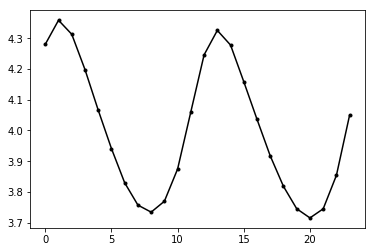

In [68]:
plt.plot(dsave.Ttave[:,0].mean(['YC','XC']),'k.-')

In [6]:
ds = open_mdsdataset(op.join(bdir,'05km_postSpunUp'), 
                     grid_dir=op.join(pdir,'5km_grid'),
                     iters=range(ts+df,te+df,df),
                     prefix=[
                            'BIOtave',
                            'FeTtave','MOMtave'],
                     delta_t=dt
                    ).sel(YC=slice(6e5,14e5),YG=slice(6e5,14e5))

ds

27371520 27578880


<xarray.Dataset>
Dimensions:  (XC: 200, XG: 200, YC: 160, YG: 161, Z: 76, Zl: 76, Zp1: 77, Zu: 76, time: 360)
Coordinates:
  * XC       (XC) >f4 2500.0 7500.0 12500.0 ... 987500.0 992500.0 997500.0
  * YC       (YC) >f4 602500.0 607500.0 612500.0 ... 1392500.0 1397500.0
  * XG       (XG) >f4 0.0 5000.0 10000.0 15000.0 ... 985000.0 990000.0 995000.0
  * YG       (YG) >f4 600000.0 605000.0 610000.0 ... 1395000.0 1400000.0
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 ... -2625.955 -2757.325 -2912.665
  * Zp1      (Zp1) >f4 0.0 -1.0 -2.14 -3.44 ... -2689.32 -2825.33 -3000.0
  * Zu       (Zu) >f4 -1.0 -2.14 -3.44 -4.93 ... -2689.32 -2825.33 -3000.0
  * Zl       (Zl) >f4 0.0 -1.0 -2.14 -3.44 ... -2562.59 -2689.32 -2825.33
    rA       (YC, XC) >f4 dask.array<shape=(160, 200), chunksize=(160, 200)>
    dxG      (YG, XC) >f4 dask.array<shape=(161, 200), chunksize=(161, 200)>
    dyG      (YC, XG) >f4 dask.array<shape=(160, 200), chunksize=(160, 200)>
    Depth    (YC, XC) >f4 dask.array<shape=

In [7]:
ds.PP.attrs

OrderedDict([('standard_name', 'PP'),
             ('long_name', 'Primary Production'),
             ('units', 'mmol P/m^3/s')])

In [8]:
grid = Grid(ds, periodic=['X'])

In [10]:
# ds1 = open_mdsdataset(op.join(bdir,'05km_Darmom'), grid_dir=op.join(pdir,'5km_grid'),
#                      iters=range(int(ts+360*86400*2/dt+df),te+df,df),
#                      prefix=['MOMtave'], delta_t=dt
#                     )
# ds1

In [15]:
# ds2 = open_mdsdataset(op.join(ddir,'zerores_05km_MOMbgc'), grid_dir=op.join(ddir,'5km_grid'),
#                      iters=range(ts,te,df),
#                      prefix=['MOMtave'],
#                      delta_t=dt
#                     )
# ds2

In [9]:
P1 = ds.TRAC22
P2 = ds.TRAC23
# Z1 = ds.TRAC08
# Z2 = ds.TRAC12
PP = ds.PP
Fe1D = ds.TRAC03
w1D = ds.WVEL
theta1D = ds.THETA

In [9]:
P1.attrs

OrderedDict([('standard_name', 'TRAC22'),
             ('long_name', 'Phy1 concentration'),
             ('units', 'mM/m^3')])

In [14]:
P = P1+P2
P

<xarray.DataArray (time: 720, Z: 76, YC: 400, XC: 200)>
dask.array<shape=(720, 76, 400, 200), dtype=float32, chunksize=(1, 76, 400, 200)>
Coordinates:
  * XC       (XC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
    rA       (YC, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    Depth    (YC, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    drF      (Z) >f4 dask.array<shape=(76,), chunksize=(76,)>
    PHrefC   (Z) >f4 dask.array<shape=(76,), chunksize=(76,)>
    hFacC    (Z, YC, XC) >f4 dask.array<shape=(76, 400, 200), chunksize=(76, 400, 200)>
    iter     (time) int64 dask.array<shape=(720,), chunksize=(1,)>
  * time     (time) float64 2.613e+09 2.613e+09 2.613e+09 2.613e+09 ...

In [50]:
P.Z

<xarray.DataArray 'Z' (Z: 76)>
array([-5.000000e-01, -1.570000e+00, -2.790000e+00, -4.185000e+00,
       -5.780000e+00, -7.595000e+00, -9.660000e+00, -1.201000e+01,
       -1.468000e+01, -1.770500e+01, -2.112500e+01, -2.499000e+01,
       -2.934500e+01, -3.424000e+01, -3.972500e+01, -4.585500e+01,
       -5.269000e+01, -6.028000e+01, -6.868500e+01, -7.796500e+01,
       -8.817500e+01, -9.937000e+01, -1.116000e+02, -1.249150e+02,
       -1.393650e+02, -1.549900e+02, -1.718250e+02, -1.899000e+02,
       -2.092350e+02, -2.298550e+02, -2.517700e+02, -2.749850e+02,
       -2.995050e+02, -3.253200e+02, -3.524200e+02, -3.807900e+02,
       -4.104100e+02, -4.412550e+02, -4.733050e+02, -5.065400e+02,
       -5.409350e+02, -5.764650e+02, -6.131100e+02, -6.508550e+02,
       -6.896850e+02, -7.295950e+02, -7.705850e+02, -8.126600e+02,
       -8.558350e+02, -9.001350e+02, -9.455950e+02, -9.922600e+02,
       -1.040180e+03, -1.089425e+03, -1.140080e+03, -1.192235e+03,
       -1.246005e+03, -1.301520

In [77]:
# P1yr = xr.DataArray(P[-360:,:34].data, dims=P.dims,
#                    coords={'time':(P.time[-360:].data-P.time[-360].data)/86400,
#                           'Z':np.flipud(np.abs(P.Z.data)[:34]),
#                           'YC':P.YC.data,'XC':P.XC.data},
#                    attrs=P1.attrs)
P1yr = P[-360:,:34]
P1yr = P1yr.drop('Z')
P1yr.coords['Z'] = ('Z', -P.Z.data[33]+P.Z.data[:34])
P1yr
# Fe1yr = xr.DataArray(Fe[-360:,:34].data, dims=Fe.dims,
#                     coords={'time':(Fe.time[-360:].data-Fe.time[-360].data)/86400,
#                              'Z':np.flipud(np.abs(Fe.Z.data)[:34]),
#                              'YC':Fe.YC.data,'XC':Fe.XC.data},
#                     attrs=Fe.attrs)
# print(P1yr.time, Fe1yr.time)

<xarray.DataArray (time: 360, Z: 34, YC: 400, XC: 200)>
dask.array<shape=(360, 34, 400, 200), dtype=float32, chunksize=(1, 34, 400, 200)>
Coordinates:
  * XC       (XC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
    rA       (YC, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    Depth    (YC, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    drF      (Z) >f4 dask.array<shape=(34,), chunksize=(34,)>
    PHrefC   (Z) >f4 dask.array<shape=(34,), chunksize=(34,)>
    hFacC    (Z, YC, XC) >f4 dask.array<shape=(34, 400, 200), chunksize=(34, 400, 200)>
    iter     (time) int64 dask.array<shape=(360,), chunksize=(1,)>
  * time     (time) float64 2.551e+09 2.551e+09 2.551e+09 2.551e+09 ...
  * Z        (Z) float32 324.82 323.75 322.53 321.135 319.54 317.725 315.66 ...
Attributes:
    standard_name:  TRAC22
    long_name:      Phy1 concentration
    units:          mM/m^3

In [79]:
dsave = P1yr.to_dataset(name='Ptot')
# dsave['FeT'] = Fe1yr
dsave.to_netcdf(op.join(pdir,'P_05km_flipped.nc'))

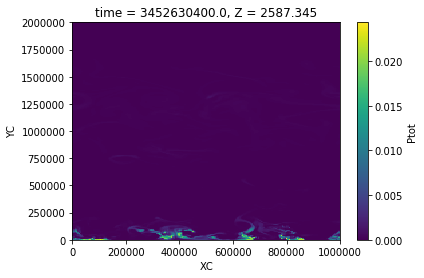

In [227]:
dsave.Ptot[0,-1].plot()

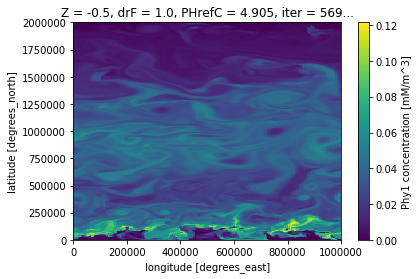

In [62]:
P[-60,0].plot()

In [31]:
P1.coords['days'] = ('time',np.tile(range(360),dy))
P2.coords['days'] = ('time',np.tile(range(360),dy))
# Z1.coords['days'] = ('time',np.tile(range(360),dy))
# Z2.coords['days'] = ('time',np.tile(range(360),dy))
PP.coords['days'] = ('time',np.tile(range(360),dy))
with ProgressBar():
    P1day = P1.load().groupby('days').median(['time','YC','XC'])
    P2day = P2.load().groupby('days').median(['time','YC','XC'])
#     Z1day = Z1.groupby('days').mean(['time']).compute()
#     Z2day = Z2.groupby('days').mean(['time']).compute()
    PPday = PP.load().groupby('days').median(['time','YC','XC'])

[########################################] | 100% Completed |  5min 31.5s
[########################################] | 100% Completed | 11min 56.0s
[########################################] | 100% Completed |  8min 42.0s


In [40]:
nz = 22
with ProgressBar():
    P1Cday = (grid.cumsum(P1day*ds.drF,'Z',boundary='fill')[:,nz]
              * np.abs(ds.Zl[nz])**-1*106.*12.).compute()
    P2Cday = (grid.cumsum(P2day*ds.drF,'Z',boundary='fill')[:,nz]
              * np.abs(ds.Zl[nz])**-1*106.*12.).compute()
#     Z1Cday = (grid.cumsum(Z1day*ds.drF,'Z',boundary='fill')[:,nz]
#               * np.abs(ds.Zl[nz])**-1*106.*12.).compute()
#     Z2Cday = (grid.cumsum(Z2day*ds.drF,'Z',boundary='fill')[:,nz]
#               * np.abs(ds.Zl[nz])**-1*106.*12.).compute()
#     P1Cintg = (P1day*ds.drF).sum('Z').compute()
#     P2Cintg = (P2day*ds.drF).sum('Z').compute()
#     Z1Cintg = (Z1day*ds.drF).sum('Z').compute()
#     Z2Cintg = (Z2day*ds.drF).sum('Z').compute()
PtotCday = P1Cday+P2Cday
PPCday = PPday*106.*12.

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s


In [ ]:
dsave = (P1day+P2day).to_dataset(name='Ptot_d')
dsave['dz'] = ds.drF
dsave['Z'] = ds.Zl
dsave.to_netcdf(op.join(bdir,'Ptot_600-1400km_05kmDailyClim.nc'))
dsave

27371520 27578880


/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


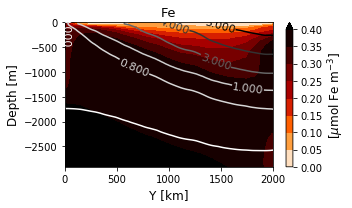

In [23]:
ys, dy = (132,1)
dt = 150
# df = 288
ts = int(360*86400*(ys+.0)/dt)
te = int(ts+360*86400*dy/dt)
print(ts,te)
dsmon = open_mdsdataset(op.join(bdir,'05km_t150'), 
                       grid_dir=op.join(pdir,'5km_grid'),
                       iters=range(ts+17280,te+17280,17280),
                       prefix=['PTRtave03','wVeltave','Ttave'], 
                       delta_t=dt
                       )
grid = Grid(dsmon, periodic=['X'])

tlevs = np.array([0,.8,1,3,4,5])
fig, ax = plt.subplots(figsize=(5,3))
fig.set_tight_layout(True)
im = ax.contourf(dsmon.YC*1e-3, dsmon.Z, dsmon.PTRtave03.mean(['time','XC'])*1e3,
               levels=np.linspace(0,.4,9), extend='max', cmap = 'gist_heat_r')
cs = ax.contour(dsmon.YC*1e-3, dsmon.Z, dsmon.Ttave.mean(['time','XC']), 
              levels=tlevs, cmap='binary')
for c in im.collections:
    c.set_rasterized(True)
for c in cs.collections:
    c.set_rasterized(True)
ax.set_title(r"Fe", fontsize=13)
ax.set_ylabel(r"Depth [m]", fontsize=12)
ax.set_xlabel(r"Y [km]", fontsize=12)
ax.set_ylim([dsmon.Z[-1],0])
plt.clabel(cs, inline=1, fontsize=11)
cb = fig.colorbar(im, ax=ax)
cb.set_label(r"[$\mu$mol Fe m$^{-3}$]",fontsize=12)
plt.savefig(op.join(bdir,'Figures/Fe-transect_05km.pdf'))

In [ ]:
# with ProgressBar():
#     Ptot = (P1Cday+P2Cday).sel(YC=slice(6e5,14e5)).compute()
# Ptot

In [31]:
# colors = Ptot.days.data[:,np.newaxis,np.newaxis]*np.ones((160,200))+1.

# fig, ax = plt.subplots(figsize=(6,5))
# fig.set_tight_layout(True)
# for i in range(360):
#     if i == 0:
#         im = ax.scatter((Ptot)[i]*2e-2, (P1Cday.sel(YC=slice(6e5,14e5))/Ptot)[i],
#                        c=colors[i], alpha=360./(360.+3*i),
#                        s=1., vmin=1., vmax=360., rasterized=True
#                        )
#     else:
#         ax.scatter((Ptot)[i]*2e-2, (P1Cday.sel(YC=slice(6e5,14e5))/Ptot)[i],
#                   c=colors[i], alpha=360./(360.+3*i),
#                   s=1., vmin=1., vmax=360., rasterized=True
#                   )
# ax.set_xscale('log')
# ax.set_xlim([2e-3,2e0])
# ax.set_ylim([0.,1.])
# cbar = fig.colorbar(im, ax=ax)
# cbar.set_label(r"Days", fontsize=12)
# ax.set_xlabel(r"P$_{1+2}$ [mg Chl m$^{-3}$]", fontsize=14)
# ax.set_ylabel(r"Percentage of P$_1$ (P$_1$/P$_{1+2}$)", fontsize=14)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.savefig(op.join(ddir,'Figures/P1vsP_05km.pdf'))

In [22]:
# modisdir = '/swot/SUM05/takaya/MODIS/CbPM/'
# cbpm = xr.open_dataset(op.join(modisdir,'CbPM_40-70S.nc')).carbon
# c_ker = cbpm.sel(lon=slice(100,150))

# years = range(2003,2017)
# months = np.tile(range(12), len(years))
# c_ker.coords['iMONTH'] = ('iTIME', months)

# with ProgressBar():
#     c_ker_mon = c_ker.groupby('iMONTH').mean('iTIME').compute()
    
# c_ker_mon

viirsdir = '/swot/SUM05/takaya/VIIRS/monthly/'
cbpm = xr.open_dataset(op.join(viirsdir,'CbPM-VIIRS-monthly_40-70S.nc')).cbpm
cbpm_ker = cbpm.sel(lon=slice(100,150))
c = xr.open_dataset(op.join(viirsdir,'Carbon-VIIRS-monthly_40-70S.nc')).carbon
c_ker = c.sel(lon=slice(100,150))
print(c_ker.attrs)

# c_ker.coords['iMONTH'] = ('iTIME', months)

with ProgressBar():
    cbpm_ker_mon = cbpm_ker.groupby('months').mean('iTIME').compute()
    c_ker_mon = c_ker.groupby('months').mean('iTIME').compute()
    cbpm_ker_std = cbpm_ker.groupby('months').std(['iTIME','lat','lon']).compute()
    c_ker_std = c_ker.groupby('months').std(['iTIME','lat','lon']).compute()
del c, cbpm, c_ker, cbpm_ker
    
c_ker_mon

OrderedDict([('units', 'mg C m-3')])


<xarray.DataArray 'carbon' (months: 12, lat: 180, lon: 300)>
array([[[15.112427, 14.852038, ..., 12.71562 , 12.428508],
        [15.321337, 15.516882, ..., 12.616169, 12.885255],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       [[16.136292, 15.66229 , ..., 11.292799, 11.285312],
        [15.517662, 15.276718, ..., 11.046855, 10.657256],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       ...,

       [[13.21138 , 12.787419, ..., 17.215484, 17.393421],
        [12.773817, 13.044801, ..., 17.452012, 16.252701],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       [[16.93975 , 16.80695 , ..., 16.324605, 16.893064],
        [16.262466, 16.190208, ..., 16.751794, 16.669233],
        ...,
        [      nan,       nan, ...,       

In [10]:
cafedir = '/swot/SUM05/takaya/CAFE/'
decaf = loadmat(op.join(cafedir,'CAFE'), appendmat=True)
cafe = decaf['CAFE']
lat = decaf['Lat1']
lon = decaf['Lon1']
ppcb = np.zeros((12,180,360))
for i in range(12):
    ppcb[i] = cafe[:,:,i]
    
decaf = xr.DataArray(ppcb, dims=['month','lat','lon'],
                 coords={'month':range(1,13),'lat':lat[:,0],'lon':lon[0,:]}
                 ).to_dataset(name='carbon')
decaf_SO = decaf.sel(lat=slice(-45,-65),lon=slice(50,180))
del decaf, ppcb
decaf_SO

<xarray.Dataset>
Dimensions:  (lat: 20, lon: 130, month: 12)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * lat      (lat) float64 -45.5 -46.5 -47.5 -48.5 -49.5 -50.5 -51.5 -52.5 ...
  * lon      (lon) float64 50.5 51.5 52.5 53.5 54.5 55.5 56.5 57.5 58.5 59.5 ...
Data variables:
    carbon   (month, lat, lon) float64 635.4 618.2 587.5 501.0 514.8 526.0 ...

In [ ]:
# P1_intg = (P1*106.*12.*ds.hFacC*ds.drF).sum(dim='Z')
# P2_intg = (P2*106.*12.*ds.hFacC*ds.drF).sum(dim='Z')
# P1_intg

In [43]:
# sosedir = '/swot/SUM05/takaya/SOSE'
# sose = xr.open_dataset(op.join(sosedir,'3day_ave/bsose_i105_2008to2012_3day_Phyto.nc'))
# P_sose = sose.phyto
# P_sose.attrs = sose.phyto.attrs

# gridSOSE = xr.open_dataset(op.join(sosedir,'3day_ave/grid.nc'))

# P_sose.coords['iTIME'] = ('iTIME',range(609))
# P_sose.coords['iDEPTH'] = ('iDEPTH',gridSOSE.DRF.data)
# P_sose.coords['iLAT'] = ('iLAT',gridSOSE.YC.data[:,0])
# P_sose.coords['iLON'] = ('iLON',gridSOSE.XC.data[0,:])

# P_kersurf = (P_sose*P_sose.iDEPTH)[:,:12].sum('iDEPTH').sel(iLON=slice(100,140)) * 1e-2
# del P_sose
# DinY = np.tile(range(121),5)
# P_kersurf = P_kersurf[:-4]
# P_kersurf.coords['DinY'] = ('iTIME',DinY)
# P_kersurf = P_kersurf.groupby('DinY').mean('iTIME')

# P_kersurf

In [42]:
# sose = xr.open_dataset(op.join(sosedir,'3day_ave/bsose_i105_2008to2012_3day_NPP.nc'))
# PP_sose = sose.NPP
# print(sose.NPP.attrs)
# PP_sose.attrs = sose.NPP.attrs

# PP_sose.coords['iTIME'] = ('iTIME',range(609))
# PP_sose.coords['iDEPTH'] = ('iDEPTH',gridSOSE.DRF.data)
# PP_sose.coords['iLAT'] = ('iLAT',gridSOSE.YC.data[:,0])
# PP_sose.coords['iLON'] = ('iLON',gridSOSE.XC.data[0,:])

# PP_kersurf = (PP_sose*PP_sose.iDEPTH).sel(iLON=slice(100,140)).sum('iDEPTH')
# del PP_sose, gridSOSE
# DinY = np.tile(range(121),5)
# PP_kersurf = PP_kersurf[:-4]
# PP_kersurf.coords['DinY'] = ('iTIME',DinY)
# PP_kersurf = PP_kersurf.groupby('DinY').mean('iTIME')

In [18]:
# dssave = P_kersurf.to_dataset(name='Phyto_100m')
# dssave['Prod_intg'] = PP_kersurf
# dssave.to_netcdf(op.join(sosedir,'3day_ave/Biomass-Productivity_3D_Kerguelen.nc'))

In [11]:
sosedir = '/swot/SUM05/takaya/SOSE'
dsSOSE = xr.open_dataset(op.join(sosedir,'3day_ave/Biomass-Productivity_3D_Kerguelen.nc'))
P_kersurf = dsSOSE.Phyto_100m
PP_kersurf = dsSOSE.Prod_intg

In [ ]:
PPintg = (PPCday*ds.hFacC*ds.drF).sum(dim='Z')
PPintg

In [82]:
PPintg.sel(YC=slice(6e5,14e5)).mean(['XC','YC']).sum('days').values

array(0.5430186, dtype=float32)

In [83]:
0.5430186/0.34280667

1.5840374401116526

In [22]:
# bl = xr.open_dataset(op.join(ddir,'KPPbl_99percen_5km.nc')).KPPbl
# bl.coords['days'] = ('time',np.tile(range(360),10))
# bl_day = bl.groupby('days').mean(['time'])
# bl_day
XLD = xr.open_dataset(op.join(pdir,'KPPhbl_99percentile_05km.nc')).hbl99
# MXLD.coords['DinY'] = ('time',np.tile(range(360),5))
MXLD = XLD.groupby('day').mean(['time'])
MXLD

<xarray.DataArray 'hbl99' (day: 360, YC: 400)>
array([[   0.      , 1604.726008, 1585.633965, ...,   30.      ,   30.      ,
          30.      ],
       [   0.      , 1604.625369, 1585.545819, ...,   30.      ,   30.      ,
          30.      ],
       [   0.      , 1602.901272, 1585.351765, ...,   30.      ,   30.      ,
          30.      ],
       ...,
       [   0.      , 1606.382272, 1588.941428, ...,   30.      ,   30.      ,
          30.      ],
       [   0.      , 1606.185913, 1587.905113, ...,   30.      ,   30.      ,
          30.      ],
       [   0.      , 1606.171797, 1587.74965 , ...,   30.      ,   30.      ,
          30.      ]])
Coordinates:
  * YC       (YC) float32 2500.0 7500.0 12500.0 ... 1992500.0 1997500.0
  * day      (day) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359

In [11]:
PintgC = ((P1+P2)*106*12*ds.hFacC*ds.drF).sum(dim='Z')
r = np.log(PintgC[1:]/PintgC[:-1].data) * PintgC.time.diff('time',1)**-1
tnew = .5*(ds.time.data[1:]+ds.time.data[:-1])
func = pchip(tnew, r, axis=0)

In [12]:
r = xr.DataArray(func(ds.time.data), dims=P1[:,0].dims, coords=P1[:,0].coords)
r*86400

<xarray.DataArray (time: 1080, YC: 160, XC: 200)>
array([[[ 0.078295, -0.11577 , ...,  0.456478,  0.203582],
        [ 0.069334, -0.10694 , ...,  0.502873,  0.218317],
        ...,
        [-0.174307, -0.11891 , ..., -0.168236, -0.181559],
        [-0.243681, -0.140217, ..., -0.242864, -0.267803]],

       [[ 0.07852 ,  0.117709, ..., -0.08375 ,  0.028112],
        [ 0.069334,  0.121496, ..., -0.095573,  0.001084],
        ...,
        [ 0.080471,  0.06714 , ...,  0.140543,  0.110261],
        [ 0.072739,  0.059738, ...,  0.127191,  0.097133]],

       ...,

       [[ 0.075364,  0.086556, ...,  0.038865,  0.063271],
        [ 0.064945,  0.079152, ...,  0.027379,  0.049386],
        ...,
        [-0.284776, -0.323151, ..., -0.204132, -0.242511],
        [-0.291706, -0.330757, ..., -0.218986, -0.25064 ]],

       [[-0.003819,  0.146337, ..., -0.026379, -0.105742],
        [ 0.024748,  0.130004, ..., -0.010114, -0.057637],
        ...,
        [ 0.212393,  0.216288, ...,  0.165617,  0.179

In [13]:
# l = mu - r
r.coords['days'] = ('time',np.tile(range(360),dy))
# mu.coords['days'] = ('time',np.tile(range(360),dy))
# l.coords['days'] = ('time',np.tile(range(360),dy))
# FadvW_d = ds.ADVrTr03
# dfib_d = ds.DFrITr03
# FadvW_d.coords['days'] = ('time',np.tile(range(360),dy))
# dfib_d.coords['days'] = ('time',np.tile(range(360),dy))
with ProgressBar():
    rday = r.groupby('days').mean('time').compute()
#     FadvW_d = (grid.diff(FadvW_d,'Zl',boundary='fill'))[:,22].sel(YC=slice(6e5,14e5)).groupby('days').mean(['time','YC','XC']).compute()
#     dfib_d = dfib_d[:,22].sel(YC=slice(6e5,14e5)).groupby('days').mean(['time','YC','XC']).compute()
#     muday = mu.groupby('days').mean('time')
#     lday = l.groupby('days').mean('time')

In [40]:
# diff = ds.DFrITr03
# diff_z = grid.diff(diff, 'Z', boundary='fill')/(ds.rA*ds.drF)
# advW = ds.ADVrTr03
# # advV = ds.ADVyTr03
# adv_z = grid.diff(advW,'Z',boundary='fill')/(ds.rA*ds.drF)
# # advy = grid.diff(advV, 'Y', boundary='fill')/(ds.rA*ds.drF).mean('XC')

# diff_z.coords['days'] = ('time',np.tile(range(360),dy))
# adv_z.coords['days'] = ('time',np.tile(range(360),dy))


# with ProgressBar():
#     dff_z_100 = diff_z[:,21].sel(YC=slice(6e5,14e5)).groupby('days').mean(['time','YC','XC']).compute()
#     adv_z_100 = adv_z[:,21].sel(YC=slice(6e5,14e5)).groupby('days').mean(['time','YC','XC']).compute()
    
# adv_z_100

In [41]:
# fig, ax = plt.subplots()
# # ax2 = ax.twinx()
# adv_z_100.plot(ax=ax, color='r')
# dff_z_100.plot(ax=ax, color='b')
# ax.set_ylim([-2.e-11,2.e-11])

In [101]:
zz = xr.DataArray(np.abs(ds.Zl).data[np.newaxis,:,np.newaxis]*np.ones((24,400))[:,np.newaxis,:],
                 dims=['day','Zl','YC'])
nMXLD = np.argmin(np.abs(zz-MXLD[::15]), axis=1)
nXLD100_15 = nMXLD.data.copy()
nXLD100_15[nXLD100_15<22] = 22
nXLD100_15 = xr.DataArray(nXLD100_15, dims=nMXLD.dims, coords={'day':range(24),'YC':MXLD.YC.data})
nXLD100_15

<xarray.DataArray (day: 24, YC: 400)>
array([[22, 62, 62, ..., 22, 22, 22],
       [22, 62, 62, ..., 22, 22, 22],
       [22, 62, 62, ..., 22, 22, 22],
       ...,
       [22, 62, 62, ..., 22, 22, 22],
       [22, 62, 62, ..., 22, 22, 22],
       [22, 62, 62, ..., 22, 22, 22]])
Coordinates:
  * day      (day) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * YC       (YC) float32 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 ...

In [19]:
# dsnap = open_mdsdataset(op.join(bdir,'05km_postSpunUp'), 
#                        grid_dir=op.join(pdir,'5km_grid'),
#                        iters=range(ts,te,4320),
#                        prefix=['WPFe_snap'],
#                        delta_t=dt
#                        ).sel(YC=slice(6e5,14e5),YG=slice(6e5,14e5))
dsnap = open_mdsdataset(op.join(bdir,'05km_t150'), 
                       grid_dir=op.join(pdir,'5km_grid'),
                       iters=range(ts,te+8640,8640),
                       prefix=['W','PTRACER03'], 
                       delta_t=dt
                       ).sel(YC=slice(6e5,14e5),YG=slice(6e5,14e5))
dsnap

<xarray.Dataset>
Dimensions:    (XC: 200, XG: 200, YC: 160, YG: 161, Z: 76, Zl: 76, Zp1: 77, Zu: 76, time: 25)
Coordinates:
  * XC         (XC) >f4 2500.0 7500.0 12500.0 ... 987500.0 992500.0 997500.0
  * YC         (YC) >f4 602500.0 607500.0 612500.0 ... 1392500.0 1397500.0
  * XG         (XG) >f4 0.0 5000.0 10000.0 ... 985000.0 990000.0 995000.0
  * YG         (YG) >f4 600000.0 605000.0 610000.0 ... 1395000.0 1400000.0
  * Z          (Z) >f4 -0.5 -1.57 -2.79 -4.185 ... -2625.955 -2757.325 -2912.665
  * Zp1        (Zp1) >f4 0.0 -1.0 -2.14 -3.44 ... -2689.32 -2825.33 -3000.0
  * Zu         (Zu) >f4 -1.0 -2.14 -3.44 -4.93 ... -2689.32 -2825.33 -3000.0
  * Zl         (Zl) >f4 0.0 -1.0 -2.14 -3.44 ... -2562.59 -2689.32 -2825.33
    rA         (YC, XC) >f4 dask.array<shape=(160, 200), chunksize=(160, 200)>
    dxG        (YG, XC) >f4 dask.array<shape=(161, 200), chunksize=(161, 200)>
    dyG        (YC, XG) >f4 dask.array<shape=(160, 200), chunksize=(160, 200)>
    Depth      (YC, XC) >f4 

In [15]:
# dsmon = open_mdsdataset(op.join(bdir,'05km_postSpunUp'), 
#                        grid_dir=op.join(pdir,'5km_grid'),
#                        iters=range(ts+8640,te+8640,8640),
#                        prefix=['wVeltave'],
#                        delta_t=dt
#                        ).sel(YC=slice(6e5,14e5),YG=slice(6e5,14e5))
# dsmon.coords['seas'] = ('time',np.tile(np.repeat(range(4),3),dy))

In [25]:
# diff = ds.DFrITr03
# advW = ds.ADVrTr03
# dfz_cons = diff/(ds.rA)
# adz_cons = advW/(ds.rA)
# dfz_cons.coords['day'] = ('time',np.tile(range(360),dy))
# adz_cons.coords['day'] = ('time',np.tile(range(360),dy))
# w1D.coords['seas'] = ('time',np.tile(np.repeat(range(4),90),dy))
dsmon.coords['seas'] = ('time',np.tile(np.repeat(range(4),3),dy))
wsp = dsnap.W
wsp.coords['seas'] = ('time',np.append(np.tile(np.repeat(range(4),6),dy),0))
# theta.coords['seas'] = ('time',np.tile(np.repeat(range(4),90),dy))
# Fe1D.coords['seas'] = ('time',np.tile(np.repeat(range(4),90),dy))
Fesp = dsnap.PTRACER03
Fesp.coords['seas'] = ('time',np.append(np.tile(np.repeat(range(4),6),dy),0))
wp = wsp.groupby('seas') - dsmon.wVeltave.groupby('seas').mean(['time','XC'])
# Tp = theta.groupby('seas') - theta.groupby('seas').mean(['time','XC'])
# Fep = Fesp.groupby('seas') - dsmon.PTRtave03.groupby('seas').mean(['time','XC'])
Fep = Fesp.groupby('seas') - dsmon.PTRtave03.groupby('seas').mean(['time','XC'])
# TpFep = Tp*Fep
wpFep = wp*grid.interp(Fep,'Z',boundary='fill')
wp.coords['day'] = ('time',np.tile(range(25),dy))
wpFep.coords['day'] = ('time',np.tile(range(25),dy))
# TpFep.coords['day'] = ('time',np.tile(range(360),dy))
with ProgressBar():
#     dfz_c = dfz_cons.sel(YC=slice(6e5,14e5)).groupby('day').mean(['time','YC','XC']).compute()
#     adz_c = adz_cons.sel(YC=slice(6e5,14e5)).groupby('day').mean(['time','YC','XC']).compute()
    wpFep_d = wpFep.sel(YC=slice(6e5,14e5)).groupby('day').mean(['time','YC','XC']).compute()
#     w2_sqrt = np.sqrt((wp.sel(YC=slice(6e5,14e5))**2).groupby('day').mean(['time','YC','XC'])).compute()
#     TpFep_d = TpFep.sel(YC=slice(6e5,14e5)).groupby('day').mean(['time','YC','XC']).compute()

# dfz_c_100 = dfz_c[:,22]
# adz_c_100 = adz_c[:,22]
# wpFep_d_100 = wpFep_d[:,22]

[########################################] | 100% Completed |  8.6s


In [37]:
dsave = wpFep_d.to_dataset(name='wpFep')
dsave['Fdiff'] = xr.DataArray(dfz_c[::15].data, dims=wpFep_d.dims, coords=wpFep_d.coords)
# dsave['wMLIPOCp'] = wMLIPOCp
dsave.to_netcdf(op.join(bdir,'VertFeFlux_05km.nc'))
dsave
# dsFFe = xr.open_dataset(op.join(bdir,'VertFeFlux_05km.nc'))
# wpFep_d = dsFFe.wpFep
# dfz_c = dsFFe.Fdiff
# # dsave['wMLIPOCp'] = wMLIPOCp
# # dsave.to_netcdf(op.join(bdir,'VertFeFlux_05km.nc'))
# dsFFe

<xarray.Dataset>
Dimensions:  (Zl: 76, day: 24)
Coordinates:
  * Zl       (Zl) >f4 0.0 -1.0 -2.14 -3.44 ... -2562.59 -2689.32 -2825.33
  * day      (day) int64 0 1 2 3 4 5 6 7 8 9 ... 14 15 16 17 18 19 20 21 22 23
Data variables:
    wpFep    (day, Zl) float32 5.0364552e-14 6.0410424e-14 ... -3.6793714e-11
    Fdiff    (day, Zl) float32 0.0 6.187271e-13 ... 3.5544265e-12 1.5976246e-11

In [106]:
# dfz_c_XLD = dfz_c.isel(Zl=nXLD100.sel(YC=slice(6e5,14e5))).mean('YC')
# adz_c_XLD = adz_c.isel(Zl=nXLD100.sel(YC=slice(6e5,14e5))).mean('YC')
# wpFep_c_XLD = wpFep_d.isel(Zl=nXLD100.sel(YC=slice(6e5,14e5))).mean('YC')
# w2_sqrt
with ProgressBar():
    F_XLD = (wpFep+dfz_cons.data[::15]).sel(YC=slice(6e5,14e5)).groupby('day').mean(['time','XC']).isel(Zl=nXLD100_15.sel(YC=slice(6e5,14e5))
                                                                                                       ).mean('YC').compute()
    # adz_c_XLD = adz_c.isel(Zl=nXLD100.sel(YC=slice(6e5,14e5))).mean('YC')
#     wpFep_c_XLD = wpFep.sel(YC=slice(6e5,14e5)).groupby('day').mean(['time','XC']).isel(Zl=nXLD100_15.sel(YC=slice(6e5,14e5))
#                                                                                        ).mean('YC').compute()
# w2_sqrt
F_XLD

[########################################] | 100% Completed | 13.4s


<xarray.DataArray (day: 24)>
array([3.433050e-10, 2.893845e-10, 2.471446e-10, 2.581634e-10, 2.303030e-10,
       2.882209e-10, 3.512415e-10, 4.417507e-10, 4.630574e-10, 4.271989e-10,
       5.525471e-10, 4.667993e-10, 5.931998e-10, 5.206068e-10, 5.425254e-10,
       5.673512e-10, 4.968815e-10, 4.814024e-10, 5.590318e-10, 4.599155e-10,
       6.973622e-10, 7.200015e-10, 6.223696e-10, 4.786647e-10], dtype=float32)
Coordinates:
  * day      (day) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

In [107]:
F_XLD.to_dataset(name='Ftot').to_netcdf(op.join(bdir,'Ftot_XLD100_05km.nc'))

In [14]:
# dsave = dfz_c_XLD.to_dataset(name='Fdiff_z')
# dsave['Fadv_z'] = adz_c_XLD
# dsave['wpFep'] = wpFep_c_XLD
# dsave.to_netcdf(op.join(bdir,'VerticalIronFluxes_XLD_05km.nc'))
# dsFz = xr.open_dataset(op.join(bdir,'VerticalIronFluxes_XLD_05km.nc'))
# dfz_c_XLD = dsFz.Fdiff_z
# wpFep_c_XLD = dsFz.wpFep
# wpFep_c_XLD

<xarray.DataArray 'wpFep' (day: 360)>
array([2.453861e-10, 2.405752e-10, 2.318069e-10, ..., 2.423379e-10,
       2.437832e-10, 2.463809e-10], dtype=float32)
Coordinates:
  * day      (day) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

In [25]:
dsFz = xr.open_dataset(op.join(bdir,'VerticalIronFluxes_XLD_20km.nc'))
dfz_20 = dsFz.Fdiff_z
wpFep_20 = dsFz.wpFep
dsFz = xr.open_dataset(op.join(bdir,'VerticalIronFluxes_XLD_20kmMLI.nc'))
dfz_20mli = dsFz.Fdiff_z
wpFep_20mli = dsFz.wpFep

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


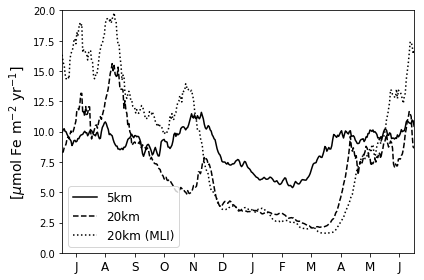

In [33]:
month = ['J','F','M','A','M','J','J','A','S','O','N','D']

fig, ax = plt.subplots(figsize=(6,4))
fig.set_tight_layout(True)
ax.plot(range(360), (dfz_c_XLD+wpFep_c_XLD).roll(day=-180)*1e3*360*86400, 'k', label=r"5km")
ax.plot(range(360), (dfz_20+wpFep_20).roll(day=-180)*1e3*360*86400, 'k--', label=r"20km")
ax.plot(range(360), (dfz_20mli+wpFep_20mli).roll(day=-180)*1e3*360*86400, 'k:', label=r"20km (MLI)")
ax.set_ylim([0.,20])
ax.set_xlim([0,359])
ax.set_xticks(np.linspace(14,344,12))
ax.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax.legend(fontsize=12, loc='lower left')
ax.set_ylabel(r"[$\mu$mol Fe m$^{-2}$ yr$^{-1}$]", fontsize=14)
plt.savefig(op.join(pdir,'Figures/TotVertIronFlux_resolution-comp.pdf'))

In [38]:
Fe1D.coords['day'] = ('time',np.tile(range(360),dy))
with ProgressBar():
    Fe_c = Fe1D.sel(YC=slice(6e5,14e5)).groupby('day').mean(['time','YC','XC']).compute()
Fe_c

[########################################] | 100% Completed | 10.5s


<xarray.DataArray 'TRAC03' (day: 360, Z: 76)>
array([[4.366210e-06, 4.366336e-06, 4.366514e-06, ..., 4.066321e-04,
        4.105548e-04, 4.115560e-04],
       [4.404647e-06, 4.404752e-06, 4.404902e-06, ..., 4.066311e-04,
        4.105522e-04, 4.115556e-04],
       [4.442111e-06, 4.442186e-06, 4.442300e-06, ..., 4.066305e-04,
        4.105500e-04, 4.115551e-04],
       ...,
       [4.273208e-06, 4.273374e-06, 4.273599e-06, ..., 4.067984e-04,
        4.107493e-04, 4.117480e-04],
       [4.301755e-06, 4.301900e-06, 4.302100e-06, ..., 4.068012e-04,
        4.107505e-04, 4.117503e-04],
       [4.332743e-06, 4.332878e-06, 4.333066e-06, ..., 4.068047e-04,
        4.107523e-04, 4.117528e-04]], dtype=float32)
Coordinates:
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 ... -2625.955 -2757.325 -2912.665
    drF      (Z) >f4 1.0 1.14 1.3 1.49 1.7 ... 118.35 126.73 136.01 174.67
    PHrefC   (Z) >f4 4.905 15.4017 27.3699 ... 25760.62 27049.357 28573.244
  * day      (day) int64 0 1 2 3 4 5 6 7 8 ... 

# Entrainment flux

## $$F_{ent} = \Delta c|_{ML} \Big(\frac{dh}{dt} + v\frac{dh}{dy}\Big)$$

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


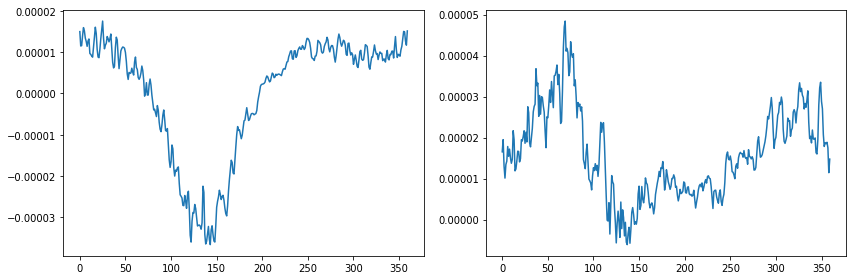

In [22]:
XLD_t = (-MXLD + MXLD.roll(day=-1).data) / 86400
XLD_t = .5*(XLD_t.roll(day=1).data + XLD_t)
XLD_y = (-MXLD + MXLD.roll(YC=-1).data)/(-MXLD.YC + MXLD.YC.roll(YC=-1).data)
XLD_y = .5*(XLD_y.roll(YC=1).data + XLD_y)

In [11]:
zm = xr.DataArray(np.abs(ds.Z).data[np.newaxis,:,np.newaxis]*np.ones((360,400))[:,np.newaxis,:],
                 dims=['day','Z','YC'])
nZMXLD = np.argmin(np.abs(zm-MXLD), axis=1)
nZXLD100 = nZMXLD.data.copy()
nZXLD100[nZXLD100<22] = 22
nZXLD100 = xr.DataArray(nZXLD100, dims=nZMXLD.dims, coords=nZMXLD.coords)

v = ds.VVEL
v_xb = grid.interp(v.mean('XC'),'Y',boundary='fill')
v_xb.coords['day'] = ('time',np.tile(range(360),dy))
v_xb = v_xb.groupby('day').mean('time')
vMLD = v_xb.isel(Z=(nZXLD100))
with ProgressBar():
    vXLD_y = (vMLD*XLD_y).compute()
vXLD_y

[########################################] | 100% Completed |  2min 56.3s


<xarray.DataArray (day: 360, YC: 400)>
array([[ 0.000000e+00,  1.174949e-06, -2.655853e-08, ...,  0.000000e+00,
        -0.000000e+00, -5.080804e-11],
       [ 0.000000e+00,  1.619861e-06, -2.435078e-08, ...,  0.000000e+00,
        -0.000000e+00, -4.694416e-11],
       [ 0.000000e+00,  1.428085e-06, -2.668759e-08, ...,  0.000000e+00,
        -0.000000e+00, -4.138309e-11],
       ...,
       [ 0.000000e+00,  1.076813e-06, -2.312802e-08, ...,  0.000000e+00,
         0.000000e+00, -4.372847e-11],
       [ 0.000000e+00,  1.179078e-06, -2.355277e-08, ...,  0.000000e+00,
         0.000000e+00, -5.420783e-11],
       [ 0.000000e+00,  1.284465e-06, -2.449181e-08, ...,  0.000000e+00,
         0.000000e+00, -4.643814e-11]])
Coordinates:
    Z        (day, YC) float64 -111.6 -1.611e+03 -1.611e+03 -1.544e+03 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * day      (day) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


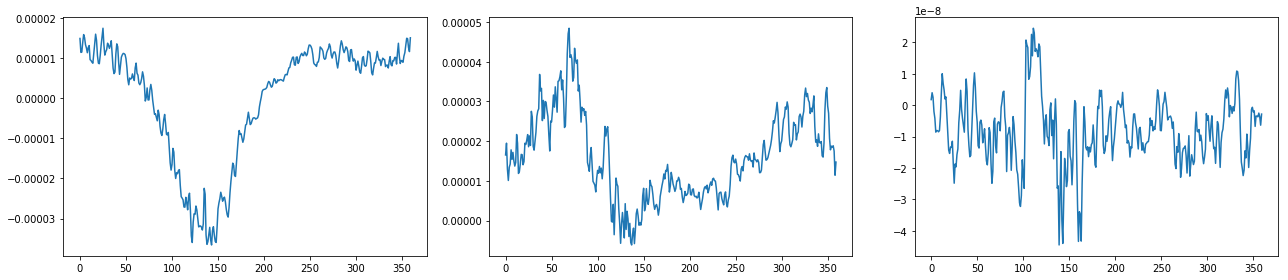

In [26]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18,4))
fig.set_tight_layout(True)
ax1.plot(range(360), XLD_t.sel(YC=slice(6e5,14e5)).mean('YC').roll(day=-180))
ax2.plot(range(360), XLD_y.sel(YC=slice(6e5,14e5)).mean('YC').roll(day=-180))
ax3.plot(range(360), vXLD_y.sel(YC=slice(6e5,14e5)).mean('YC').roll(day=-180))

In [18]:
with ProgressBar():
    Feday = Fe.groupby('day').mean(['time','XC']).compute()
Fe_t = Feday.isel(Z=(nZXLD100))
Fe_b = Feday.isel(Z=(nZXLD100+1))
dFetb = -Fe_t+Fe_b
dFetb

[########################################] | 100% Completed |  1min  9.6s


<xarray.DataArray 'TRAC03' (day: 360, YC: 400)>
array([[0.000000e+00, 3.646623e-06, 3.559893e-06, ..., 4.605827e-06,
        4.396832e-06, 4.412621e-06],
       [0.000000e+00, 3.650697e-06, 3.562949e-06, ..., 4.708359e-06,
        4.496047e-06, 4.463378e-06],
       [0.000000e+00, 3.654830e-06, 3.565365e-06, ..., 4.810179e-06,
        4.594272e-06, 4.520247e-06],
       ...,
       [0.000000e+00, 3.910798e-06, 3.804424e-06, ..., 4.364658e-06,
        4.217247e-06, 4.282265e-06],
       [0.000000e+00, 3.914785e-06, 3.809138e-06, ..., 4.435555e-06,
        4.270027e-06, 4.324989e-06],
       [0.000000e+00, 3.918598e-06, 3.813650e-06, ..., 4.518268e-06,
        4.341986e-06, 4.368732e-06]], dtype=float32)
Coordinates:
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * day      (day) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

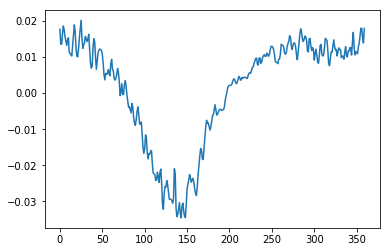

In [86]:
plt.plot(range(360), (dFetb*dXLDdt * 360*86400).roll(day=-180))

In [20]:
n500 = 40
diff_M = dfz_c[:,:n500].max()
diff_M

<xarray.DataArray ()>
array(3.259142e-09)

In [26]:
wpbp = xr.open_dataset(op.join(pdir,'APEconversion_05km.nc')).wpbp
wpbp.coords['days'] = ('time', np.tile(range(24),23))
with ProgressBar():
    wpbp_d = wpbp.sel(YC=slice(6e5,14e5)).groupby('days').mean(['time','YC','XC']).compute()
wpbp_d

<xarray.DataArray 'wpbp' (days: 24, Zl: 76)>
array([[-7.187066e-09,  1.332598e-10,  3.231533e-10, ...,  1.130260e-09,
         3.394472e-10,  7.082715e-11],
       [-1.544291e-08,  1.299605e-10,  3.189735e-10, ...,  1.188880e-09,
         3.307010e-10,  6.157563e-11],
       [-1.069393e-08,  1.325497e-10,  3.251550e-10, ...,  1.065574e-09,
         3.010058e-10,  6.190637e-11],
       ...,
       [ 7.180843e-09,  2.704006e-10,  6.088511e-10, ...,  9.565284e-10,
         2.700874e-10,  5.531997e-11],
       [ 1.512411e-09,  2.137826e-10,  4.909713e-10, ...,  1.150734e-09,
         3.369943e-10,  6.554798e-11],
       [-7.243536e-09,  1.746427e-10,  4.073412e-10, ...,  1.023142e-09,
         2.853009e-10,  5.833577e-11]], dtype=float32)
Coordinates:
  * Zl       (Zl) float32 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 ...
  * days     (days) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

In [35]:
wpbp.Zl[:n500]

<xarray.DataArray 'Zl' (Zl: 40)>
array([   0.  ,   -1.  ,   -2.14,   -3.44,   -4.93,   -6.63,   -8.56,  -10.76,
        -13.26,  -16.1 ,  -19.31,  -22.94,  -27.04,  -31.65,  -36.83,  -42.62,
        -49.09,  -56.29,  -64.27,  -73.1 ,  -82.83,  -93.52, -105.22, -117.98,
       -131.85, -146.88, -163.1 , -180.55, -199.25, -219.22, -240.49, -263.05,
       -286.92, -312.09, -338.55, -366.29, -395.29, -425.53, -456.98, -489.63],
      dtype=float32)
Coordinates:
  * Zl       (Zl) float32 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 ...
Attributes:
    standard_name:      depth_at_upper_w_location
    long_name:          vertical coordinate of upper cell interface
    units:              m
    positive:           down
    axis:               Z
    c_grid_axis_shift:  -0.5

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/xarray/core/dataarray.py:2170: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  shifts=shifts, roll_coords=roll_coords, **shifts_kwargs)
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


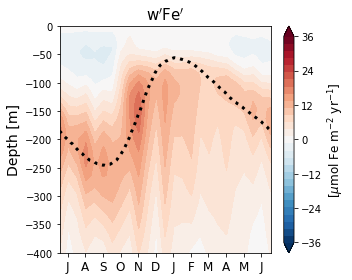

In [31]:
fig, ax = plt.subplots(figsize=(5,4))
fig.set_tight_layout(True)
im = ax.contourf(range(0,375,15), wpFep_d.Zl, wpFep_d.T.roll(day=-12)*360*86400e3, 
                levels=np.linspace(-36,36,30), 
                cmap='RdBu_r', extend='both')
# ax.contourf(range(14,360,15), wpFep_d.Zl, wpFep_d.T.roll(day=-13)*360*86400e3, 
#            levels=np.linspace(-36,36,20), 
#            cmap='RdBu_r', extend='both')
ax.plot(range(360), -MXLD.sel(YC=slice(6e5,14e5)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')

for c in im.collections:
    c.set_rasterized(True)

ax.set_ylim([-4e2,0])
ax.set_title(r"w$'$Fe$'$", fontsize=15)

ax.set_xticks(np.linspace(14,344,12))
ax.set_xticklabels(np.roll(np.array(['J','F','M','A','M','J','J','A','S','O','N','D']),-6), fontsize=12)
ax.set_ylabel(r"Depth [m]", fontsize=14)
cbar = fig.colorbar(im, ax=ax, ticks=[-36,-24,-12,0,12,24,36])
cbar.set_label(r"[$\mu$mol Fe m$^{-2}$ yr$^{-1}$]", fontsize=12)
plt.savefig(op.join(bdir,'Figures/VerticalFeflux_05km.pdf'))

NameError: name 'wpFep_d' is not defined

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


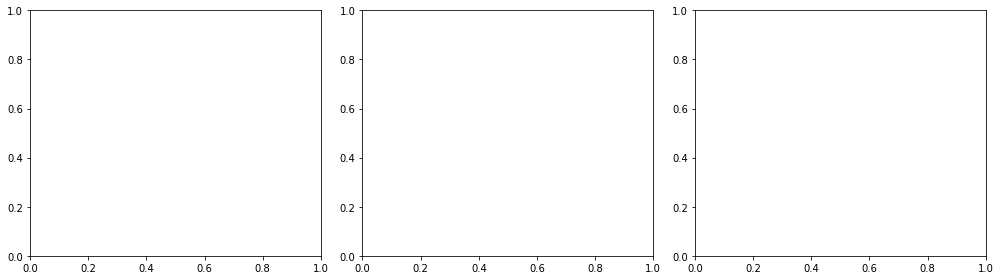

In [20]:
nys, nyn = (6e5,14e5)
month = ['J','F','M','A','M','J','J','A','S','O','N','D']

fig, (ax2,ax3,ax4) = plt.subplots(nrows=1, ncols=3, figsize=(14,4))
fig.set_tight_layout(True)
# im1 = ax1.contourf(np.linspace(0,345,24), wpbp_d.Zl, wpbp_d.T.roll(days=-12)/wpbp_d[:,:n500].max(), 
#                   levels=np.linspace(0.,1.,11), extend='both', cmap='magma')
im2 = ax2.contourf(range(0,346,15), wpFep_d.Zl, wpFep_d.T.roll(day=-12)*1e3*(360*86400), 
                  levels=np.linspace(-30,30,20), 
                   cmap='RdBu_r', extend='both')
ax2.contourf(range(14,360,15), wpFep_d.Zl, wpFep_d.T.roll(day=-13)*1e3*(360*86400), 
            levels=np.linspace(-30,30,20), 
            cmap='RdBu_r', extend='both')
im3 = ax3.contourf(range(360), dfz_c.Zl, dfz_c.T.roll(day=-180)*1e3*(360*86400), 
                  levels=np.linspace(0,30,10), 
                   cmap='Reds', extend='both')
# ax1.contour(range(0,360,15), wpbp_d.Zl, wpbp_d.T.roll(days=-12), colors='k', levels=np.linspace(2e-9,2e-8,8))
# ax2.contour(range(0,360,15), wpbp_d.Zl, wpbp_d.T.roll(days=-12), colors='k', levels=np.linspace(2e-9,2e-8,8))
# ax3.pcolormesh(range(360), dfz_c.Zl, ((dfz_c-adz_c)/diff_M).T.roll(days=-180), 
#                vmax=1, vmin=-1., cmap='RdBu_r', norm=SymLogNorm(0.01), rasterized=True)
im4 = ax4.contourf(range(360), Fe_c.Z, Fe_c.T.roll(day=-180)*1e3,
                  levels=np.linspace(0,0.3,10), 
                   extend='both', cmap='OrRd')
# ax1.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
#         ls=':', lw=3, color='k')
ax2.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
ax3.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
ax4.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
# ax1.set_ylim([-5e2,0])
# ax1.set_xlim([0.,359.])
ax2.set_ylim([-4e2,0])
ax3.set_ylim([-4e2,0])
ax4.set_ylim([-4e2,0])
# ax1.set_title(r"w'b'", fontsize=14)
ax2.set_title(r"w'Fe'", fontsize=15)
ax3.set_title(r"$F_{diff}$", fontsize=15)
ax4.set_title(r"Fe", fontsize=15)
# ax1.set_xticks(np.linspace(14,344,12))
# ax1.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax2.set_xticks(np.linspace(14,344,12))
ax2.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax3.set_xticks(np.linspace(14,344,12))
ax3.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax4.set_xticks(np.linspace(14,344,12))
ax4.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax2.set_ylabel(r"Depth [m]", fontsize=14)
# ax2.set_xlabel(r"Month", fontsize=13)
# fig.subplots_adjust(right=0.88)
# cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.7])
# cbar = fig.colorbar(im, cax=cbar_ax)
# fig.colorbar(im1, ax=ax1)
cbar2 = fig.colorbar(im2, ax=ax2, ticks=[-30,-24,-18,-12,-6,0,6,12,18,24,30])
cbar3 = fig.colorbar(im3, ax=ax3, ticks=[0,6,12,18,24,30])
cbar4 = fig.colorbar(im4, ax=ax4, ticks=[0,0.05,0.1,0.15,0.2,0.25,0.3])
cbar2.set_label(r"[$\mu$mol Fe m$^{-2}$ yr$^{-1}$]", fontsize=12)
cbar3.set_label(r"[$\mu$mol Fe m$^{-2}$ yr$^{-1}$]", fontsize=12)
cbar4.set_label(r"[$\mu$mol Fe m$^{-3}$]", fontsize=12)
plt.savefig(op.join(bdir,'Figures/IronFlux-P_dailyclimatology_05km.pdf'))

In [23]:
# b = grid.diff(ds.PHIHYD,'Z',boundary='fill')/grid.diff(ds.Z,'Z',boundary='fill')
# bk = xrft.dft(b.chunk(chunks={'XC':200}), dim=['XC'], shift=False)
# bx = xr.DataArray(dsar.fft.ifft2(2j*np.pi*(bk*bk.freq_XC).data, axes=(-2,-1)).real,
#                  dims=b.dims, coords=b.coords)
# M2 = np.sqrt(bx**2 + grid.interp(grid.diff(b,'Y',boundary='fill')
#                                 / grid.diff(b.YC,'Y',boundary='fill'),
#                                 'Y',boundary='fill')**2,
#             )
# dbdz = grid.diff(b,'Z',boundary='fill')/grid.diff(ds.Zl,'Z',boundary='fill')
dFedz = grid.diff(Fe1D,'Z',boundary='fill')/grid.diff(ds.Z,'Z',boundary='fill')
# dbdz.coords['days'] = ('time',np.tile(range(360),dy))
dFedz.coords['days'] = ('time',np.tile(range(360),dy))
# M2.coords['days'] = ('time',np.tile(range(360),dy))
with ProgressBar():
#     dbdz_d = dbdz.sel(YC=slice(6e5,14e5)).groupby('days').mean(['time','YC','XC']).compute()
    dFedz_d = dFedz.sel(YC=slice(6e5,14e5)).groupby('days').mean(['time','YC','XC']).compute()
#     M2_d = M2.sel(YC=slice(6e5,14e5)).groupby('days').mean(['time','YC','XC']).compute()
dFedz_d

[########################################] | 100% Completed | 17.7s


<xarray.DataArray (days: 360, Zl: 76)>
array([[-8.868338e-06, -1.118328e-10, -1.388666e-10, ..., -3.559943e-08,
        -3.023079e-08, -6.175376e-09],
       [-8.958463e-06, -9.563995e-11, -1.213629e-10, ..., -3.559489e-08,
        -3.022779e-08, -6.190379e-09],
       [-9.048653e-06, -7.146447e-11, -9.502153e-11, ..., -3.558804e-08,
        -3.022317e-08, -6.203398e-09],
       ...,
       [-8.569225e-06, -1.720292e-10, -2.038242e-10, ..., -3.570274e-08,
        -3.018761e-08, -6.448305e-09],
       [-8.636799e-06, -1.618795e-10, -1.927684e-10, ..., -3.570536e-08,
        -3.017990e-08, -6.455343e-09],
       [-8.716187e-06, -1.592934e-10, -1.902091e-10, ..., -3.570681e-08,
        -3.017101e-08, -6.463728e-09]], dtype=float32)
Coordinates:
  * Zl       (Zl) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
  * days     (days) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

In [31]:
with ProgressBar():
    Ptot_midd = (P1day + P2day).sel(YC=slice(6e5,14e5)).mean(['YC','XC']).compute()
    PPC_midd = PPCday.sel(YC=slice(6e5,14e5)).mean(['YC','XC']).compute()

In [36]:
PPC_midd.T.roll(days=-180)*86400.

<xarray.DataArray 'PP' (Z: 76, days: 360)>
array([[0.733077, 0.724223, 0.7158  , ..., 0.762517, 0.75227 , 0.742364],
       [0.71669 , 0.708145, 0.700018, ..., 0.745114, 0.73522 , 0.725653],
       [0.697185, 0.688993, 0.681204, ..., 0.724447, 0.714957, 0.70578 ],
       ...,
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ]],
      dtype=float32)
Coordinates:
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
    drF      (Z) >f4 1.0 1.14 1.3 1.49 1.7 1.93 2.2 2.5 2.84 3.21 3.63 4.1 ...
    PHrefC   (Z) >f4 4.905 15.4017 27.3699 41.05485 56.7018 74.50695 94.7646 ...
  * days     (days) int64 180 181 182 183 184 185 186 187 188 189 190 191 ...

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/xarray/core/dataarray.py:2170: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  shifts=shifts, roll_coords=roll_coords, **shifts_kwargs)
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


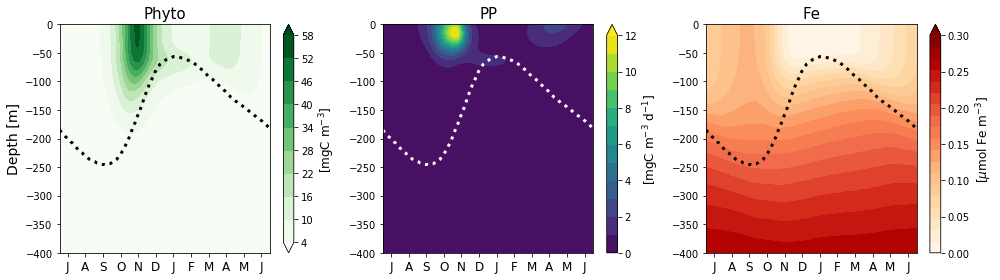

In [43]:
month = ['J','F','M','A','M','J','J','A','S','O','N','D']
fig, (ax1,ax3,ax5) = plt.subplots(nrows=1, ncols=3, figsize=(14,4))
fig.set_tight_layout(True)
# im1 = ax1.contourf(range(360), w2_sqrt.Zl, w2_sqrt.T.roll(day=-180)*86400, 
#                   levels=np.linspace(1,20.,11), cmap='Reds', extend='both')
# im2 = ax2.contourf(range(360), dbdz_d.Z, dbdz_d.T.roll(days=-180), 
#                   levels=np.linspace(-4e-5,4e-5,21), cmap='RdBu_r', extend='both')
# im1 = ax1.contourf(range(360), dFedz_d.Zl, dFedz_d.T.roll(days=-180)*1e3, 
#                   levels=np.linspace(0,.002,21), cmap='Oranges', extend='both')
# ax1.plot(range(360), ZFe_d.roll(days=-180), 'k:')
im1 = ax1.contourf(range(360), (P1day + P2day).Z, (P1day + P2day).T.roll(days=-180)*106.*12., 
                  levels=np.linspace(4,58,10), cmap='Greens', extend='both')
im3 = ax3.contourf(range(360), PPCday.Z, PPCday.T.roll(days=-180)*86400., 
                  levels=np.arange(0,13,1), extend='max')
im5 = ax5.contourf(range(360), Fe_c.Z, Fe_c.T.roll(day=-180)*1e3,
                  levels=np.linspace(0,0.3,20), 
                   extend='max', cmap='OrRd')
# ax1.contour(range(0,360,15), wpbp_d.Zl, wpbp_d.T.roll(days=-12), colors='k', levels=np.linspace(2e-9,2e-8,8))
# ax2.contour(range(0,360,15), wpbp_d.Zl, wpbp_d.T.roll(days=-12), colors='k', levels=np.linspace(2e-9,2e-8,8))
# ax3.pcolormesh(range(360), dfz_c.Zl, ((dfz_c-adz_c)/diff_M).T.roll(days=-180), 
#                vmax=1, vmin=-1., cmap='RdBu_r', norm=SymLogNorm(0.01), rasterized=True)
ax1.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
ax5.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
ax3.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='w')
# ax1.set_ylim([-4e2,0])
# ax2.set_ylim([-5e2,0])
ax1.set_ylim([-4e2,0])
ax3.set_ylim([-4e2,0])
ax5.set_ylim([-4e2,0])
# ax2.set_xlim([0,359])
# ax2.set_title(r"db$/$dz", fontsize=14)
ax1.set_title(r"Phyto", fontsize=15)
# ax1.set_title(r"dFe$/$dz", fontsize=15)
ax3.set_title(r"PP", fontsize=15)
ax5.set_title(r"Fe", fontsize=15)
# ax1.set_xticks(np.linspace(14,344,12))
# ax1.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
# ax2.set_xticks(np.linspace(14,344,12))
# ax2.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax1.set_xticks(np.linspace(14,344,12))
ax1.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax3.set_xticks(np.linspace(14,344,12))
ax3.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax5.set_xticks(np.linspace(14,344,12))
ax5.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax1.set_ylabel(r"Depth [m]", fontsize=14)
# ax2.set_xlabel(r"Month", fontsize=13)
# fig.subplots_adjust(right=0.88)
# cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.7])
# cbar = fig.colorbar(im, cax=cbar_ax)
# cbar1 = fig.colorbar(im1, ax=ax1, ticks=1e-4*np.array([0,4,8,12,16,20]))
# fig.colorbar(im2, ax=ax2)
cbar1 = fig.colorbar(im1, ax=ax1)
cbar3 = fig.colorbar(im3, ax=ax3)
cbar5 = fig.colorbar(im5, ax=ax5, ticks=[0,0.05,0.1,0.15,0.2,0.25,0.3])
cbar5.set_label(r"[$\mu$mol Fe m$^{-3}$]", fontsize=12)
cbar3.set_label(r"[mgC m$^{-3}$ d$^{-1}$]", fontsize=12)
# cbar1.set_label(r"[$\mu$mol Fe m$^{-4}$]", fontsize=12)
cbar1.set_label(r"[mgC m$^{-3}$]", fontsize=12)
plt.savefig(op.join(bdir,'Figures/P-PP-Fe_dailyclimatology_05km.pdf'))

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


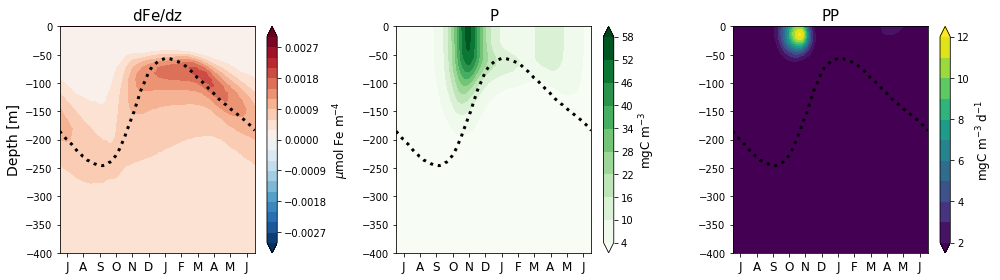

In [24]:
fig, (ax1,ax3,ax4) = plt.subplots(nrows=1, ncols=3, figsize=(14,4))
fig.set_tight_layout(True)
# im1 = ax1.contourf(range(360), w2_sqrt.Zl, w2_sqrt.T.roll(day=-180)*86400, 
#                   levels=np.linspace(1,20.,11), cmap='Reds', extend='both')
# im2 = ax2.contourf(range(360), dbdz_d.Z, dbdz_d.T.roll(days=-180), 
#                   levels=np.linspace(-4e-5,4e-5,21), cmap='RdBu_r', extend='both')
im1 = ax1.contourf(range(360), dFedz_d.Zl, -dFedz_d.T.roll(days=-180)*1e3, 
                  levels=np.linspace(-.003,.003,21), cmap='RdBu_r', extend='both')
im3 = ax3.contourf(range(360), (P1day + P2day).Z, (P1day + P2day).T.roll(days=-180)*106.*12., 
                  levels=np.linspace(4,58,10), cmap='Greens', extend='both')
im4 = ax4.contourf(range(360), PPCday.Z, PPCday.T.roll(days=-180)*86400., 
                  levels=np.arange(2,13,1), extend='both')
# ax1.contour(range(0,360,15), wpbp_d.Zl, wpbp_d.T.roll(days=-12), colors='k', levels=np.linspace(2e-9,2e-8,8))
# ax2.contour(range(0,360,15), wpbp_d.Zl, wpbp_d.T.roll(days=-12), colors='k', levels=np.linspace(2e-9,2e-8,8))
# ax3.pcolormesh(range(360), dfz_c.Zl, ((dfz_c-adz_c)/diff_M).T.roll(days=-180), 
#                vmax=1, vmin=-1., cmap='RdBu_r', norm=SymLogNorm(0.01), rasterized=True)
ax1.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
# ax2.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
#         ls=':', lw=3, color='k')
ax3.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
ax4.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
ax1.set_ylim([-4e2,0])
# ax2.set_ylim([-5e2,0])
ax3.set_ylim([-4e2,0])
ax4.set_ylim([-4e2,0])
# ax2.set_xlim([0,359])
# ax2.set_title(r"db$/$dz", fontsize=14)
ax3.set_title(r"P", fontsize=15)
ax1.set_title(r"dFe$/$dz", fontsize=15)
ax4.set_title(r"PP", fontsize=15)
ax1.set_xticks(np.linspace(14,344,12))
ax1.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
# ax2.set_xticks(np.linspace(14,344,12))
# ax2.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax3.set_xticks(np.linspace(14,344,12))
ax3.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax4.set_xticks(np.linspace(14,344,12))
ax4.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax1.set_ylabel(r"Depth [m]", fontsize=14)
# ax2.set_xlabel(r"Month", fontsize=13)
# fig.subplots_adjust(right=0.88)
# cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.7])
# cbar = fig.colorbar(im, cax=cbar_ax)
cbar1 = fig.colorbar(im1, ax=ax1)
# fig.colorbar(im2, ax=ax2)
cbar3 = fig.colorbar(im3, ax=ax3)
cbar4 = fig.colorbar(im4, ax=ax4)
cbar4.set_label(r"mgC m$^{-3}$ d$^{-1}$", fontsize=12)
cbar1.set_label(r"$\mu$mol Fe m$^{-4}$", fontsize=12)
cbar3.set_label(r"mgC m$^{-3}$", fontsize=12)
plt.savefig(op.join(bdir,'Figures/Fez-P-PP_dailyclimatology_05km.pdf'))

In [53]:
with ProgressBar():
    TpFep_clim = TpFep.mean(['time','XC']).compute()

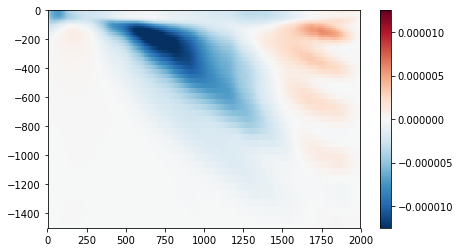

In [55]:
fig, ax = plt.subplots(figsize=(7,4))
im = ax.pcolormesh(TpFep.YC*1e-3, TpFep.Z, TpFep_clim,
                  cmap='RdBu_r', vmin=-1.25e-5, vmax=1.25e-5)
ax.set_ylim([-1500,0.])
fig.colorbar(im, ax=ax)

In [23]:
print(dFetb.dims, XLD_t.dims, vXLD_y.dims)

('day', 'YC') ('day', 'YC') ('day', 'YC')


In [24]:
with ProgressBar():
    Fent = (dFetb*(XLD_t + vXLD_y)).sel(YC=slice(6e5,14e5)).mean('YC').compute()
Fent

<xarray.DataArray (day: 360)>
array([-9.959122e-11, -9.372963e-11, -6.908899e-11, ..., -1.602841e-10,
       -1.434317e-10, -1.205979e-10])
Coordinates:
  * day      (day) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


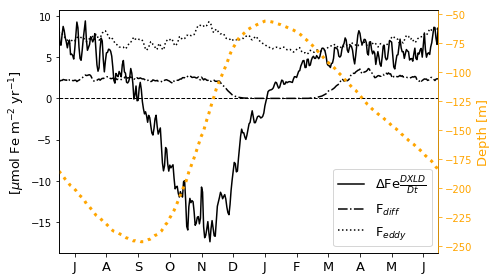

In [25]:
month = ['J','F','M','A','M','J','J','A','S','O','N','D']

fig, ax = plt.subplots(figsize=(7,4))
fig.set_tight_layout(True)
ax2 = ax.twinx()
ax.plot(range(360), Fent.roll(day=-180) * 1e3*360*86400, 'k', label=r"$\Delta$Fe$\frac{DXLD}{Dt}$")
ax.plot(range(360), dfz_c_XLD.roll(day=-180) * 1e3*360*86400, 'k-.', label=r"F$_{diff}$")
ax.plot(range(360), wpFep_c_XLD.roll(day=-180) * 1e3*360*86400, 'k:', label=r"F$_{eddy}$")
ax.plot(range(360), np.zeros(360), 'k--', lw=1)
ax.set_ylabel(r"[$\mu$mol Fe m$^{-2}$ yr$^{-1}$]", fontsize=13)
ax.set_xlim([0,359])
ax.legend(loc='lower right', fontsize=13)
ax.set_xticks(np.linspace(15,345,12))
ax.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
im, = ax2.plot(range(360), -MXLD.sel(YC=slice(6e5,14e5)).mean(['YC']).roll(day=-180), 
              ls=':', lw=3, color='orange')
ax2.spines["right"].set_edgecolor(im.get_color())
ax2.tick_params(axis='y', colors=im.get_color())
ax2.set_ylabel(r"Depth [m]", fontsize=13, color='orange')
plt.savefig(op.join(pdir,'Figures/VertFlux_wEntrainment.pdf'))

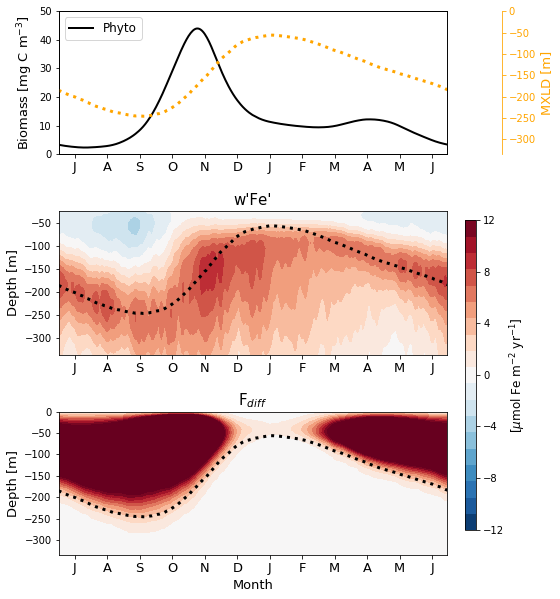

In [47]:
month = ['J','F','M','A','M','J','J','A','S','O','N','D']
colors = ['r','orange','g','b']
nys,nyn = 1e3*np.array([600,1400])

fig, (ax1,ax3,ax9) = plt.subplots(nrows=3, ncols=1, figsize=(8,10))
# fig.set_tight_layout(True)
ax2 = ax1.twinx()
ax5 = ax1.twinx()
# ax7 = ax3.twinx()
# ax4 = ax3.twinx()
# ax6 = ax3.twinx()
# ax7 = ax3.twinx()
ax5.spines["right"].set_position(("axes", 1.14))
# ax6.spines["right"].set_position(("axes", 1.17))
# make_patch_spines_invisible(ax7)
# ax7.spines["right"].set_visible(True)

ax1.plot(range(360), PtotCday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        'k', lw=2, label=r'Phyto')
# ax2.plot(range(360), wpFep_c_XLD.roll(day=-180)*(360*86400)*1e3, 
#         ls='--', lw=2, color='r', label=r"F$_{eddy}$")
# ax2.plot(range(360), dfz_c_XLD.roll(day=-180)*(360*86400)*1e3, 
#         ls='--', lw=2, color='b', label=r"$F_{diff}$")
im3 = ax3.contourf(range(360), wpFep_d.Zl, wpFep_d.mean('YC').T.roll(day=-180)*(360*86400)*1e3, 
                  levels=np.linspace(-12,12,20), cmap='RdBu_r')
im9 = ax9.contourf(range(360), dfz_c.Zl, dfz_c.mean('YC').T.roll(day=-180)*(360*86400)*1e3, 
                  levels=np.linspace(-12,12,20), cmap='RdBu_r', extend='both')
ax3.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
ax9.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-52,-56)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'52-56S (CbPM)', ls='--', lw=2, color=colors[1])
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-56,-60)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'56-60S (CbPM)', ls='--', lw=2, color=colors[2])
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-60,-64)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'60-64S (CbPM)', ls='--', lw=2, color=colors[3])

im5, = ax5.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
               ls=':', lw=3, color='orange')


ax1.set_xticks(np.linspace(15,345,12))
ax1.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
# ax.set_xlim([0,Ndays-1])
ax1.set_ylim([0.,50.])
ax1.set_xlim([0.,359])
ax2.set_ylim([0,1.5e1])
ax2.set_yticks([])
# ax1.set_xlabel(r'Month', fontsize=13)
ax5.set_ylabel('MXLD [m]', color='orange', fontsize=13)
ax5.tick_params('y', colors='orange')
ax3.set_ylim([-335,-25])
ax5.set_ylim([-335,0])
ax9.set_ylim([-335,0])
# ax1.set_title(r"Biomass", fontsize=15)
ax1.set_ylabel(r'Biomass [mg C m$^{-3}$]', fontsize=13)
ax1.legend(loc='upper left', fontsize=12)
# ax2.legend(loc='upper right', fontsize=12)
# ax2.set_ylabel('$F$ [$\mu$mol Fe m$^{-2}$ yr$^{-1}$]', fontsize=13)



# i = 0
# for y in range(150,50,-25):
#     ax3.plot(range(360), (PPintg*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#             lw=2, color=colors[i])
#     i += 1

ax5.spines["right"].set_edgecolor(im5.get_color())
ax5.tick_params(axis='y', colors=im5.get_color())

# ax.set_xlim([0,Ndays-1])
ax3.set_xlim([0.,359])
ax9.set_xlim([0.,359])
ax3.set_xticks(np.linspace(15,345,12))
ax3.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
ax9.set_xticks(np.linspace(15,345,12))
ax9.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
ax3.set_ylabel(r"Depth [m]", fontsize=13)
ax9.set_ylabel(r"Depth [m]", fontsize=13)
ax9.set_xlabel(r'Month', fontsize=13)
# ax3.legend(loc='upper right', fontsize=12)
# ax3.set_title(r"Productivity", fontsize=15)
# cbar3 = fig.colorbar(im3, ax=ax3, ticks=[-20,-15,-10,-5,0,5,10,15,20])
fig.subplots_adjust(right=0.80)
cbar_ax = fig.add_axes([0.83, 0.16, 0.02, 0.43])
cbar = fig.colorbar(im3, cax=cbar_ax, ticks=[-12,-8,-4,0,4,8,12])
cbar.set_label(r'[$\mu$mol Fe m$^{-2}$ yr$^{-1}$]', fontsize=12)
ax9.set_title(r'F$_{diff}$', fontsize=15)
# ax3.legend(loc='upper left', fontsize=12)
ax3.set_title(r"w'Fe'", fontsize=15)
fig.subplots_adjust(hspace=.4)
# ax9.legend(loc='upper left', fontsize=12)
# ax4.legend(loc='upper right', fontsize=12)
plt.savefig(op.join(pdir,'Figures/Biomass_woutflux_wHopfMellor_05km.pdf'))

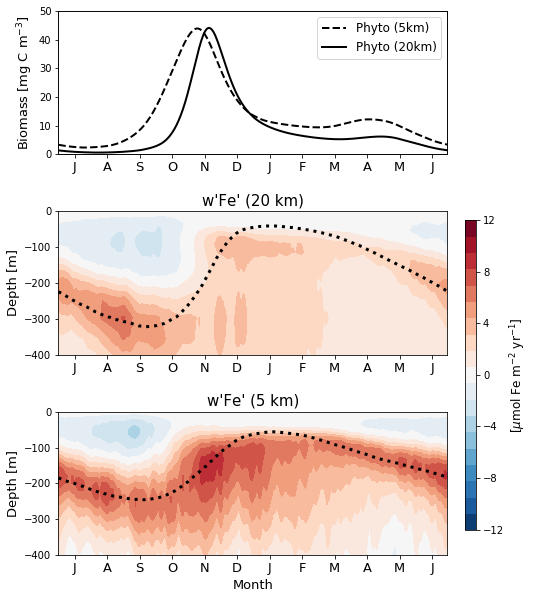

In [51]:
month = ['J','F','M','A','M','J','J','A','S','O','N','D']
colors = ['r','orange','g','b']
nys,nyn = 1e3*np.array([600,1400])
PtotC20 = xr.open_dataset(op.join(bdir,'Ptot_600-1400km_20km.nc')).P_biomass
wpFep_20 = xr.open_dataset(op.join(bdir,'wpFep_600-1400km_20km.nc')).wpFep
hbl99 = xr.open_dataset(op.join(pdir,'KPPhbl_99percentile_20km.nc')).hbl99
# MXLD.coords['DinY'] = ('time',np.tile(range(360),5))
MXLD20 = hbl99.groupby('day').mean(['time'])

fig, (ax1,ax3,ax9) = plt.subplots(nrows=3, ncols=1, figsize=(8,10))
# fig.set_tight_layout(True)
ax2 = ax1.twinx()
# ax5 = ax1.twinx()
# ax7 = ax3.twinx()
# ax4 = ax3.twinx()
# ax6 = ax3.twinx()
# ax7 = ax3.twinx()
# ax5.spines["right"].set_position(("axes", 1.14))
# ax6.spines["right"].set_position(("axes", 1.17))
# make_patch_spines_invisible(ax7)
# ax7.spines["right"].set_visible(True)

ax1.plot(range(360), PtotCday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        'k--', lw=2, label=r'Phyto (5km)')
ax1.plot(range(360), PtotC20.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        'k', lw=2, label=r'Phyto (20km)')
# ax2.plot(range(360), wpFep_c_XLD.roll(day=-180)*(360*86400)*1e3, 
#         ls='--', lw=2, color='r', label=r"F$_{eddy}$")
# ax2.plot(range(360), dfz_c_XLD.roll(day=-180)*(360*86400)*1e3, 
#         ls='--', lw=2, color='b', label=r"$F_{diff}$")
im3 = ax3.contourf(range(360), wpFep_20.Zl, wpFep_20.mean('YC').T.roll(day=-180)*(360*86400)*1e3, 
                  levels=np.linspace(-12,12,20), cmap='RdBu_r')
im9 = ax9.contourf(range(360), wpFep_d.Zl, wpFep_d.mean('YC').T.roll(day=-180)*(360*86400)*1e3, 
                  levels=np.linspace(-12,12,20), cmap='RdBu_r')
ax3.plot(range(360), -MXLD20.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
ax9.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-52,-56)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'52-56S (CbPM)', ls='--', lw=2, color=colors[1])
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-56,-60)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'56-60S (CbPM)', ls='--', lw=2, color=colors[2])
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-60,-64)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'60-64S (CbPM)', ls='--', lw=2, color=colors[3])

# im5, = ax5.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
#                ls=':', lw=3, color='orange')


ax1.set_xticks(np.linspace(15,345,12))
ax1.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
# ax.set_xlim([0,Ndays-1])
ax1.set_ylim([0.,50.])
ax1.set_xlim([0.,359])
ax2.set_ylim([0,1.5e1])
ax2.set_yticks([])
# ax1.set_xlabel(r'Month', fontsize=13)
# ax5.set_ylabel('MXLD [m]', color='orange', fontsize=13)
# ax5.tick_params('y', colors='orange')
ax3.set_ylim([-400,0])
# ax5.set_ylim([-400,0])
ax9.set_ylim([-400,0])
# ax1.set_title(r"Biomass", fontsize=15)
ax1.set_ylabel(r'Biomass [mg C m$^{-3}$]', fontsize=13)
ax1.legend(loc='upper right', fontsize=12)
# ax2.legend(loc='upper right', fontsize=12)
# ax2.set_ylabel('$F$ [$\mu$mol Fe m$^{-2}$ yr$^{-1}$]', fontsize=13)



# i = 0
# for y in range(150,50,-25):
#     ax3.plot(range(360), (PPintg*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#             lw=2, color=colors[i])
#     i += 1

ax5.spines["right"].set_edgecolor(im5.get_color())
ax5.tick_params(axis='y', colors=im5.get_color())

# ax.set_xlim([0,Ndays-1])
ax3.set_xlim([0.,359])
ax9.set_xlim([0.,359])
ax3.set_xticks(np.linspace(15,345,12))
ax3.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
ax9.set_xticks(np.linspace(15,345,12))
ax9.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
ax3.set_ylabel(r"Depth [m]", fontsize=13)
ax9.set_ylabel(r"Depth [m]", fontsize=13)
ax9.set_xlabel(r'Month', fontsize=13)
# ax3.legend(loc='upper right', fontsize=12)
# ax3.set_title(r"Productivity", fontsize=15)
# cbar3 = fig.colorbar(im3, ax=ax3, ticks=[-20,-15,-10,-5,0,5,10,15,20])
fig.subplots_adjust(right=0.80)
cbar_ax = fig.add_axes([0.83, 0.16, 0.02, 0.43])
cbar = fig.colorbar(im3, cax=cbar_ax, ticks=[-12,-8,-4,0,4,8,12])
cbar.set_label(r"[$\mu$mol Fe m$^{-2}$ yr$^{-1}$]", fontsize=12)
ax9.set_title(r"w'Fe' (5 km)", fontsize=15)
# ax3.legend(loc='upper left', fontsize=12)
ax3.set_title(r"w'Fe' (20 km)", fontsize=15)
fig.subplots_adjust(hspace=.4)
# ax9.legend(loc='upper left', fontsize=12)
# ax4.legend(loc='upper right', fontsize=12)
plt.savefig(op.join(pdir,'Figures/Biomass_wHopfMellor_20-05km.pdf'))

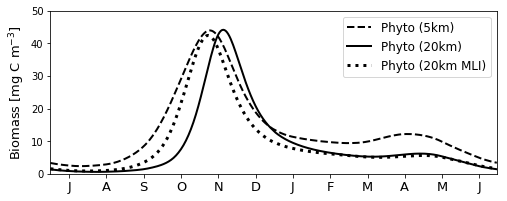

In [59]:
month = ['J','F','M','A','M','J','J','A','S','O','N','D']
colors = ['r','orange','g','b']
nys,nyn = 1e3*np.array([600,1400])
PtotC20 = xr.open_dataset(op.join(bdir,'Ptot_600-1400km_20km.nc')).P_biomass
PtotC20mli = xr.open_dataset(op.join(bdir,'Ptot_600-1400km_20kmMLI.nc')).P_biomass
wpFep_20mli = xr.open_dataset(op.join(bdir,'wpFep_600-1400km_20kmMLI.nc')).wMLIFep
hbl99 = xr.open_dataset(op.join(pdir,'KPPhbl_99percentile_20km.nc')).hbl99
# MXLD.coords['DinY'] = ('time',np.tile(range(360),5))
MXLD20 = hbl99.groupby('day').mean(['time'])
hbl99 = xr.open_dataset(op.join(pdir,'KPPhbl_99percentile_20kmMLI.nc')).hbl99
# MXLD.coords['DinY'] = ('time',np.tile(range(360),5))
MXLD20mli = hbl99.groupby('day').mean(['time'])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,3))
# fig.set_tight_layout(True)
# ax2 = ax1.twinx()
# ax5 = ax1.twinx()
# ax7 = ax3.twinx()
# ax4 = ax3.twinx()
# ax6 = ax3.twinx()
# ax7 = ax3.twinx()
# ax5.spines["right"].set_position(("axes", 1.14))
# ax6.spines["right"].set_position(("axes", 1.17))
# make_patch_spines_invisible(ax7)
# ax7.spines["right"].set_visible(True)

ax.plot(range(360), PtotCday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
       'k--', lw=2, label=r'Phyto (5km)')
ax.plot(range(360), PtotC20.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
       'k', lw=2, label=r'Phyto (20km)')
ax.plot(range(360), PtotC20mli.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
       'k:', lw=3, label=r'Phyto (20km MLI)')
# ax2.plot(range(360), wpFep_c_XLD.roll(day=-180)*(360*86400)*1e3, 
#         ls='--', lw=2, color='r', label=r"F$_{eddy}$")
# ax2.plot(range(360), dfz_c_XLD.roll(day=-180)*(360*86400)*1e3, 
#         ls='--', lw=2, color='b', label=r"$F_{diff}$")
ax.set_xticks(np.linspace(15,345,12))
ax.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
# ax.set_xlim([0,Ndays-1])
ax.set_ylim([0.,50.])
ax.set_xlim([0.,359])
ax.set_ylabel(r'Biomass [mg C m$^{-3}$]', fontsize=13)
ax.legend(loc='upper right', fontsize=12)
plt.savefig(op.join(pdir,'Figures/Biomass_5-20-20MLIkm.pdf'))

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


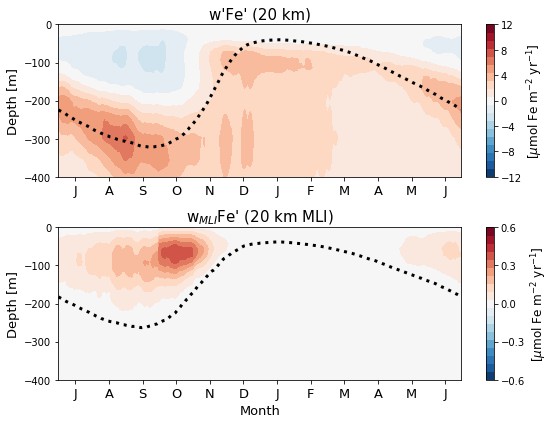

In [57]:
fig, (ax3,ax9) = plt.subplots(nrows=2, ncols=1, figsize=(8,6))
fig.set_tight_layout(True)
im3 = ax3.contourf(range(360), wpFep_20.Zl, wpFep_20.mean('YC').T.roll(day=-180)*(360*86400)*1e3, 
                  levels=np.linspace(-12,12,20), cmap='RdBu_r')
im9 = ax9.contourf(range(360), wpFep_20mli.Zl, wpFep_20mli.mean('YC').T.roll(day=-180)*(360*86400)*1e3, 
                  levels=np.linspace(-.6,.6,20), cmap='RdBu_r')
ax3.plot(range(360), -MXLD20.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
ax9.plot(range(360), -MXLD20mli.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-52,-56)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'52-56S (CbPM)', ls='--', lw=2, color=colors[1])
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-56,-60)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'56-60S (CbPM)', ls='--', lw=2, color=colors[2])
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-60,-64)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'60-64S (CbPM)', ls='--', lw=2, color=colors[3])

# im5, = ax5.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
#                ls=':', lw=3, color='orange')


ax2.set_ylim([0,1.5e1])
ax2.set_yticks([])
# ax1.set_xlabel(r'Month', fontsize=13)
# ax5.set_ylabel('MXLD [m]', color='orange', fontsize=13)
# ax5.tick_params('y', colors='orange')
ax3.set_ylim([-400,0])
# ax5.set_ylim([-400,0])
ax9.set_ylim([-400,0])
# ax1.set_title(r"Biomass", fontsize=15)
# ax2.legend(loc='upper right', fontsize=12)
# ax2.set_ylabel('$F$ [$\mu$mol Fe m$^{-2}$ yr$^{-1}$]', fontsize=13)



# i = 0
# for y in range(150,50,-25):
#     ax3.plot(range(360), (PPintg*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#             lw=2, color=colors[i])
#     i += 1

# ax5.spines["right"].set_edgecolor(im5.get_color())
# ax5.tick_params(axis='y', colors=im5.get_color())

# ax.set_xlim([0,Ndays-1])
ax3.set_xlim([0.,359])
ax9.set_xlim([0.,359])
ax3.set_xticks(np.linspace(15,345,12))
ax3.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
ax9.set_xticks(np.linspace(15,345,12))
ax9.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
ax3.set_ylabel(r"Depth [m]", fontsize=13)
ax9.set_ylabel(r"Depth [m]", fontsize=13)
ax9.set_xlabel(r'Month', fontsize=13)
# ax3.legend(loc='upper right', fontsize=12)
# ax3.set_title(r"Productivity", fontsize=15)
# cbar3 = fig.colorbar(im3, ax=ax3, ticks=[-20,-15,-10,-5,0,5,10,15,20])
fig.subplots_adjust(right=0.80)
# cbar_ax = fig.add_axes([0.83, 0.16, 0.02, 0.43])
cbar3 = fig.colorbar(im3, ax=ax3, ticks=[-12,-8,-4,0,4,8,12])
cbar3.set_label(r"[$\mu$mol Fe m$^{-2}$ yr$^{-1}$]", fontsize=12)
cbar9 = fig.colorbar(im9, ax=ax9, ticks=[-.6,-.3,0,.3,.6])
cbar9.set_label(r"[$\mu$mol Fe m$^{-2}$ yr$^{-1}$]", fontsize=12)
ax9.set_title(r"w$_{MLI}$Fe' (20 km MLI)", fontsize=15)
# ax3.legend(loc='upper left', fontsize=12)
ax3.set_title(r"w'Fe' (20 km)", fontsize=15)
fig.subplots_adjust(hspace=.4)
# ax9.legend(loc='upper left', fontsize=12)
# ax4.legend(loc='upper right', fontsize=12)
plt.savefig(op.join(pdir,'Figures/wFe_HopfMellor_20-20MLIkm.pdf'))

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


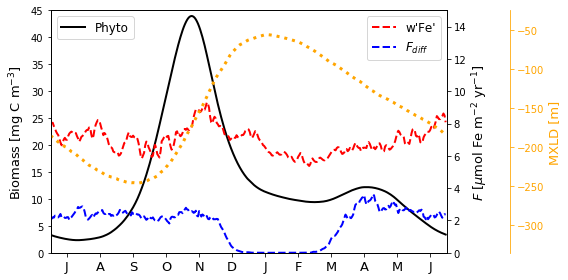

In [37]:
month = ['J','F','M','A','M','J','J','A','S','O','N','D']
colors = ['r','orange','g','b']
nys,nyn = 1e3*np.array([600,1400])

fig, ax = plt.subplots(figsize=(8,4))
fig.set_tight_layout(True)
ax2 = ax.twinx()
ax5 = ax.twinx()
# ax7 = ax.twinx()

ax5.spines["right"].set_position(("axes", 1.16))
# ax7.spines["right"].set_position(("axes", 1.29))
# make_patch_spines_invisible(ax7)
# ax7.spines["right"].set_visible(True)


# i = 0
# for y in range(150,50,-25):
#     ax1.plot(range(360), (P1Cday+P2Cday).isel(YC=slice(y-25,y)).mean(['YC','XC']).roll(days=-180), 
#             lw=2, color=colors[i],
#             label=r'%03d-%03dkm' % ((y-25)*1e1,y*1e1))
#     ax1.plot(range(360), ((P1day+P2day)[:,0]*106.*12.).isel(YC=slice(y-25,y)).mean(['YC','XC']).roll(days=-180), 
#             lw=1, ls=':', color=colors[i])
#     i += 1
# ax.plot(range(360), P1Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'g', lw=2, label=r'P$_1$')
# ax.plot(range(360), P2Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'y', lw=2, label=r'P$_2$')
ax.plot(range(360), PtotCday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        'k', lw=2, label=r'Phyto')
# ax.plot(range(360), 
#          (P1day+P2day).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180)[:,0]*106.*12., 
#         'g', lw=1.2, ls=':', label=r'P$_{1+2}$ (surf)')
# ax1.plot(range(360), Z1Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'r', lw=2, label=r'Z$_1$')
# ax1.plot(range(360), Z2Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'm', lw=2, label=r'Z$_2$')
    
# ax1.plot(range(360), (P1Cday+P2Cday+Z1Cday+Z2Cday).isel(YC=slice(50,150)).mean(['YC','XC']).roll(days=-180), 
#         lw=2, color='k', label='mean')
im5, = ax5.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
              ls=':', lw=3, color='orange')
ax2.plot(range(360), wpFep_c_XLD.roll(day=-180)*(360*86400)*1e3, 
        ls='--', lw=2, color='r', label=r"w'Fe'")
ax2.plot(range(360), dfz_c_XLD.roll(day=-180)*(360*86400)*1e3, 
        ls='--', lw=2, color='b', label=r"$F_{diff}$")


# ax5.spines["right"].set_edgecolor(im2.get_color())
ax5.spines["right"].set_edgecolor(im5.get_color())
# ax7.spines["right"].set_edgecolor(im7.get_color())

ax5.tick_params(axis='y', colors=im5.get_color())
# ax7.tick_params(axis='y', colors=im7.get_color())

ax.set_xticks(np.linspace(15,345,12))
ax.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
# ax.set_xlim([0,Ndays-1])
ax.set_ylim([0.,45.])
ax.set_xlim([0.,360])
ax2.set_ylim([0,1.5e1])
# ax7.set_ylim([0.,.5])
# ax1.set_xlabel(r'Month', fontsize=13)
ax5.set_ylabel('MXLD [m]', color='orange', fontsize=13)
ax5.tick_params('y', colors='orange')
ax5.set_ylim([-335,-25])
# ax.set_title(r"Biomass", fontsize=15)
ax.set_ylabel(r'Biomass [mg C m$^{-3}$]', fontsize=13)
ax.legend(loc='upper left', fontsize=12)
ax2.set_ylabel('$F$ [$\mu$mol Fe m$^{-2}$ yr$^{-1}$]', fontsize=13)
ax2.legend(loc='upper right', fontsize=12)
# ax2.tick_params('y', colors='r')
# ax7.set_ylabel('$\partial_z F_{diff}|_{z=100m}$ [mmol Fe m$^{-3}$ s$^{-1}$]', color='b', fontsize=13)
# ax7.tick_params('y', colors='b')

plt.savefig(op.join(pdir,'Figures/Biomass_Fadv-Fdiff_05km.pdf'))

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


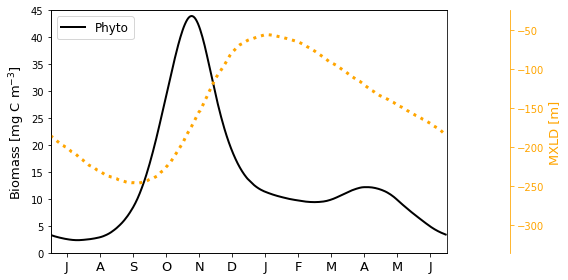

In [38]:
month = ['J','F','M','A','M','J','J','A','S','O','N','D']
colors = ['r','orange','g','b']
nys,nyn = 1e3*np.array([600,1400])

fig, ax = plt.subplots(figsize=(8,4))
fig.set_tight_layout(True)
# ax2 = ax.twinx()
ax5 = ax.twinx()
# ax7 = ax.twinx()

ax5.spines["right"].set_position(("axes", 1.16))
# ax7.spines["right"].set_position(("axes", 1.29))
# make_patch_spines_invisible(ax7)
# ax7.spines["right"].set_visible(True)


# i = 0
# for y in range(150,50,-25):
#     ax1.plot(range(360), (P1Cday+P2Cday).isel(YC=slice(y-25,y)).mean(['YC','XC']).roll(days=-180), 
#             lw=2, color=colors[i],
#             label=r'%03d-%03dkm' % ((y-25)*1e1,y*1e1))
#     ax1.plot(range(360), ((P1day+P2day)[:,0]*106.*12.).isel(YC=slice(y-25,y)).mean(['YC','XC']).roll(days=-180), 
#             lw=1, ls=':', color=colors[i])
#     i += 1
# ax.plot(range(360), P1Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'g', lw=2, label=r'P$_1$')
# ax.plot(range(360), P2Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'y', lw=2, label=r'P$_2$')
ax.plot(range(360), PtotCday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        'k', lw=2, label=r'Phyto')
# ax.plot(range(360), 
#          (P1day+P2day).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180)[:,0]*106.*12., 
#         'g', lw=1.2, ls=':', label=r'P$_{1+2}$ (surf)')
# ax1.plot(range(360), Z1Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'r', lw=2, label=r'Z$_1$')
# ax1.plot(range(360), Z2Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'm', lw=2, label=r'Z$_2$')
    
# ax1.plot(range(360), (P1Cday+P2Cday+Z1Cday+Z2Cday).isel(YC=slice(50,150)).mean(['YC','XC']).roll(days=-180), 
#         lw=2, color='k', label='mean')
im5, = ax5.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
              ls=':', lw=3, color='orange')
# ax2.plot(range(360), adz_c_100.roll(days=-180)*1e3, 
#         ls='--', lw=2, color='r', label=r"$F_{adv}$")
# ax2.plot(range(360), dfz_c_100.roll(days=-180)*1e3, 
#         ls='--', lw=2, color='b', label=r"$F_{diff}$")


# ax5.spines["right"].set_edgecolor(im2.get_color())
ax5.spines["right"].set_edgecolor(im5.get_color())
# ax7.spines["right"].set_edgecolor(im7.get_color())

ax5.tick_params(axis='y', colors=im5.get_color())
# ax7.tick_params(axis='y', colors=im7.get_color())

ax.set_xticks(np.linspace(15,345,12))
ax.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
# ax.set_xlim([0,Ndays-1])
ax.set_ylim([0.,45.])
ax.set_xlim([0.,360])
# ax2.set_ylim([0,15e-8])
# ax7.set_ylim([0.,.5])
# ax1.set_xlabel(r'Month', fontsize=13)
ax5.set_ylabel('MXLD [m]', color='orange', fontsize=13)
ax5.tick_params('y', colors='orange')
ax5.set_ylim([-335,-25])
# ax.set_title(r"Biomass", fontsize=15)
ax.set_ylabel(r'Biomass [mg C m$^{-3}$]', fontsize=13)
ax.legend(loc='upper left', fontsize=12)
# ax2.set_ylabel('$F|_{z=100m}$ [$\mu$mol Fe m$^{-3}$ s$^{-1}$]', fontsize=13)
# ax2.legend(loc='upper right', fontsize=12)
# ax2.tick_params('y', colors='r')
# ax7.set_ylabel('$\partial_z F_{diff}|_{z=100m}$ [mmol Fe m$^{-3}$ s$^{-1}$]', color='b', fontsize=13)
# ax7.tick_params('y', colors='b')

plt.savefig(op.join(pdir,'Figures/Biomass_05km.pdf'))

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


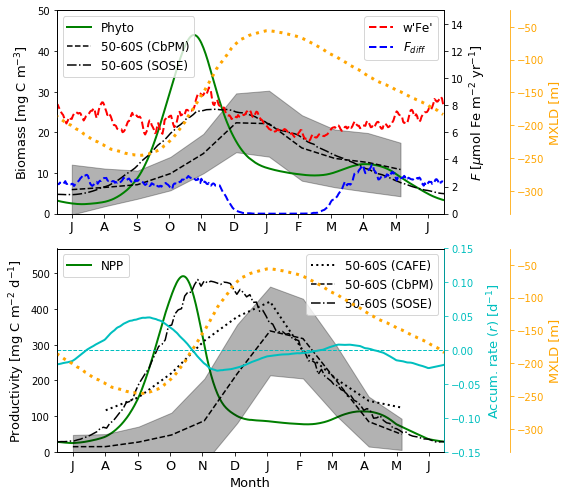

In [35]:
month = ['J','F','M','A','M','J','J','A','S','O','N','D']
colors = ['r','orange','g','b']
nys,nyn = 1e3*np.array([600,1400])

fig, (ax1,ax3) = plt.subplots(nrows=2, ncols=1, figsize=(8,7))
fig.set_tight_layout(True)
ax2 = ax1.twinx()
ax5 = ax1.twinx()
ax7 = ax3.twinx()
ax4 = ax3.twinx()
ax6 = ax3.twinx()
# ax7 = ax3.twinx()
ax5.spines["right"].set_position(("axes", 1.17))
ax6.spines["right"].set_position(("axes", 1.17))
# make_patch_spines_invisible(ax7)
# ax7.spines["right"].set_visible(True)

ax2.plot(range(360), wpFep_c_XLD.roll(day=-180)*(360*86400)*1e3, 
        ls='--', lw=2, color='r', label=r"w'Fe'")
ax2.plot(range(360), dfz_c_XLD.roll(day=-180)*(360*86400)*1e3, 
        ls='--', lw=2, color='b', label=r"$F_{diff}$")
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-52,-56)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'52-56S (CbPM)', ls='--', lw=2, color=colors[1])
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-56,-60)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'56-60S (CbPM)', ls='--', lw=2, color=colors[2])
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-60,-64)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'60-64S (CbPM)', ls='--', lw=2, color=colors[3])

# i = 0
# for y in range(150,50,-25):
#     ax1.plot(range(360), (P1Cday+P2Cday).isel(YC=slice(y-25,y)).mean(['YC','XC']).roll(days=-180), 
#             lw=2, color=colors[i],
#             label=r'%03d-%03dkm' % ((y-25)*1e1,y*1e1))
#     ax1.plot(range(360), ((P1day+P2day)[:,0]*106.*12.).isel(YC=slice(y-25,y)).mean(['YC','XC']).roll(days=-180), 
#             lw=1, ls=':', color=colors[i])
#     i += 1
# ax1.plot(range(360), P1Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'g', lw=2, label=r'P$_1$')
# ax1.plot(range(360), P2Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'y', lw=2, label=r'P$_2$')
ax1.plot(range(360), PtotCday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        'g', lw=2, label=r'Phyto')
ax1.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-50,-60)).mean(['lat','lon']).roll(months=-6), 
        label=r'50-60S (CbPM)', ls='--', color='k')
ax1.fill_between(np.linspace(15,350,12), 
                ((c_ker_mon-c_ker_std).sel(lat=slice(-50,-60)).mean(['lat','lon'])).roll(months=-6), 
                ((c_ker_mon+c_ker_std).sel(lat=slice(-50,-60)).mean(['lat','lon'])).roll(months=-6), 
                color='k', alpha=0.3)
# ax1.plot(range(360), 
#          (P1day+P2day).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180)[:,0]*106.*12., 
#         'g', lw=1.2, ls=':', label=r'P$_{1+2}$ (surf)')
# ax1.plot(range(360), Z1Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'r', lw=2, label=r'Z$_1$')
# ax1.plot(range(360), Z2Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'm', lw=2, label=r'Z$_2$')
    
# ax1.plot(range(360), (P1Cday+P2Cday+Z1Cday+Z2Cday).isel(YC=slice(50,150)).mean(['YC','XC']).roll(days=-180), 
#         lw=2, color='k', label='mean')
im5, = ax5.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
              ls=':', lw=3, color='orange')

ax1.plot(np.linspace(1,363,len(P_kersurf.DinY)), 
        (P_kersurf.roll(DinY=-60)*1e3*12.).sel(iLAT=slice(-60,-50)).mean(['iLAT','iLON']), 
        'k-.', label='50-60S (SOSE)')

ax1.set_xticks(np.linspace(15,345,12))
ax1.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
# ax.set_xlim([0,Ndays-1])
ax1.set_ylim([0.,50.])
ax1.set_xlim([1.,360])
ax2.set_ylim([0,1.5e1])
# ax1.set_xlabel(r'Month', fontsize=13)
ax5.set_ylabel('MXLD [m]', color='orange', fontsize=13)
ax5.tick_params('y', colors='orange')
ax5.set_ylim([-335,-25])
# ax1.set_title(r"Biomass", fontsize=15)
ax1.set_ylabel(r'Biomass [mg C m$^{-3}$]', fontsize=13)
ax1.legend(loc='upper left', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)
ax2.set_ylabel('$F$ [$\mu$mol Fe m$^{-2}$ yr$^{-1}$]', fontsize=13)
ax2.legend(loc='upper right', fontsize=12)


ax7.plot(np.linspace(15,350,12), decaf_SO.sel(lat=slice(-50,-60)).carbon.mean(['lat','lon']).roll(month=-6), 
        label=r'50-60S (CAFE)', ls=':', lw=2, color='k')
ax7.plot(np.linspace(15,350,12), cbpm_ker_mon.sel(lat=slice(-50,-60)).mean(['lat','lon']).roll(months=-6), 
        label=r'50-60S (CbPM)', ls='--', color='k')
ax7.fill_between(np.linspace(15,350,12), 
                ((cbpm_ker_mon-cbpm_ker_std).sel(lat=slice(-50,-60)).mean(['lat','lon'])).roll(months=-6), 
                ((cbpm_ker_mon+cbpm_ker_std).sel(lat=slice(-50,-60)).mean(['lat','lon'])).roll(months=-6), 
                color='k', alpha=0.3)
ax7.plot(np.linspace(1,363,len(PP_kersurf.DinY)), 
        (PP_kersurf.roll(DinY=-60)*1e3*12.*86400).sel(iLAT=slice(-60,-50)).mean(['iLAT','iLON']), 
        'k-.', label='50-60S (SOSE)')
# ax7.plot(range(360), (adz_c_100.roll(days=-180) * dFe_at_zFe.sel(YC=slice(6e5,14e5)).mean('YC')**-1)*(360*86400), 
#         ls='--', lw=2, color='r', label=r"$F_{adv}$")
# ax7.plot(range(360), (dfz_c_100.roll(days=-180) * dFe_at_zFe.sel(YC=slice(6e5,14e5)).mean('YC')**-1)*(360*86400), 
#         ls='--', lw=2, color='b', label=r"$F_{diff}$")
# ax4.plot(np.linspace(15,350,12), decaf_SO.sel(lat=slice(-52,-56)).carbon.mean(['lat','lon']).roll(month=-6), 
#         label=r'52-56S (CAFE)', ls='--', lw=2, color=colors[1])
# ax4.plot(np.linspace(15,350,12), decaf_SO.sel(lat=slice(-56,-60)).carbon.mean(['lat','lon']).roll(month=-6), 
#         label=r'56-60S (CAFE)', ls='--', lw=2, color=colors[2])
# ax4.plot(np.linspace(15,350,12), decaf_SO.sel(lat=slice(-60,-64)).carbon.mean(['lat','lon']).roll(month=-6), 
#         label=r'60-64S (CAFE)', ls='--', lw=2, color=colors[3])

# i = 0
# for y in range(150,50,-25):
#     ax3.plot(range(360), (PPintg*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#             lw=2, color=colors[i])
#     i += 1
ax3.plot(range(360), (PPintg*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        lw=2, color='g', label=r'NPP')
im4, = ax4.plot(range(360), (rday*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
              lw=2, color='c')
ax4.plot(range(360), np.zeros(360), ls='--',
        lw=1, color='c')
im6, = ax6.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
              ls=':', lw=3, color='orange')

ax5.spines["right"].set_edgecolor(im5.get_color())
ax4.spines["right"].set_edgecolor(im4.get_color())
ax6.spines["right"].set_edgecolor(im6.get_color())
# ax3.plot(range(360), -(lday*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         lw=2, color='r', label=r'$l$')
ax5.tick_params(axis='y', colors=im5.get_color())
ax4.tick_params(axis='y', colors=im4.get_color())
ax6.tick_params(axis='y', colors=im6.get_color())

ax3.set_xticks(np.linspace(15,345,12))
ax3.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
# ax.set_xlim([0,Ndays-1])
ax3.set_ylim([0.,570])
ax7.set_ylim([0.,570])
ax3.set_xlim([0.,359])
# ax4.set_ylim([-5e2,5e2])
# ax4.set_yticks([])
ax3.set_xlabel(r'Month', fontsize=13)
# ax3.legend(loc='upper right', fontsize=12)
ax7.legend(loc='upper right', fontsize=12)
ax7.set_yticks([])
ax4.set_ylabel('Accum. rate ($r$) [d$^{-1}$]', color='c', fontsize=13)
ax4.tick_params('y', colors='c')
ax4.set_ylim([-0.15,0.15])
ax6.set_ylabel('MXLD [m]', color='orange', fontsize=13)
ax6.tick_params('y', colors='orange')
ax6.set_ylim([-335,-25])
# ax3.set_title(r"Productivity", fontsize=15)
ax3.set_ylabel(r'Productivity [mg C m$^{-2}$ d$^{-1}$]', fontsize=13)
ax3.legend(loc='upper left', fontsize=12)
# ax4.legend(loc='upper right', fontsize=12)
plt.savefig(op.join(pdir,'Figures/Biomass_CompareWithObs_05km.pdf'))

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


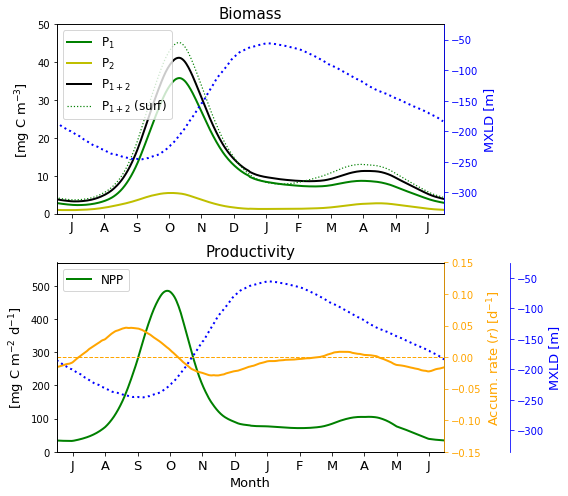

In [139]:
month = ['J','F','M','A','M','J','J','A','S','O','N','D']
colors = ['r','orange','g','b']
nys,nyn = 1e3*np.array([600,1400])

fig, (ax1,ax3) = plt.subplots(nrows=2, ncols=1, figsize=(8,7))
fig.set_tight_layout(True)
# ax2 = ax1.twinx()
ax5 = ax1.twinx()
# ax7 = ax3.twinx()
ax4 = ax3.twinx()
ax6 = ax3.twinx()
# ax7 = ax3.twinx()
ax6.spines["right"].set_position(("axes", 1.17))
# make_patch_spines_invisible(ax7)
# ax7.spines["right"].set_visible(True)

ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-50,-60)).mean(['lat','lon']).roll(months=-6), 
        label=r'50-60S (CbPM)', ls='--', color='k')
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-52,-56)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'52-56S (CbPM)', ls='--', lw=2, color=colors[1])
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-56,-60)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'56-60S (CbPM)', ls='--', lw=2, color=colors[2])
# ax2.plot(np.linspace(15,350,12), c_ker_mon.sel(lat=slice(-60,-64)).mean(['lat','lon']).roll(iMONTH=-6), 
#         label=r'60-64S (CbPM)', ls='--', lw=2, color=colors[3])

# i = 0
# for y in range(150,50,-25):
#     ax1.plot(range(360), (P1Cday+P2Cday).isel(YC=slice(y-25,y)).mean(['YC','XC']).roll(days=-180), 
#             lw=2, color=colors[i],
#             label=r'%03d-%03dkm' % ((y-25)*1e1,y*1e1))
#     ax1.plot(range(360), ((P1day+P2day)[:,0]*106.*12.).isel(YC=slice(y-25,y)).mean(['YC','XC']).roll(days=-180), 
#             lw=1, ls=':', color=colors[i])
#     i += 1
ax1.plot(range(360), P1Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        'g', lw=2, label=r'P$_1$')
ax1.plot(range(360), P2Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        'y', lw=2, label=r'P$_2$')
ax1.plot(range(360), Ptot.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        'k', lw=2, label=r'P$_{1+2}$')
ax1.plot(range(360), 
         (P1day+P2day).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180)[:,0]*106.*12., 
        'g', lw=1.2, ls=':', label=r'P$_{1+2}$ (surf)')
# ax1.plot(range(360), Z1Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'r', lw=2, label=r'Z$_1$')
# ax1.plot(range(360), Z2Cday.sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         'm', lw=2, label=r'Z$_2$')
    
# ax1.plot(range(360), (P1Cday+P2Cday+Z1Cday+Z2Cday).isel(YC=slice(50,150)).mean(['YC','XC']).roll(days=-180), 
#         lw=2, color='k', label='mean')
im5, = ax5.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
              ls=':', lw=2, color='b')

# ax2.plot(np.linspace(1,363,len(P_kersurf.DinY)), 
#         (P_kersurf.roll(DinY=-60)*1e3*12.).sel(iLAT=slice(-60,-50)).mean(['iLAT','iLON']), 
#         'k-.', label='50-60S (SOSE)')

ax1.set_xticks(np.linspace(15,345,12))
ax1.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
# ax.set_xlim([0,Ndays-1])
ax1.set_ylim([0.,50.])
ax1.set_xlim([1.,360])
ax2.set_ylim([0.,50.])
ax2.set_yticks([])
# ax1.set_xlabel(r'Month', fontsize=13)
ax5.set_ylabel('MXLD [m]', color='b', fontsize=13)
ax5.tick_params('y', colors='b')
ax5.set_ylim([-335,-25])
ax1.set_title(r"Biomass", fontsize=15)
ax1.set_ylabel(r'[mg C m$^{-3}$]', fontsize=13)
ax1.legend(loc='upper left', fontsize=12)
# ax2.legend(loc='upper right', fontsize=12)


# ax7.plot(np.linspace(15,350,12), decaf_SO.sel(lat=slice(-50,-60)).carbon.mean(['lat','lon']).roll(month=-6), 
#         label=r'50-60S (CAFE)', ls=':', lw=2, color='k')
# ax7.plot(np.linspace(15,350,12), cbpm_ker_mon.sel(lat=slice(-50,-60)).mean(['lat','lon']).roll(months=-6), 
#         label=r'50-60S (CbPM)', ls='--', color='k')
# ax7.plot(np.linspace(1,363,len(PP_kersurf.DinY)), 
#         (PP_kersurf.roll(DinY=-60)*1e3*12.*86400).sel(iLAT=slice(-60,-50)).mean(['iLAT','iLON']), 
#         'k-.', label='50-60S (SOSE)')
# ax4.plot(np.linspace(15,350,12), decaf_SO.sel(lat=slice(-52,-56)).carbon.mean(['lat','lon']).roll(month=-6), 
#         label=r'52-56S (CAFE)', ls='--', lw=2, color=colors[1])
# ax4.plot(np.linspace(15,350,12), decaf_SO.sel(lat=slice(-56,-60)).carbon.mean(['lat','lon']).roll(month=-6), 
#         label=r'56-60S (CAFE)', ls='--', lw=2, color=colors[2])
# ax4.plot(np.linspace(15,350,12), decaf_SO.sel(lat=slice(-60,-64)).carbon.mean(['lat','lon']).roll(month=-6), 
#         label=r'60-64S (CAFE)', ls='--', lw=2, color=colors[3])

# i = 0
# for y in range(150,50,-25):
#     ax3.plot(range(360), (PPintg*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#             lw=2, color=colors[i])
#     i += 1
ax3.plot(range(360), (PPintg*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
        lw=2, color='g', label=r'NPP')
im4, = ax4.plot(range(360), (rday*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
              lw=2, color='orange')
ax4.plot(range(360), np.zeros(360), ls='--',
        lw=1, color='orange')
im6, = ax6.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
              ls=':', lw=2, color='b')

ax5.spines["right"].set_edgecolor(im5.get_color())
ax4.spines["right"].set_edgecolor(im4.get_color())
ax6.spines["right"].set_edgecolor(im6.get_color())
# ax3.plot(range(360), -(lday*86400).sel(YC=slice(nys,nyn)).mean(['YC','XC']).roll(days=-180), 
#         lw=2, color='r', label=r'$l$')
ax5.tick_params(axis='y', colors=im5.get_color())
ax4.tick_params(axis='y', colors=im4.get_color())
ax6.tick_params(axis='y', colors=im6.get_color())

ax3.set_xticks(np.linspace(15,345,12))
ax3.set_xticklabels(np.roll(np.array(month),-6), fontsize=13)
# ax.set_xlim([0,Ndays-1])
ax3.set_ylim([0.,570])
# ax7.set_ylim([0.,570])
ax3.set_xlim([0.,359])
# ax4.set_ylim([-5e2,5e2])
# ax4.set_yticks([])
ax3.set_xlabel(r'Month', fontsize=13)
# ax3.legend(loc='upper right', fontsize=12)
# ax7.legend(loc='upper right', fontsize=12)
# ax7.set_yticks([])
ax4.set_ylabel('Accum. rate ($r$) [d$^{-1}$]', color='orange', fontsize=13)
ax4.tick_params('y', colors='orange')
ax4.set_ylim([-0.15,0.15])
ax6.set_ylabel('MXLD [m]', color='b', fontsize=13)
ax6.tick_params('y', colors='b')
ax6.set_ylim([-335,-25])
ax3.set_title(r"Productivity", fontsize=15)
ax3.set_ylabel(r'[mg C m$^{-2}$ d$^{-1}$]', fontsize=13)
ax3.legend(loc='upper left', fontsize=12)
# ax4.legend(loc='upper right', fontsize=12)
plt.savefig(op.join(pdir,'Figures/Biomass_CompareWoutObs_05km.pdf'))

In [140]:
Ptot.mean(['YC','XC']).sum('days').values

array(4880.81201172)

In [164]:
with ProgressBar():
    Pk = xrft.power_spectrum((P1+P2)[:,0], dim=['XC'], detrend='constant').compute()
Pk

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s


/home/takaya/xrft/xrft/xrft.py:272: FutureWarning: xarray.DataArray.__contains__ currently checks membership in DataArray.coords, but in xarray v0.11 will change to check membership in array values.
  elif d in da:


[########################################] | 100% Completed | 18min 45.6s


<xarray.DataArray 'rechunk-merge-bf19041fe8f0dffc238dbb7f72313aa1' (time: 2880, YC: 400, freq_XC: 200)>
array([[[0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [1.064087e-03, 1.127113e-02, ..., 1.436970e-02, 1.127113e-02],
        ...,
        [7.175154e-08, 5.072869e-08, ..., 8.083806e-08, 5.072869e-08],
        [1.260117e-11, 3.204792e-10, ..., 1.653858e-10, 3.204792e-10]],

       [[0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [1.208002e-03, 2.437720e-02, ..., 2.057309e-02, 2.437720e-02],
        ...,
        [1.777752e-08, 1.538573e-08, ..., 1.026699e-07, 1.538573e-08],
        [7.163399e-09, 1.322208e-08, ..., 6.666881e-09, 1.322208e-08]],

       ...,

       [[0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [2.324692e-02, 3.387001e-02, ..., 6.957381e-02, 3.387001e-02],
        ...,
        [1.479316e-07, 7.573741e-08, ..., 9.987572e-09, 7.573741e-08],
        [3.099984e-10, 1.502451e-09, ..., 2.305467e-10, 1.5

In [165]:
Pk.coords['seas'] = ('time',np.tile(np.repeat(range(4),90),dy))
with ProgressBar():
    Pk_seas = Pk.sel(YC=slice(6e5,14e5)).groupby('seas').mean(['time','YC']).compute()
Pk_seas

<xarray.DataArray 'rechunk-merge-bf19041fe8f0dffc238dbb7f72313aa1' (seas: 4, freq_XC: 200)>
array([[2.939913e-07, 2.894309e-07, 2.931618e-07, ..., 2.969983e-07,
        2.931618e-07, 2.894309e-07],
       [3.295178e-07, 3.320025e-07, 3.282937e-07, ..., 3.371609e-07,
        3.282937e-07, 3.320025e-07],
       [5.221196e-06, 5.219976e-06, 5.285022e-06, ..., 5.361496e-06,
        5.285022e-06, 5.219976e-06],
       [3.839027e-06, 3.829936e-06, 3.885358e-06, ..., 3.930679e-06,
        3.885358e-06, 3.829936e-06]])
Coordinates:
  * freq_XC          (freq_XC) float64 -0.0001 -9.9e-05 -9.8e-05 -9.7e-05 ...
    freq_XC_spacing  float64 1e-06
  * seas             (seas) int64 0 1 2 3

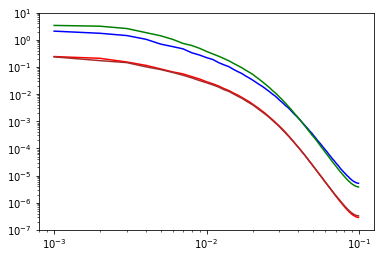

In [169]:
fig, ax = plt.subplots()
ax.plot(Pk_seas.freq_XC[101:]*1e3, Pk_seas[0,101:], 'r')
ax.plot(Pk_seas.freq_XC[101:]*1e3, Pk_seas[1,101:], 'brown')
ax.plot(Pk_seas.freq_XC[101:]*1e3, Pk_seas[2,101:], 'b')
ax.plot(Pk_seas.freq_XC[101:]*1e3, Pk_seas[3,101:], 'g')
ax.set_ylim([1e-7,1e1])
ax.set_xscale('log')
ax.set_yscale('log')

# Eddy iron fluxes

In [27]:
diff = ds.DFrITr03
with ProgressBar():
    diff_mn = (diff*ds.rA**-1*(360*86400)*1e3).mean(['time','XC']).compute()
diff_mn

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  8min 17.0s


<xarray.DataArray (Zl: 76, YC: 400)>
array([[ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       [ 0.000000e+00,  3.594931e+00,  3.959533e+00, ..., -2.580548e-05,
         1.880293e-06, -4.707909e-07],
       [ 0.000000e+00,  7.720799e+00,  8.493536e+00, ...,  1.494757e-04,
         2.709226e-05, -3.726798e-07],
       ...,
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       [ 0.000000e+00,  7.112975e-19,  1.218178e-16, ...,  0.000000e+00,
         0.000000e+00,  0.000000e+00]])
Coordinates:
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * Zl       (Zl) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...

In [40]:
# with ProgressBar():
#     ds_clim = ds.mean(['time','XC','XG']).load()
#     ds1_clim = ds1.mean(['time','XC','XG']).load()

In [41]:
with ProgressBar():
    T_clim = ds.THETA.mean(['time','XC']).load()
    vb = ds.VVEL.mean(['time','XC']).load()
    wb = ds.WVEL.mean(['time','XC']).load()
    Feb = ds.TRAC03[:].mean(['time','XC']).load()
    vFeb = ds.VTRAC03[:].mean(['time','XC']).load()
    wFeb = ds.WTRAC03[:].mean(['time','XC']).load()
    FadvV = ds.ADVyTr03[:].mean(['time','XC']).load()
    FadvW = ds.ADVrTr03[:].mean(['time','XC']).load()
    kppb = ds.KPPgTr03[:].mean(['time','XC']).load()
    dfib = ds.DFrITr03[:].mean(['time','XC']).load()
    bgcb = ds.FeTbgc[:].mean(['time','XC']).load()

[########################################] | 100% Completed |  1min 52.5s
[########################################] | 100% Completed | 15min 13.6s
[########################################] | 100% Completed | 23min 22.3s
[########################################] | 100% Completed |  4min 10.9s
[########################################] | 100% Completed | 17min  4.1s
[########################################] | 100% Completed | 23min 59.3s
[########################################] | 100% Completed | 24min 33.0s
[########################################] | 100% Completed | 23min 50.5s
[########################################] | 100% Completed | 19min 56.8s
[########################################] | 100% Completed | 19min 30.5s
[########################################] | 100% Completed | 16min 47.5s


In [42]:
vbFeb = grid.interp(vb,'Y',boundary='fill')*Feb
wbFeb = grid.interp(wb,'Z',boundary='fill')*Feb
vpFep_b = grid.interp(vFeb,'Y',boundary='fill') - vbFeb
wpFep_b = wFeb - wbFeb

print(vpFep_b, wpFep_b)

<xarray.DataArray (Z: 76, YC: 400)>
array([[ 0.000000e+00,  6.925483e-08,  1.391723e-07, ..., -7.192949e-08,
        -3.113576e-08, -3.934717e-09],
       [ 0.000000e+00,  6.706054e-08,  1.359050e-07, ..., -6.891339e-08,
        -3.000892e-08, -3.967481e-09],
       [ 0.000000e+00,  6.506914e-08,  1.329375e-07, ..., -6.482641e-08,
        -2.889035e-08, -4.310001e-09],
       ...,
       [ 0.000000e+00,  2.240300e-11,  8.027101e-11, ...,  9.235587e-10,
         2.128626e-10,  1.846261e-11],
       [ 0.000000e+00,  5.303406e-11,  2.218947e-10, ...,  1.083888e-09,
         2.363005e-10,  1.564954e-11],
       [ 0.000000e+00, -6.580403e-11,  5.420464e-11, ...,  6.625047e-10,
         4.044409e-11,  5.903181e-12]], dtype=float32)
Coordinates:
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
    drF      (Z) >f4 1.0 1.14 1.3 1.49 1.7 1.93 2.2 2.5 2.84 3.21 3.63 4.1 ...
    PHrefC   (Z) 

In [43]:
fe_intrp = grid.interp(Feb, 'Y', boundary='fill')
temp = (vb * fe_intrp).compute()
temp = vFeb - temp
advpfep_bar = grid.diff(temp*ds.dxG.mean('XC'),'Y',
                        boundary='fill') * ds.rA.mean('XC')**-1

fe_intrp = grid.interp(Feb, 'Z', boundary='fill')
temp = (wb * fe_intrp).compute()
temp = grid.interp(wFeb,'Z',boundary='fill') - temp
adwpfep_bar = grid.diff(temp,'Z',boundary='fill') * ds.drF**-1

advpp_b = -(-adwpfep_bar + advpfep_bar)
advpp_b

<xarray.DataArray (Z: 76, YC: 400)>
dask.array<shape=(76, 400), dtype=float32, chunksize=(76, 399)>
Coordinates:
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
    drF      (Z) >f4 1.0 1.14 1.3 1.49 1.7 1.93 2.2 2.5 2.84 3.21 3.63 4.1 ...
    PHrefC   (Z) >f4 4.905 15.4017 27.3699 41.05485 56.7018 74.50695 94.7646 ...

In [44]:
MLDb = xr.open_dataset(op.join(pdir,'KPPMLD_05km.nc')).mld.mean(['time','XC'])
MXLDb = xr.open_dataset(op.join(pdir,'KPPhbl_99percentile_05km.nc')).hbl99.mean(['time'])

In [45]:
Fe = ds.TRAC03
with ProgressBar():
    dFedz = (grid.diff(Fe.mean('XC'),'Z',boundary='fill')/grid.diff(Fe.Z,'Z',boundary='fill')).compute()

[########################################] | 100% Completed | 11min  5.9s


In [46]:
with ProgressBar():
    dFe = (grid.diff(Fe.mean('XC'),'Z',boundary='fill')).mean('time').compute()
# nFez_clim = np.argmax(-dFedz[:,:],axis=1)

[########################################] | 100% Completed | 51.8s


In [47]:
nFez_clim = np.argmax(-dFedz.mean('time')[1:], axis=0)
# nFez_clim+9

N = nFez_clim.shape
zFe_clim = np.zeros(nFez_clim.shape)
dFe_at_zFe = np.zeros(nFez_clim.shape)
for i in range(N[0]):
    zFe_clim[i] = ds.Zl[int(nFez_clim[i]+1)]
    dFe_at_zFe[i] = dFe[:,i][int(nFez_clim[i]+1)]
#     print(dFe[:,i][int(nFez_clim[i]+1)].values)
#     for j in range(N[1]):
#         zFe_clim[i,j] = ds.Zl[int(nFez_clim[i,j])]
        
zFe_clim = xr.DataArray(zFe_clim, dims=nFez_clim.dims, coords=nFez_clim.coords)
dFe_at_zFe = xr.DataArray(dFe_at_zFe, dims=nFez_clim.dims, coords=nFez_clim.coords)
print(dFe_at_zFe, zFe_clim)

<xarray.DataArray (YC: 400)>
array([0.000000e+00, 2.221400e-05, 3.441313e-06, ..., 1.852701e-05,
       1.861934e-05, 1.910226e-05])
Coordinates:
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ... <xarray.DataArray (YC: 400)>
array([-1.00000e+00, -1.51151e+03, -7.31000e+01, ..., -4.90900e+01,
       -4.90900e+01, -4.90900e+01])
Coordinates:
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...


In [48]:
diff_z = grid.diff(diff, 'Z', boundary='fill')/(ds.rA*ds.drF)
with ProgressBar():
    dff_z_clim = diff_z[:].mean(['time','XC']).compute()

[########################################] | 100% Completed |  5min 45.5s


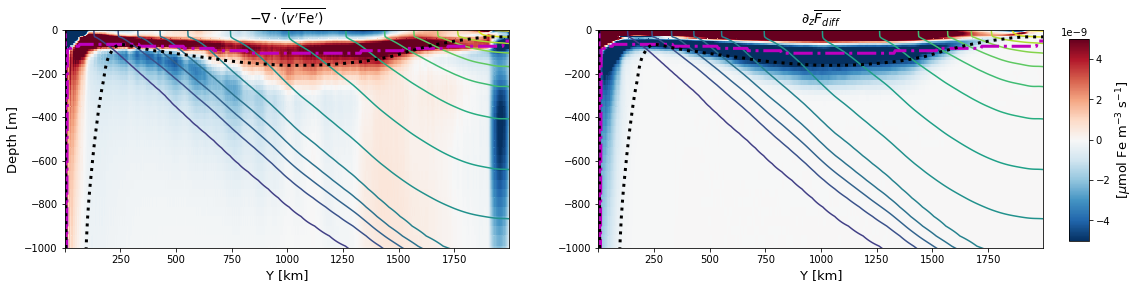

In [49]:
Tlevs = np.arange(-1.,8.5,.5) + 0.
yst = 10
dny = 20
dnz = 3
yy, zz = np.meshgrid(ds.YC.data[yst::dny], ds.Z.data[::dnz])
N = wpFep_b.data[::dnz,yst::dny].shape
T_clim = xr.open_dataset(op.join(pdir,'Climatological-theta_05km.nc')).THETA_clim

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,4))
# fig.set_tight_layout(True)
im = ax1.pcolormesh(T_clim.YC, T_clim.Z, advpp_b*1e3, 
                   vmin=-5e-9, vmax=5e-9, cmap='RdBu_r',
                   rasterized=True)
# ax1.plot(MLDb.YC, -MLDb, 'k', lw=2)
# ax.plot(zFe_clim.YC, zFe_clim.mean('time'), 'k-.', lw=2)
ax1.plot(zFe_clim.YC, zFe_clim, ls='-.', color='m', lw=3)
ax1.plot(MXLDb.YC, -MXLDb, ls=':', color='k', lw=3)
ax1.contour(T_clim.YC, T_clim.Z, T_clim, levels=Tlevs)
#            , cmap='RdBu_r')
# ax1.quiver(yy, zz, (vpFep_b/Feb)[::dnz,yst::dny], 
#           np.ones((N[0],N[1]))*(wpFep_b/Feb)[::dnz,yst::dny], 
#           pivot='mid', angles='xy')
#           , scale_units='xy', scale=1.)
ax1.set_xticks(np.arange(0.,2e6,2.5e5))
ax1.set_xticklabels(['','250','500','750','1000','1250','1500','1750'])
ax1.set_xlabel('Y [km]', fontsize=13)
ax1.set_ylabel('Depth [m]', fontsize=13)
ax1.set_ylim([-1000,0.])
ax1.set_title(r"$-\nabla\cdot\overline{(v'{\tt Fe'})}$", fontsize=14)

ax2.pcolormesh(T_clim.YC, T_clim.Z, dff_z_clim*1e3, 
              vmin=-5e-9, vmax=5e-9, cmap='RdBu_r',
              rasterized=True)
# ax2.plot(MLDb.YC, -MLDb, 'k', lw=2)
# ax.plot(zFe_clim.YC, zFe_clim.mean('time'), 'k-.', lw=2)
ax2.plot(zFe_clim.YC, zFe_clim, ls='-.', color='m', lw=3)
ax2.plot(MXLDb.YC, -MXLDb, ls=':', color='k', lw=3)
ax2.contour(T_clim.YC, T_clim.Z, T_clim, levels=Tlevs)
ax2.set_xticks(np.arange(0.,2e6,2.5e5))
ax2.set_xticklabels(['','250','500','750','1000','1250','1500','1750'])
ax2.set_xlabel('Y [km]', fontsize=13)
# ax2.set_ylabel('Depth [m]', fontsize=13)
ax2.set_ylim([-1000,0.])
ax2.set_title(r"$\partial_z \overline{F_{diff}}$", fontsize=14)

fig.subplots_adjust(right=0.88)
cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label(r"[$\mu$mol Fe m$^{-3}$ s$^{-1}$]", fontsize=13)
plt.savefig(op.join(pdir,'Figures/eddyfluxvector_05km-top1000m.pdf'))

# Iron budget

In [46]:
month = np.tile(np.repeat(range(12),30),dy)
ds['month'] = ('time', month)
ds_mon = ds.groupby('month').mean(['time','XC','XG'])
ds_anom = ds.groupby('month') - ds_mon

In [21]:
with ProgressBar():
    Fem = ds_mon.TRAC03.load()
    vFem = ds_mon.VTRAC03.load()
    wFem = ds_mon.WTRAC03.load()
    advVm = ds_mon.ADVyTr03.load()
    advWm = ds_mon.ADVrTr03.load()
#     kppm = ds_mon.KPPgTr03.load()
    dfim = ds_mon.DFrITr03.load()
    bgcm = ds_mon.FeTbgc.load()

[########################################] | 100% Completed | 12min  9.7s
[########################################] | 100% Completed | 21min 30.0s
[########################################] | 100% Completed | 21min 27.5s
[########################################] | 100% Completed | 21min 40.7s
[########################################] | 100% Completed | 20min  3.8s
[########################################] | 100% Completed | 19min 56.4s
[########################################] | 100% Completed | 17min 31.4s


In [22]:
advzm = grid.diff(advWm, 'Z', boundary='fill')/(ds.rA*ds.drF).mean('XC')
advym = grid.diff(advVm, 'Y', boundary='fill')/(ds.rA*ds.drF).mean('XC')
advm = -(-advzm + advym).compute()

difz = grid.diff(dfim, 'Z', boundary='fill')/(ds.rA*ds.drF).mean('XC').compute()
# kpp = grid.diff(kppm, 'Z', boundary='fill')/(ds.rA*ds.drF).mean('XC').compute()
ss = bgcm

advm

<xarray.DataArray (month: 12, Z: 76, YC: 400)>
array([[[-0.000000e+00, -4.664326e-11, ..., -1.034994e-11, -8.891685e-12],
        [-0.000000e+00, -5.154957e-11, ..., -7.085212e-12, -5.453147e-12],
        ...,
        [-0.000000e+00, -1.976309e-15, ...,  1.052775e-13,  1.033583e-15],
        [-0.000000e+00, -1.754749e-13, ...,  1.666670e-13,  3.810567e-14]],

       [[-0.000000e+00, -6.317102e-11, ..., -5.655892e-12, -2.176179e-12],
        [-0.000000e+00, -5.668514e-11, ..., -8.880078e-12, -5.576673e-12],
        ...,
        [-0.000000e+00, -3.213101e-15, ...,  1.053219e-13,  1.665362e-15],
        [-0.000000e+00, -1.710222e-13, ...,  1.730562e-13,  4.369239e-14]],

       ...,

       [[-0.000000e+00, -3.511742e-11, ..., -1.523371e-11, -1.254249e-11],
        [-0.000000e+00, -4.252042e-11, ..., -1.140494e-11, -8.543020e-12],
        ...,
        [-0.000000e+00, -5.046115e-15, ...,  2.433714e-14, -2.239722e-14],
        [-0.000000e+00, -1.961859e-13, ...,  9.112459e-14,  2.223875e-14

In [23]:
dsS = open_mdsdataset(op.join(bdir,'05km_mp113-15_mu15-114_Kp01-018_Ki59-105_Kn015-035_g28-168_mz40_rFe1'), 
                      grid_dir=op.join(pdir,'5km_grid'),
                      iters=range(ts,te,8640),
                      prefix=['FeTsnap_30d'], 
                      delta_t=dt
                     )
dsS

/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:  (XC: 200, XG: 200, YC: 400, YG: 400, Z: 76, Zl: 76, Zp1: 77, Zu: 76, time: 120)
Coordinates:
  * XC       (XC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * XG       (XG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 30000.0 ...
  * YG       (YG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 30000.0 ...
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * Zp1      (Zp1) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
  * Zu       (Zu) >f4 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 -16.1 ...
  * Zl       (Zl) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
    rA       (YC, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    dxG      (YG, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    dyG      (YC, XG) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    Depth    (YC,

In [24]:
fe_xbar = dsS.TRAC03.mean('XC')
print(dsS.TRAC03.attrs)
tempo = (-fe_xbar+fe_xbar.roll(time=-1).data) / (3e1*864e2)
# tempo = fe_xbar.diff('time') / (3e1*864e2)
tempo.coords['month'] = ('time',np.tile(range(12),dy))

# febar_vol = grid.cumsum(febar * ds.hFacC.mean(['XC'])*ds.rA.mean(['XC'])*ds.drF,
#                         'Z', to='outer', boundary='fill'
#                        )[:,:,nys:nyn].sum(['YC'])
# dfebardt = (-febar_vol + febar_vol.roll(month=-1).data).compute() / (3e1*24.*36e2)

dFe = tempo.groupby('month').mean(['time']).compute()
dFe.attrs['unit'] = 'mmol Fe m-3 s-1'

dFe

OrderedDict([('standard_name', 'TRAC03'), ('long_name', 'FeT concentration'), ('units', 'mM/m^3')])


<xarray.DataArray (month: 12, Z: 76, YC: 400)>
array([[[ 0.000000e+00, -1.178016e-12, ..., -3.740098e-12, -5.157043e-12],
        [ 0.000000e+00, -1.177007e-12, ..., -3.689137e-12, -5.080020e-12],
        ...,
        [ 0.000000e+00,  7.747573e-17, ...,  2.799963e-13,  2.600807e-13],
        [ 0.000000e+00,  4.983806e-14, ...,  2.278801e-13,  2.064834e-13]],

       [[ 0.000000e+00,  1.546972e-13, ..., -5.608090e-12, -4.281085e-12],
        [ 0.000000e+00,  1.567077e-13, ..., -6.423799e-12, -4.933162e-12],
        ...,
        [ 0.000000e+00, -5.755642e-15, ...,  1.267892e-13,  1.152532e-13],
        [ 0.000000e+00,  5.487285e-15, ...,  1.013435e-13,  8.845342e-14]],

       ...,

       [[ 0.000000e+00, -8.601017e-12, ...,  3.202124e-12,  8.375250e-13],
        [ 0.000000e+00, -8.596963e-12, ...,  4.269913e-12,  2.042350e-12],
        ...,
        [ 0.000000e+00,  1.770708e-14, ..., -6.926419e-14, -5.473474e-14],
        [ 0.000000e+00,  1.016018e-13, ..., -6.311893e-14, -4.543319e-14

In [25]:
res = (dFe - (advm + difz + ss)).compute()
res

<xarray.DataArray (month: 12, Z: 76, YC: 400)>
array([[[ 0.000000e+00, -5.441439e-12, ..., -2.899762e-12, -5.861990e-12],
        [ 0.000000e+00, -5.312591e-17, ..., -6.035894e-12, -9.240471e-12],
        ...,
        [ 0.000000e+00,  1.709273e-18, ...,  1.598221e-13,  2.405808e-13],
        [ 0.000000e+00, -1.648280e-14, ..., -1.172221e-13, -3.664611e-14]],

       [[ 0.000000e+00,  5.839362e-12, ..., -6.972902e-12, -9.435662e-12],
        [ 0.000000e+00, -6.270754e-17, ..., -3.611101e-12, -6.043093e-12],
        ...,
        [ 0.000000e+00, -3.698569e-18, ...,  8.860832e-15,  9.727717e-14],
        [ 0.000000e+00, -1.606796e-14, ..., -2.382708e-13, -1.474824e-13]],

       ...,

       [[ 0.000000e+00, -7.867285e-12, ...,  5.864263e-12, -1.436745e-13],
        [ 0.000000e+00, -4.770490e-17, ...,  3.371023e-12, -2.885270e-12],
        ...,
        [ 0.000000e+00,  2.392021e-18, ..., -1.152562e-13, -5.749643e-14],
        [ 0.000000e+00, -1.842912e-14, ..., -3.479077e-13, -2.864810e-13

In [27]:
nys,nyn = (600,1400)
adv_mean = advm.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
advz_mean = advzm.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
advy_mean = advym.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
dif_mean = difz.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
# kpp_mean = kpp.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
dot_mean = ss.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
dFe_mean = dFe.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
res_mean = res.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()

7
8
9
10
11
0


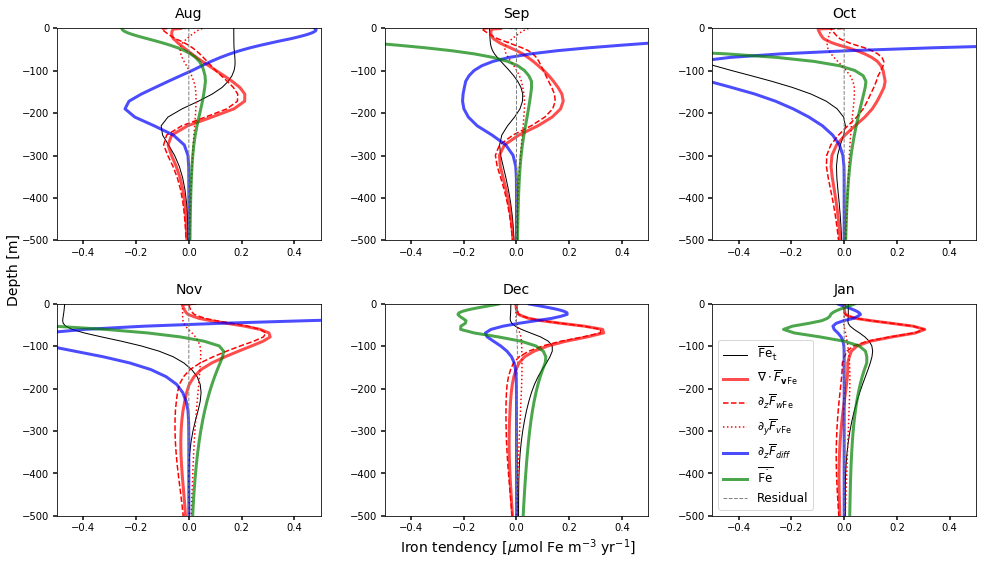

In [28]:
colors = ['pink','r','m','orange','brown','k','purple','indigo','b','c','g','y']
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(14,8))
for j in range(2):
    for i in range(3):
        nn = j*3+i+7
        if nn > 11:
            nn -= 12
        print(nn)
        axes[j,i].plot(dFe_mean[nn]*1e3*(360*86400), dFe_mean.Z, 'k',
                       lw=1, alpha=1., label=r'$\overline{\tt Fe}_t$')
        axes[j,i].plot(adv_mean[nn]*1e3*(360*86400), adv_mean.Z, 'r',
                       lw=3, alpha=0.7, label=r'$\nabla\cdot\overline{F}_{\mathbf{v} {\tt Fe}}$')
        axes[j,i].plot(advz_mean[nn]*1e3*(360*86400), adv_mean.Z, 'r',
                       ls='--', label=r'$\partial_z \overline{F}_{w {\tt Fe}}$')
        axes[j,i].plot(-advy_mean[nn]*1e3*(360*86400), adv_mean.Z, 'r',
                       ls=':', label=r'$\partial_y \overline{F}_{v {\tt Fe}}$')
        axes[j,i].plot(dif_mean[nn]*1e3*(360*86400), dif_mean.Z, 'b',
                       lw=3, alpha=.7, label=r"$\partial_z \overline{F}_{diff}$")
#         axes[j,i].plot(kpp_mean[nn]*1e3*(360*86400), kpp_mean.Z, 'orange',
#                        lw=1, label=r"$\partial_z \overline{F}_{KPP}$")
        axes[j,i].plot(dot_mean[nn]*1e3*(360*86400), dot_mean.Z, 'g',
                       lw=3, alpha=.7, label=r"$\overline{\dot{\tt Fe}}$")
        axes[j,i].plot(res_mean[nn]*1e3*(360*86400), res_mean.Z, '--', color='grey',
                       lw=1, alpha=1., label=r"Residual")
#         ax2 = axes[j,i].twiny()
#         p2, = ax2.plot((np.absolute(wpfep_bar_II*Lx+diffe_II*nx)/
#                        np.absolute(vbarfebar_I-vbarfebar_III+wbarfebar_II
#                                    +vpfep_bar_I-vpfep_bar_III)*Lx)[j*3+i,:nz],
#                        diffe_II.Z[:nz], 'grey', lw=3, alpha=0.6
#                       )
# #         ax2.set_xlim([.1,1e1])
#         ax2.set_xscale('log')
#         ax2.xaxis.label.set_color(p2.get_color())

        tkw = dict(size=4, width=1.5)
#         ax2.tick_params(axis='x', colors=p2.get_color(), **tkw)
        axes[j,i].tick_params(axis='both', **tkw)
        
        axes[j,i].set_title(months[nn],fontsize=14,y=1.02)
        axes[j,i].set_xlim([-5e-1,5e-1])
        axes[j,i].set_ylim([-5e2,0.])
#         axes[j,i].grid(True)
axes[1,2].legend(loc='lower left', fontsize=12)
fig.subplots_adjust(left=0.12)
# cbar_ax = fig.add_axes([0.84, 0.2, 0.03, 0.6])
# cbar = fig.colorbar(cax, cax=cbar_ax)
# cbar.set_label(r'[mM N/m$^3$]',fontsize=12)

fig.text(0.01, 0.5, 'Depth [m]', 
         va='center', rotation='vertical', fontsize=14)
fig.text(0.4, 0.018, 'Iron tendency [$\mu$mol Fe m$^{-3}$ yr$^{-1}$]', 
         va='center', rotation='horizontal', fontsize=14)

plt.tight_layout(pad=2.5)
# plt.grid(True)
plt.savefig(op.join(pdir,'Figures/IronBudget_monthlyclim-Aug-Jan_05km.pdf'))

In [29]:
with ProgressBar():
    vm = ds_mon.VVEL.load()
    wm = ds_mon.WVEL.load()
fe_intrp = grid.interp(Fem, 'Y', boundary='fill')
vmfem = (vm * fe_intrp).compute()
fe_intrp = grid.interp(Fem, 'Z', boundary='fill')
wmfem = (wm * fe_intrp).compute()

[########################################] | 100% Completed | 14min 34.2s
[########################################] | 100% Completed | 23min 49.9s


In [30]:
dwfe = advWm/ds.rA.mean('XC') - grid.interp(wFem,'Z',boundary='fill')
dvfe = advVm/(ds.drF*ds.dxG).mean('XC') - vFem

dwfe_m = grid.diff(dwfe,'Z',boundary='fill') * ds.drF**-1
dvfe_m = grid.diff(dvfe*ds.dxG.mean('XC'),
                    'Y',boundary='fill') * ds.rA.mean(['XC'])**-1
print(dwfe_m, dvfe_m)
dadv = -(-dwfe_m + dvfe_m)
dadv

<xarray.DataArray (month: 12, Z: 76, YC: 400)>
dask.array<shape=(12, 76, 400), dtype=float32, chunksize=(12, 75, 400)>
Coordinates:
  * month    (month) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
    drF      (Z) >f4 dask.array<shape=(76,), chunksize=(76,)>
    PHrefC   (Z) >f4 dask.array<shape=(76,), chunksize=(76,)> <xarray.DataArray (month: 12, Z: 76, YC: 400)>
dask.array<shape=(12, 76, 400), dtype=float32, chunksize=(12, 76, 399)>
Coordinates:
  * month    (month) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...


<xarray.DataArray (month: 12, Z: 76, YC: 400)>
dask.array<shape=(12, 76, 400), dtype=float32, chunksize=(12, 75, 399)>
Coordinates:
  * month    (month) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
    drF      (Z) >f4 dask.array<shape=(76,), chunksize=(76,)>
    PHrefC   (Z) >f4 dask.array<shape=(76,), chunksize=(76,)>

In [31]:
advmfem = grid.diff(vmfem*ds.dxG.mean('XC'),
                   'Y',boundary='fill') * ds.rA.mean(['XC'])**-1
adwmfem = grid.diff(wmfem,'Z',boundary='fill') * ds.drF**-1

print(advmfem, adwmfem)

<xarray.DataArray (month: 12, Z: 76, YC: 400)>
dask.array<shape=(12, 76, 400), dtype=float32, chunksize=(12, 76, 399)>
Coordinates:
  * month    (month) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ... <xarray.DataArray (month: 12, Z: 76, YC: 400)>
dask.array<shape=(12, 76, 400), dtype=float32, chunksize=(12, 76, 400)>
Coordinates:
  * month    (month) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
    drF      (Z) >f4 dask.array<shape=(76,), chunksize=(76,)>
    PHrefC   (Z) >f4 dask.array<shape=(76,), chunksize=(76,)>


In [32]:
vpfep_m = vFem - vmfem
advpfep_m = grid.diff(vpfep_m*ds.dxG.mean('XC'),
                     'Y',boundary='fill') * ds.rA.mean('XC')**-1
wpfep_m = grid.interp(wFem,'Z',boundary='fill') - wmfem
adwpfep_m = grid.diff(wpfep_m,'Z',boundary='fill') * ds.drF**-1

print(advpfep_m, adwpfep_m)

<xarray.DataArray (month: 12, Z: 76, YC: 400)>
dask.array<shape=(12, 76, 400), dtype=float32, chunksize=(12, 76, 399)>
Coordinates:
  * month    (month) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ... <xarray.DataArray (month: 12, Z: 76, YC: 400)>
dask.array<shape=(12, 76, 400), dtype=float32, chunksize=(12, 76, 400)>
Coordinates:
  * month    (month) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
    drF      (Z) >f4 dask.array<shape=(76,), chunksize=(76,)>
    PHrefC   (Z) >f4 dask.array<shape=(76,), chunksize=(76,)>


In [33]:
advmm = -(-adwmfem + advmfem)
advpp_m = -(-adwpfep_m + advpfep_m)

In [34]:
res = dFe - ((advmm+advpp_m) + difz + ss + dadv)
res

<xarray.DataArray (month: 12, Z: 76, YC: 400)>
dask.array<shape=(12, 76, 400), dtype=float32, chunksize=(12, 75, 399)>
Coordinates:
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
    drF      (Z) >f4 1.0 1.14 1.3 1.49 1.7 1.93 2.2 2.5 2.84 3.21 3.63 4.1 ...
    PHrefC   (Z) >f4 4.905 15.4017 27.3699 41.05485 56.7018 74.50695 94.7646 ...
  * month    (month) int64 0 1 2 3 4 5 6 7 8 9 10 11

In [36]:
nys,nyn = (600,1400)
with ProgressBar():
    advbb_mean = advmm.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    advpp_mean = advpp_m.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    advpp_meanz = adwpfep_m.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    advpp_meany = -advpfep_m.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    dadv_mean = dadv.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    dFe_mean = dFe.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    dif_mean = difz.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
#     kpp_mean = kpp.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    dot_mean = ss.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()
    res_mean = res.sel(YC=slice(nys*1e3, nyn*1e3)).mean('YC').compute()

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s


7
8
9
10
11
0


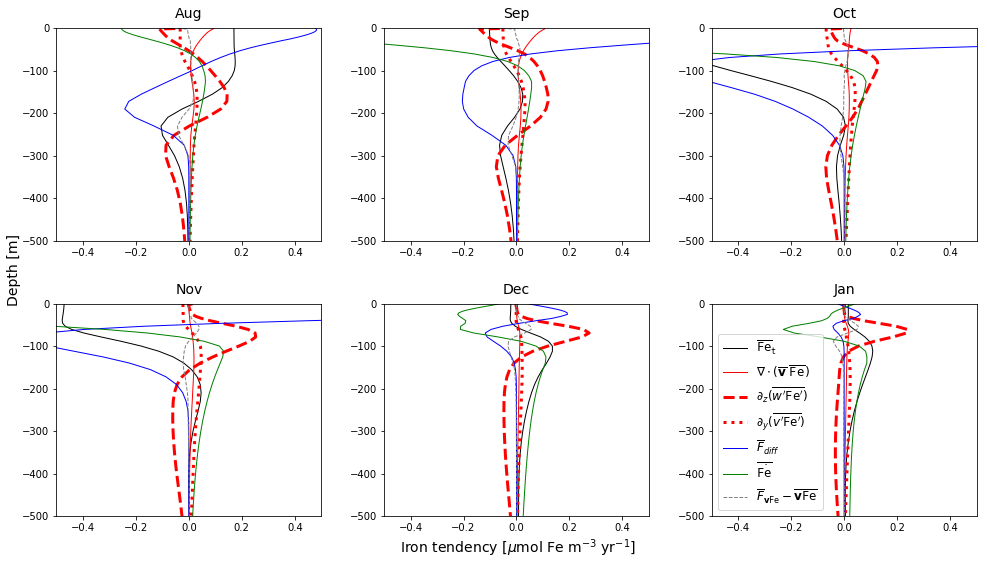

In [38]:
colors = ['pink','r','m','orange','brown','k','purple','indigo','b','c','g','y']
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

tkw = dict(size=4, width=1.5)
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(14,8))
for j in range(2):
    for i in range(3):
        nn = j*3+i+7
        if nn > 11:
            nn -= 12
        print(nn)
        axes[j,i].plot(dFe_mean[nn]*1e3*(360*86400), dFe_mean.Z, 'k',
                      lw=1, label=r'$\overline{\tt Fe}_t$')
        axes[j,i].plot(advbb_mean[nn]*1e3*(360*86400), advbb_mean.Z, 'r',
                      lw=1, label=r'$\nabla\cdot (\overline{\mathbf{v}}$ $\overline{\tt Fe})$')
        axes[j,i].plot(advpp_meanz[nn]*1e3*(360*86400), advpp_mean.Z, 'r--',
                      lw=3, label=r"$\partial_z (\overline{w' {\tt Fe}'})$")
        axes[j,i].plot(advpp_meany[nn]*1e3*(360*86400), advpp_mean.Z, 'r:',
                      lw=3, label=r"$\partial_y (\overline{v' {\tt Fe}'})$")
        axes[j,i].plot(dif_mean[nn]*1e3*(360*86400), dif_mean.Z, 'b',
                      lw=1, label=r"$\overline{F}_{diff}$")
#             axes[1,i].plot(kpp_mean[nn]*1e3, kpp_mean.Z, 'c',
#                            lw=1, label=r"$\overline{F}_{KPP}$")
        axes[j,i].plot(dot_mean[nn]*1e3*(360*86400), dot_mean.Z, 'g',
                      lw=1, label=r"$\overline{\dot{\tt Fe}}$")
        axes[j,i].plot(dadv_mean[nn]*1e3*(360*86400), dadv_mean.Z, '--', color='grey',
                      lw=1, label=r"$\overline{F}_{\mathbf{v}{\tt Fe}} - \overline{\mathbf{v}{\tt Fe}}$")
#         axes[i].plot(res_mean[nn]*1e3, res_mean.Z, '--', color='grey',
#                       lw=1, label=r"Residual")
        axes[j,i].tick_params(axis='both')
        axes[j,i].set_title(months[nn],fontsize=14,y=1.02)
        axes[j,i].set_xlim([-5e-1, 5e-1])
        axes[j,i].set_ylim([-5e2, 0])
#         axes[j,i].grid(True)
        
axes[1,2].legend(loc='lower left', fontsize=12)
fig.subplots_adjust(left=0.12)
# cbar_ax = fig.add_axes([0.84, 0.2, 0.03, 0.6])
# cbar = fig.colorbar(cax, cax=cbar_ax)
# cbar.set_label(r'[mM N/m$^3$]',fontsize=12)

fig.text(0.01, 0.5, 'Depth [m]', 
         va='center', rotation='vertical', fontsize=14)
fig.text(0.4, 0.018, 'Iron tendency [$\mu$mol Fe m$^{-3}$ yr$^{-1}$]', 
         va='center', rotation='horizontal', fontsize=14)

plt.tight_layout(pad=2.5)
# plt.grid(True)
plt.savefig(op.join(pdir,'Figures/IronBudget_monthlyclim-Aug-Jan_05km_wPPterms.pdf'))

# Gammas

In [81]:
u1max = 1/.67  # [1/d]
u2max = 1/.92 # [1/d]
Kp1 = 0.0175
Kp2 = 0.011
Ki1 = .95e-3
Ki2 = 6.1e-3
Kn1 = 0.035
Kn2 = 0.015
r_FeP = 1e-3
r_SiP = 16
r_NP = 16
kSi1 = Kn1 * r_SiP
kN1 = Kn1 * r_NP
kN2 = Kn2 * r_NP
kFe1 = Kn1 * r_FeP
kFe2 = Kn2 * r_FeP

In [87]:
dtype = '>f8'
shape = (12,400,200)
# par_north = 3e1+2e1*np.cos(np.pi/6*np.arange(1,13))
# par_ideal = par_north[:,np.newaxis] + np.linspace(-10,0,num=100)[np.newaxis,:]
PAR = np.fromfile(op.join(bdir,'PAR_noncos_linear_005km.bin'), 
                 dtype=dtype)
PAR.shape = shape
PAR = xr.DataArray(PAR, dims=['month','YC','XC'],
                  coords={'month':range(1,13),'YC':ds.YC.data,'XC':ds.XC.data}
                  )
I = PAR*1e6/86400
Fo_s = Kp2/(Kp2+Ki2)*np.exp(Ki2/Kp2
                           * np.log(Ki2/(Kp2+Ki2))
                           )
gammaI2 = Fo_s**-1 * (1.-np.exp(-Kp2*I)) * np.exp(-Ki2*I)
Fo_b = Kp1/(Kp1+Ki1)*np.exp(Ki1/Kp1
                           * np.log(Ki1/(Kp1+Ki1))
                           )
gammaI1 = Fo_b**-1 * (1.-np.exp(-Kp1*I)) * np.exp(-Ki1*I)
gammaI1

<xarray.DataArray (month: 12, YC: 400, XC: 200)>
array([[[0.838159, 0.838159, ..., 0.838159, 0.838159],
        [0.837954, 0.837954, ..., 0.837954, 0.837954],
        ...,
        [0.759862, 0.759862, ..., 0.759862, 0.759862],
        [0.759674, 0.759674, ..., 0.759674, 0.759674]],

       [[0.916564, 0.916564, ..., 0.916564, 0.916564],
        [0.916355, 0.916355, ..., 0.916355, 0.916355],
        ...,
        [0.833363, 0.833363, ..., 0.833363, 0.833363],
        [0.833159, 0.833159, ..., 0.833159, 0.833159]],

       ...,

       [[0.861882, 0.861882, ..., 0.861882, 0.861882],
        [0.861673, 0.861673, ..., 0.861673, 0.861673],
        ...,
        [0.781713, 0.781713, ..., 0.781713, 0.781713],
        [0.78152 , 0.78152 , ..., 0.78152 , 0.78152 ]],

       [[0.815175, 0.815175, ..., 0.815175, 0.815175],
        [0.814974, 0.814974, ..., 0.814974, 0.814974],
        ...,
        [0.738834, 0.738834, ..., 0.738834, 0.738834],
        [0.738651, 0.738651, ..., 0.738651, 0.738651]]]

In [88]:
N2_Fe = ds.TRAC03/(ds.TRAC03+kFe2)
N1_Fe = ds.TRAC03/(ds.TRAC03+kFe1)
N2_Fe.coords['days'] = ('time',np.tile(range(360),dy))
N1_Fe.coords['days'] = ('time',np.tile(range(360),dy))
N1_Fe

<xarray.DataArray 'TRAC03' (time: 1440, Z: 76, YC: 400, XC: 200)>
dask.array<shape=(1440, 76, 400, 200), dtype=float32, chunksize=(1, 76, 400, 200)>
Coordinates:
  * XC       (XC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
    rA       (YC, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    Depth    (YC, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    drF      (Z) >f4 dask.array<shape=(76,), chunksize=(76,)>
    PHrefC   (Z) >f4 dask.array<shape=(76,), chunksize=(76,)>
    hFacC    (Z, YC, XC) >f4 dask.array<shape=(76, 400, 200), chunksize=(76, 400, 200)>
    iter     (time) int64 dask.array<shape=(1440,), chunksize=(1,)>
  * time     (time) float64 3.297e+09 3.297e+09 3.297e+09 3.297e+09 ...
    days     (time) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

In [89]:
with ProgressBar():
    gamFe2_day = N2_Fe.sel(Z=slice(0.,-100.),YC=slice(6e5,14e5)
                          ).groupby('days').mean(['time','Z','YC','XC']).compute()
    gamFe1_day = N1_Fe.sel(Z=slice(0.,-100.),YC=slice(6e5,14e5)
                          ).groupby('days').mean(['time','Z','YC','XC']).compute()
gamFe1_day

[########################################] | 100% Completed |  2min 51.3s
[########################################] | 100% Completed | 12.8s


<xarray.DataArray 'TRAC03' (days: 360)>
array([0.192512, 0.193777, 0.194998, ..., 0.188987, 0.190217, 0.191428],
      dtype=float32)
Coordinates:
  * days     (days) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


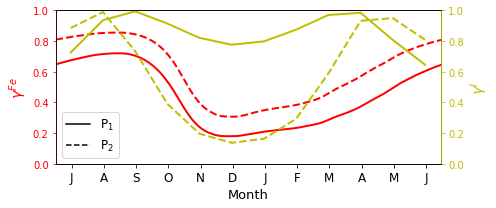

In [90]:
month = ['J','F','M','A','M','J','J','A','S','O','N','D']
colors = ['r','orange','g','b']

fig, ax = plt.subplots(figsize=(7,3))
fig.set_tight_layout(True)
ax2 = ax.twinx()

im, = ax.plot(range(0,360), gamFe1_day.roll(days=-180), 'r', lw=2)
ax.plot(range(0,360), gamFe2_day.roll(days=-180), 'r--', lw=2)
im2, = ax2.plot(np.linspace(14,344,12), gammaI1.sel(YC=slice(6e5,14e5)).mean(['YC','XC']).roll(month=-6), 'y', lw=2)
ax2.plot(np.linspace(14,344,12), gammaI2.sel(YC=slice(6e5,14e5)).mean(['YC','XC']).roll(month=-6), 'y--', lw=2)

ax.set_xticks(np.linspace(15,345,12))
ax.set_xticklabels(np.roll(np.asarray(month),-6), fontsize=12)
ax.set_xlim([0,359])
ax.set_ylim([.0,1.0])
ax2.set_ylim([.0,1.0])
ax.spines["left"].set_edgecolor(im.get_color())
ax2.spines["right"].set_edgecolor(im2.get_color())
ax.tick_params(axis='y', colors=im.get_color())
ax2.tick_params(axis='y', colors=im2.get_color())

ax.set_xlabel(r"Month", fontsize=13)
ax.set_ylabel(r'$\gamma^{Fe}$', color='r', fontsize=14)
ax2.set_ylabel(r'$\gamma^{I}$', color='y', fontsize=14)
linestyles = ['-', "--"]
dummy_lines = [ax.plot([],[], c="black", ls = linestyles[0])[0]]
dummy_lines.append(ax.plot([],[], c="black", ls = linestyles[1])[0])
legend = ax.legend([dummy_lines[i] for i in [0,1]], ["P$_1$", "P$_2$"], loc=3, fontsize=12)
plt.savefig(op.join(pdir,'Figures/Gamma_Fe-and-PAR_05km.pdf'))

# Cross spectra

In [4]:
# iternum = np.append(np.arange(te-int(360*86400/dt),te-int(270*86400/dt),12),
#                     np.arange(te-int(180*86400/dt),te-int(90*86400/dt),12))
# iternum = np.arange(int(129*360*86400/200),
#                    int(129*360*86400/200+90*86400/200),18)
# print(iternum)
ys, dy = (132,1)
dt = 150
# df = 288
ts = int(360*86400*(ys+.0)/dt)
te = int(ts+360*86400*dy/dt)
print(ts,te)
ds1H = open_mdsdataset(op.join(bdir,'05km_t150'), 
                       grid_dir=op.join(pdir,'5km_grid'),
                       iters=range(ts,te,24),
                       prefix=['Snap1H'], 
                       delta_t=dt
                       )
ds1H

27371520 27578880


<xarray.Dataset>
Dimensions:  (XC: 200, XG: 200, YC: 400, YG: 400, Z: 76, Zl: 76, Zp1: 77, Zu: 76, time: 8640)
Coordinates:
  * XC       (XC) >f4 2500.0 7500.0 12500.0 ... 987500.0 992500.0 997500.0
  * YC       (YC) >f4 2500.0 7500.0 12500.0 ... 1987500.0 1992500.0 1997500.0
  * XG       (XG) >f4 0.0 5000.0 10000.0 15000.0 ... 985000.0 990000.0 995000.0
  * YG       (YG) >f4 0.0 5000.0 10000.0 ... 1985000.0 1990000.0 1995000.0
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 ... -2625.955 -2757.325 -2912.665
  * Zp1      (Zp1) >f4 0.0 -1.0 -2.14 -3.44 ... -2689.32 -2825.33 -3000.0
  * Zu       (Zu) >f4 -1.0 -2.14 -3.44 -4.93 ... -2689.32 -2825.33 -3000.0
  * Zl       (Zl) >f4 0.0 -1.0 -2.14 -3.44 ... -2562.59 -2689.32 -2825.33
    rA       (YC, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    dxG      (YG, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    dyG      (YC, XG) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    Depth    (YC, XC) >f4 dask.arra

In [6]:
nz200 = 29
nz300 = 33
grid1H = Grid(ds1H,periodic=['X'])
wJFM = ds1H.WVEL.sel(YC=slice(6e5,14e5))[:int(90*24),nz200]
# FeJFM = grid1H.interp(ds1H.TRAC03.sel(YC=slice(6e5,14e5)),'Z',boundary='fill')[:int(90*24),nz200]
wJFMkf = xrft.dft(wJFM, dim=['XC'], detrend='constant')
# FeJFMkf = xrft.dft(FeJFM, dim=['XC'], detrend='constant')
wJFMkf = xrft.dft(wJFMkf.chunk({'time':int(90*24),'YC':80}), dim=['time'], detrend='linear', window=True)
# FeJFMkf = xrft.dft(FeJFMkf.chunk({'time':int(90*24),'YC':80}), dim=['time'], detrend='linear', window=True)

with ProgressBar():
#     wFeJFMkf = (wJFMkf * np.conj(FeJFMkf)).real.mean('YC').compute()
    w2JFMkf = (wJFMkf * np.conj(wJFMkf)).real.mean('YC').compute()
w2JFMkf

[########################################] | 100% Completed |  9min 36.1s


<xarray.DataArray 'rechunk-merge-e20351f0df47d8c8a99701548c12357f' (freq_time: 2160, freq_XC: 200)>
array([[4.662328e-07, 3.393160e-07, 3.458106e-07, ..., 4.233475e-07,
        3.458106e-07, 3.393160e-07],
       [4.726016e-07, 2.880083e-07, 3.617859e-07, ..., 3.782796e-07,
        3.490629e-07, 3.853027e-07],
       [4.558663e-07, 2.860660e-07, 4.282900e-07, ..., 4.290432e-07,
        4.055058e-07, 3.304583e-07],
       ...,
       [3.742757e-07, 3.336060e-07, 4.012691e-07, ..., 3.296673e-07,
        4.631945e-07, 3.338813e-07],
       [4.558663e-07, 3.304583e-07, 4.055058e-07, ..., 3.385831e-07,
        4.282900e-07, 2.860660e-07],
       [4.726016e-07, 3.853027e-07, 3.490629e-07, ..., 4.143886e-07,
        3.617859e-07, 2.880083e-07]])
Coordinates:
  * freq_time          (freq_time) float64 -0.0001389 -0.0001388 ... 0.0001388
  * freq_XC            (freq_XC) float64 -0.0001 -9.9e-05 ... 9.8e-05 9.9e-05
    freq_time_spacing  float64 1.286e-07

In [7]:
nz200 = 29
grid1H = Grid(ds1H,periodic=['X'])
wJAS = ds1H.WVEL.sel(YC=slice(6e5,14e5))[int(2*90*24):int(3*90*24),nz200]
# FeJAS = grid1H.interp(ds1H.TRAC03.sel(YC=slice(6e5,14e5)),'Z',boundary='fill')[int(2*90*24):int(3*90*24),nz200]
wJASkf = xrft.dft(wJAS, dim=['XC'], detrend='constant')
# FeJASkf = xrft.dft(FeJAS, dim=['XC'], detrend='constant')
wJASkf = xrft.dft(wJASkf.chunk({'time':int(90*24),'YC':80}), dim=['time'], detrend='linear', window=True)
# FeJASkf = xrft.dft(FeJASkf.chunk({'time':int(90*24),'YC':80}), dim=['time'], detrend='linear', window=True)

with ProgressBar():
#     wFeJASkf = (wJASkf * np.conj(FeJASkf)).real.mean('YC').compute()
    w2JASkf = (wJASkf * np.conj(wJASkf)).real.mean('YC').compute()
w2JASkf

[########################################] | 100% Completed | 12min 21.5s


<xarray.DataArray 'rechunk-merge-d73e4ea9cee0362e7e43f210711d89cb' (freq_time: 2160, freq_XC: 200)>
array([[5.254027e-07, 4.897392e-07, 5.855941e-07, ..., 5.482866e-07,
        5.855941e-07, 4.897392e-07],
       [5.091281e-07, 4.610053e-07, 5.381289e-07, ..., 5.955732e-07,
        5.567073e-07, 4.486365e-07],
       [5.391552e-07, 4.692349e-07, 6.121040e-07, ..., 5.777341e-07,
        4.761150e-07, 4.846901e-07],
       ...,
       [5.107192e-07, 5.444804e-07, 5.751889e-07, ..., 5.252520e-07,
        6.014952e-07, 4.628787e-07],
       [5.391552e-07, 4.846901e-07, 4.761150e-07, ..., 5.299377e-07,
        6.121040e-07, 4.692349e-07],
       [5.091281e-07, 4.486365e-07, 5.567073e-07, ..., 5.380257e-07,
        5.381289e-07, 4.610053e-07]])
Coordinates:
  * freq_time          (freq_time) float64 -0.0001389 -0.0001388 ... 0.0001388
  * freq_XC            (freq_XC) float64 -0.0001 -9.9e-05 ... 9.8e-05 9.9e-05
    freq_time_spacing  float64 1.286e-07

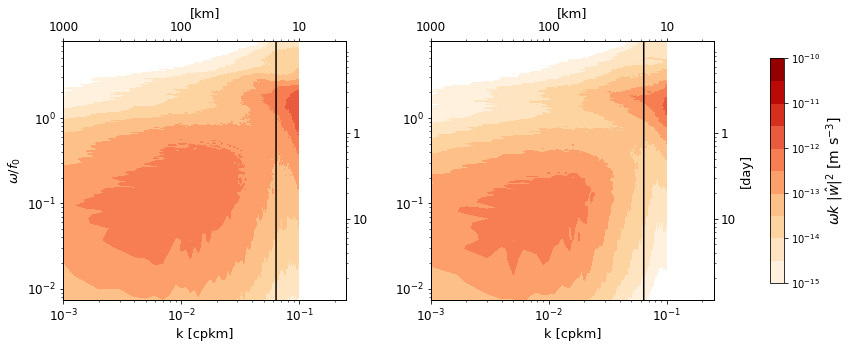

In [12]:
import matplotlib.colors as clr

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13,6))
ax3 = ax1.twiny()
ax5 = ax1.twinx()
ax4 = ax2.twiny()
ax6 = ax2.twinx()
# fig.set_tight_layout(True)
im1 = ax1.contourf(w2JASkf.freq_XC[101:]*1e3, w2JASkf.freq_time[1081:]*np.abs(f0/(2*np.pi))**-1, 
                 w2JASkf[1081:,101:]*w2JASkf.freq_time[1081:]*w2JASkf.freq_XC[101:], 
                 cmap='OrRd', levels=np.logspace(-15,-10,11),norm=clr.LogNorm())
ax1.plot(np.ones_like(w2JASkf.freq_time[1081:])*Rd**-1, w2JASkf.freq_time[1081:]*np.abs(f0/(2*np.pi))**-1, 'k')
ax3.set_xscale('log')
ax5.set_yscale('log')
ax1.set_xlim([1e-3,2.5e-1])
ax3.set_xlim([1e-3,2.5e-1])
ax3.set_xticks([1e-3,1e-2,1e-1])
ax3.set_xticklabels(np.asarray([1e3,1e2,1e1],dtype=int))
ax5.set_ylim([w2JASkf.freq_time[1081:].min()*86400,w2JASkf.freq_time[1081:].max()*86400])
ax5.set_yticks([.1,1])
ax5.set_yticklabels(np.asarray([1e1,1],dtype=int))
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r"k [cpkm]", fontsize=13)
ax1.set_ylabel(r"$\omega/f_0$", fontsize=13)
ax3.set_xlabel(r"[km]", fontsize=13)
# ax5.set_ylabel(r"[day]", fontsize=13)
# ax2.set_title(r"JFM", fontsize=15, y=1.09)

im2 = ax2.contourf(w2JFMkf.freq_XC[101:]*1e3, w2JFMkf.freq_time[1081:]*np.abs(f0/(2*np.pi))**-1, 
                w2JFMkf[1081:,101:]*w2JFMkf.freq_time[1081:]*w2JFMkf.freq_XC[101:], 
                cmap='OrRd', levels=np.logspace(-15,-10,11),norm=clr.LogNorm())

for c in im1.collections:
    c.set_rasterized(True)
for c in im2.collections:
    c.set_rasterized(True)

ax2.plot(np.ones_like(w2JFMkf.freq_time[1081:])*Rd**-1, w2JFMkf.freq_time[1081:]*np.abs(f0/(2*np.pi))**-1, 'k')
ax4.set_xscale('log')
ax6.set_yscale('log')
ax2.set_xlim([1e-3,2.5e-1])
ax4.set_xlim([1e-3,2.5e-1])
ax4.set_xticks([1e-3,1e-2,1e-1])
ax4.set_xticklabels(np.asarray([1e3,1e2,1e1],dtype=int))
ax6.set_ylim([w2JFMkf.freq_time[1081:].min()*86400,w2JFMkf.freq_time[1081:].max()*86400])
ax6.set_yticks([.1,1])
ax6.set_yticklabels(np.asarray([1e1,1],dtype=int))
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel(r"k [cpkm]", fontsize=13)
ax4.set_xlabel(r"[km]", fontsize=13)
ax6.set_ylabel(r"[day]", fontsize=13)
# ax2.set_title(r"JFM", fontsize=15, y=1.09)
fig.subplots_adjust(right=0.82, wspace=.3, top=.8, bottom=.2)
cbar_ax = fig.add_axes([0.88, 0.24, 0.015, 0.52])
cbar = fig.colorbar(im1, cax=cbar_ax, ticks=[1e-15,1e-14,1e-13,1e-12,1e-11,1e-10])
cbar.set_label(r"$\omega k\ |\hat{w}|^2$ [m s$^{-3}$]", fontsize=14)

ax1.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax3.tick_params(axis='both', which='major', labelsize=12)
ax4.tick_params(axis='both', which='major', labelsize=12)
ax5.tick_params(axis='both', which='major', labelsize=12)
ax6.tick_params(axis='both', which='major', labelsize=12)

plt.savefig(op.join(bdir,'Figures/w2_k-omega_05km_200m.pdf'))

In [5]:
f0 = -1.1e-4
beta = 1.4e-11
g = 9.81
r0 = 1e3
alpha = 2e-4
Rd = (1.01390163e-05*2*np.pi)**-1*1e-3

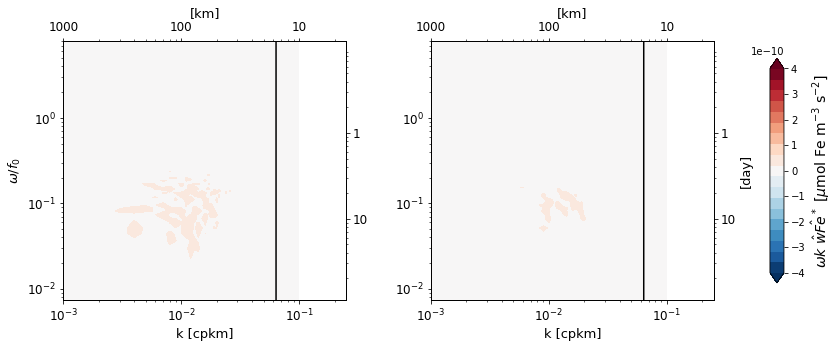

In [11]:
import matplotlib.colors as clr

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13,6))
ax3 = ax1.twiny()
ax5 = ax1.twinx()
ax4 = ax2.twiny()
ax6 = ax2.twinx()
# fig.set_tight_layout(True)
im1 = ax1.contourf(wFeJASkf.freq_XC[101:]*1e3, wFeJASkf.freq_time[1081:]*np.abs(f0/(2*np.pi))**-1, 
                 wFeJASkf[1081:,101:]*wFeJASkf.freq_time[1081:]*wFeJASkf.freq_XC[101:]*1e3, 
                 cmap='RdBu_r', levels=np.linspace(-.4e-9,.4e-9,20), extend='both')
ax1.plot(np.ones_like(wFeJASkf.freq_time[1081:])*Rd**-1, wFeJASkf.freq_time[1081:]*np.abs(f0/(2*np.pi))**-1, 'k')
ax3.set_xscale('log')
ax5.set_yscale('log')
ax3.set_xlim([1e-3,2.5e-1])
ax3.set_xticks([1e-3,1e-2,1e-1])
ax3.set_xticklabels(np.asarray([1e3,1e2,1e1],dtype=int))
ax5.set_ylim([wFeJASkf.freq_time[1081:].min()*86400,wFeJASkf.freq_time[1081:].max()*86400])
ax5.set_yticks([.1,1])
ax5.set_yticklabels(np.asarray([1e1,1],dtype=int))
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim([1e-3,2.5e-1])
ax1.set_ylabel(r"$\omega/f_0$", fontsize=13)
ax3.set_xlabel(r"[km]", fontsize=13)
ax1.set_xlabel(r"k [cpkm]", fontsize=13)
# ax3.set_ylabel(r"[days]", fontsize=12)
# ax1.set_title(r"JAS", fontsize=15, y=1.09)

im2 = ax2.contourf(wFeJFMkf.freq_XC[101:]*1e3, wFeJFMkf.freq_time[1081:]*np.abs(f0/(2*np.pi))**-1, 
                wFeJFMkf[1081:,101:]*wFeJFMkf.freq_time[1081:]*wFeJFMkf.freq_XC[101:]*1e3, 
                cmap='RdBu_r', levels=np.linspace(-.4e-9,.4e-9,20), extend='both')

for c in im1.collections:
    c.set_rasterized(True)
for c in im2.collections:
    c.set_rasterized(True)

ax2.plot(np.ones_like(wFeJFMkf.freq_time[1081:])*Rd**-1, wFeJFMkf.freq_time[1081:]*np.abs(f0/(2*np.pi))**-1, 'k')
ax4.set_xscale('log')
ax6.set_yscale('log')
ax2.set_xlim([1e-3,2.5e-1])
ax4.set_xlim([1e-3,2.5e-1])
ax4.set_xticks([1e-3,1e-2,1e-1])
ax4.set_xticklabels(np.asarray([1e3,1e2,1e1],dtype=int))
ax6.set_ylim([wFeJFMkf.freq_time[1081:].min()*86400,wFeJFMkf.freq_time[1081:].max()*86400])
ax6.set_yticks([.1,1])
ax6.set_yticklabels(np.asarray([1e1,1],dtype=int))
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel(r"k [cpkm]", fontsize=13)
ax4.set_xlabel(r"[km]", fontsize=13)
ax6.set_ylabel(r"[day]", fontsize=13)
# ax2.set_title(r"JFM", fontsize=15, y=1.09)
fig.subplots_adjust(right=0.82, wspace=.3, top=.8, bottom=.2)
cbar_ax = fig.add_axes([0.88, 0.24, 0.015, 0.52])
cbar = fig.colorbar(im1, cax=cbar_ax, ticks=[-.4e-9,-.3e-9,-.2e-9,-.1e-9,0.,.1e-9,.2e-9,.3e-9,0.4e-9])
cbar.set_label(r"$\omega k\ \hat{w}\hat{Fe}^*$ [$\mu$mol Fe m$^{-3}$ s$^{-2}$]", fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax3.tick_params(axis='both', which='major', labelsize=12)
ax4.tick_params(axis='both', which='major', labelsize=12)
ax5.tick_params(axis='both', which='major', labelsize=12)
ax6.tick_params(axis='both', which='major', labelsize=12)
plt.savefig(op.join(bdir,'Figures/wFe_k-omega_05km_200m.pdf'))

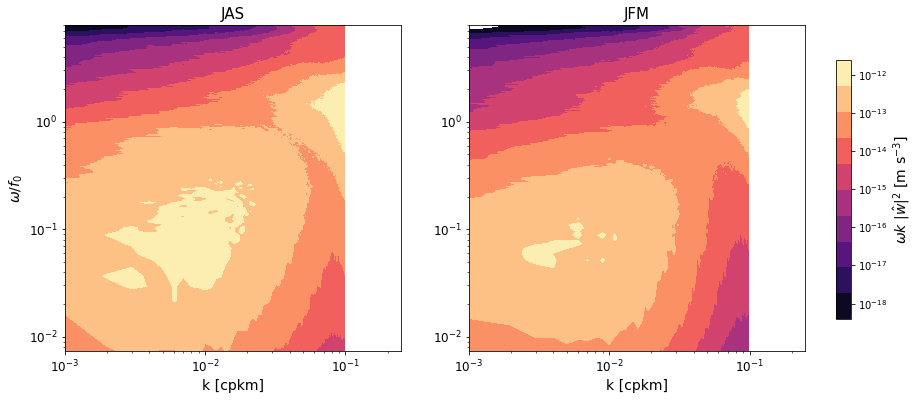

In [35]:
import matplotlib.colors as clr

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
# fig.set_tight_layout(True)
im = ax1.contourf(w2JASkf.freq_XC[101:]*1e3, w2JASkf.freq_time[1081:]*np.abs(f0/(2*np.pi))**-1, 
                 w2JASkf[1081:,101:]*w2JASkf.freq_time[1081:]*w2JASkf.freq_XC[101:], 
                 cmap='magma', levels=np.logspace(-18.4,-11.6,11),norm=clr.LogNorm())
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim([1e-3,2.5e-1])
ax2.set_xlim([1e-3,2.5e-1])
ax1.set_ylabel(r"$\omega/f_0$", fontsize=14)
ax1.set_xlabel(r"k [cpkm]", fontsize=14)
ax1.set_title(r"JAS", fontsize=15)
ax2.contourf(w2JFMkf.freq_XC[101:]*1e3, w2JFMkf.freq_time[1081:]*np.abs(f0/(2*np.pi))**-1, 
            w2JFMkf[1081:,101:]*w2JFMkf.freq_time[1081:]*w2JFMkf.freq_XC[101:], 
            cmap='magma', levels=np.logspace(-18.4,-11.6,11),norm=clr.LogNorm())
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel(r"k [cpkm]", fontsize=14)
ax2.set_title(r"JFM", fontsize=15)
fig.subplots_adjust(right=0.86)
cbar_ax = fig.add_axes([0.89, 0.2, 0.015, 0.6])
cbar = fig.colorbar(im, cax=cbar_ax, ticks=[1e-18,1e-17,1e-16,1e-15,1e-14,1e-13,1e-12])
cbar.set_label(r"$\omega k\ |\hat{w}|^2$ [m s$^{-3}$]", fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)

plt.savefig(op.join(pdir,'Figures/w2_k-omega_05km_200m.pdf'))

In [47]:
dsnap = open_mdsdataset(op.join(bdir,'05km_snap1H'), 
                       grid_dir=op.join(pdir,'5km_grid'),
                       iters=range(te-int(10*360*86400/dt),te,4320),
                       prefix=['WPFe_snap'], 
                       delta_t=dt
                       )
dsnap

/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:  (XC: 200, XG: 200, YC: 400, YG: 400, Z: 76, Zl: 76, Zp1: 77, Zu: 76, time: 240)
Coordinates:
  * XC       (XC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * XG       (XG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 30000.0 ...
  * YG       (YG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 30000.0 ...
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * Zp1      (Zp1) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
  * Zu       (Zu) >f4 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 -16.1 ...
  * Zl       (Zl) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
    rA       (YC, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    dxG      (YG, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    dyG      (YC, XG) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    Depth    (YC,

In [114]:
np.tile(np.roll(np.repeat(range(4),6),4),2)

array([3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 3, 3])

In [48]:
dsnap.coords['seas'] = ('time',np.tile(np.roll(np.repeat(range(4),6),4),dy))
dsnap.coords['month'] = ('time',np.tile(np.repeat(range(12),2),dy))
wsnap = dsnap.WVEL
Fsnap = dsnap.TRAC03
# Psnap = dsnap.TRAC22 + dsnap.TRAC23
grid = Grid(dsnap,periodic=['X'])

In [87]:
seas = np.tile(np.repeat(range(4),90),dy)
ds['seas'] = ('time', seas)
ds_sea = ds.groupby('seas').mean(['time','XC','XG'])
ds_ase = ds.groupby('seas') - ds_sea
wsea = ds_sea.WVEL
Fesea = ds_sea.TRAC03
wsnapp = wsnap.groupby('seas') - wsea
Fsnapp = Fsnap.groupby('seas') - Fesea
wsnapp

<xarray.DataArray 'WVEL' (time: 240, Zl: 76, YC: 400, XC: 200)>
dask.array<shape=(240, 76, 400, 200), dtype=float32, chunksize=(1, 76, 400, 200)>
Coordinates:
  * XC       (XC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * Zl       (Zl) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
    rA       (YC, XC) >f4 25000000.0 25000000.0 25000000.0 25000000.0 ...
    Depth    (YC, XC) >f4 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    iter     (time) int64 dask.array<shape=(240,), chunksize=(1,)>
  * time     (time) float64 2.271e+09 2.272e+09 2.273e+09 2.274e+09 ...
    seas     (time) int64 3 3 3 3 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 3 3 3 ...
    month    (time) int64 0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9 10 10 11 ...

In [88]:
with ProgressBar():
    wkFek = xrft.cross_spectrum(wsnapp.sel(YC=slice(6e5,14e5)),
                                grid.interp(Fsnapp,'Z',boundary='fill').sel(YC=slice(6e5,14e5)),
                                dim=['XC'], density=False).compute()

/home/takaya/xrft/xrft/xrft.py:272: FutureWarning: xarray.DataArray.__contains__ currently checks membership in DataArray.coords, but in xarray v0.11 will change to check membership in array values.
  elif d in da:


[########################################] | 100% Completed |  4min  2.3s


In [89]:
wkFek.coords['month'] = ('time',np.tile(np.repeat(range(12),2),dy))
wkFek

<xarray.DataArray (time: 240, Zl: 76, YC: 160, freq_XC: 200)>
array([[[[-4.568640e-16, ...,  8.388516e-16],
         ...,
         [-1.905549e-15, ...,  6.913027e-15]],

        ...,

        [[ 5.051664e-12, ...,  2.017352e-12],
         ...,
         [ 9.482633e-12, ..., -8.160425e-13]]],


       ...,


       [[[-7.785921e-16, ...,  2.260447e-15],
         ...,
         [ 1.310156e-15, ...,  5.786423e-16]],

        ...,

        [[-5.360933e-15, ...,  5.602194e-13],
         ...,
         [ 5.772624e-13, ...,  2.374581e-13]]]])
Coordinates:
  * time             (time) float64 2.271e+09 2.272e+09 2.273e+09 2.274e+09 ...
  * Zl               (Zl) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 ...
  * YC               (YC) >f4 602500.0 607500.0 612500.0 617500.0 622500.0 ...
  * freq_XC          (freq_XC) float64 -0.0001 -9.9e-05 -9.8e-05 -9.7e-05 ...
    freq_XC_spacing  float64 1e-06
    month            (time) int64 0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9 10 ...

In [90]:
wkFek_mon = wkFek.groupby('month').mean(['time','YC']).compute()
wkFek_mon

<xarray.DataArray (month: 12, Zl: 76, freq_XC: 200)>
array([[[ 2.222657e-16, -2.580061e-17, ...,  6.104767e-17, -2.580061e-17],
        [-5.644001e-14,  6.506978e-14, ...,  4.014153e-15,  6.506978e-14],
        ...,
        [ 4.049429e-13,  2.021587e-13, ..., -1.531557e-13,  2.021587e-13],
        [-2.774056e-13, -3.813508e-13, ..., -3.320288e-13, -3.813508e-13]],

       [[ 8.483461e-17, -4.061205e-16, ..., -5.051657e-17, -4.061205e-16],
        [-1.075298e-13,  1.332111e-14, ..., -1.322778e-13,  1.332111e-14],
        ...,
        [ 5.703473e-15,  2.131268e-13, ..., -1.516828e-13,  2.131268e-13],
        [-2.897404e-13, -3.135253e-13, ..., -4.108774e-13, -3.135253e-13]],

       ...,

       [[ 3.547275e-16,  3.706452e-15, ...,  4.316313e-15,  3.706452e-15],
        [-6.171182e-13, -1.978742e-12, ..., -1.029898e-12, -1.978742e-12],
        ...,
        [ 1.531175e-13,  3.371303e-13, ..., -2.615297e-13,  3.371303e-13],
        [ 1.816124e-15, -9.741051e-15, ..., -2.262136e-13, -9.7410

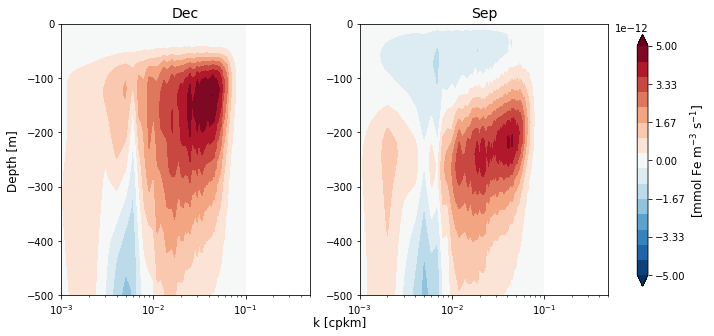

In [109]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
im = ax1.contourf(wkFek_mon.freq_XC[101:]*1e3, wkFek_mon.Zl, wkFek_mon[-1,:,101:]*wkFek_mon.freq_XC[101:],
                 cmap='RdBu_r', levels=np.linspace(-5e-12,5e-12,16), extend='both')
ax2.contourf(wkFek_mon.freq_XC[101:]*1e3, wkFek_mon.Zl, wkFek_mon[8,:,101:]*wkFek_mon.freq_XC[101:],
            cmap='RdBu_r', levels=np.linspace(-5e-12,5e-12,16), extend='both')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_ylim([-5e2,0])
ax2.set_ylim([-5e2,0])
ax1.set_xlim([1e-3,5e-1])
ax2.set_xlim([1e-3,5e-1])
ax1.set_title(r"Dec", fontsize=14)
ax2.set_title(r"Sep", fontsize=14)
fig.subplots_adjust(right=0.86)
cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax, ticks=[-5e-12,-3.33e-12,-1.67e-12,0,1.67e-12,3.33e-12,5e-12])
cbar.set_label(r"[mmol Fe m$^{-3}$ s$^{-1}$]", fontsize=12)

fig.subplots_adjust(left=0.1)
fig.text(0.025, 0.5, 'Depth [m]', 
         va='center', rotation='vertical', fontsize=12)
fig.text(0.45, 0.05, 'k [cpkm]', 
         va='center', rotation='horizontal', fontsize=12)
plt.savefig(op.join(pdir,'Figures/wkFek_Dec-Sep_05km.pdf'))

In [8]:
dsw = xr.open_mfdataset('/swot/SUM02/takaya/channelMOC-Darwin/omega/womega_ho-qg_*.nc',
                       concat_dim='time')
dsw

<xarray.Dataset>
Dimensions:  (XC: 200, YC: 180, Zp1: 200, time: 3600)
Coordinates:
  * Zp1      (Zp1) float64 0.0 -15.08 -30.15 -45.23 -60.3 -75.38 -90.45 ...
  * YC       (YC) float32 552500.0 557500.0 562500.0 567500.0 572500.0 ...
  * XC       (XC) float32 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 ...
Dimensions without coordinates: time
Data variables:
    wa_ho    (time, Zp1, YC, XC) float64 dask.array<shape=(3600, 200, 180, 200), chunksize=(1, 200, 180, 200)>
    wa_qg    (time, Zp1, YC, XC) float64 dask.array<shape=(3600, 200, 180, 200), chunksize=(1, 200, 180, 200)>

In [51]:
dsw.Zp1[:35]

<xarray.DataArray 'Zp1' (Zp1: 35)>
array([   0.      ,  -15.075377,  -30.150754,  -45.226131,  -60.301508,
        -75.376884,  -90.452261, -105.527638, -120.603015, -135.678392,
       -150.753769, -165.829146, -180.904523, -195.979899, -211.055276,
       -226.130653, -241.20603 , -256.281407, -271.356784, -286.432161,
       -301.507538, -316.582915, -331.658291, -346.733668, -361.809045,
       -376.884422, -391.959799, -407.035176, -422.110553, -437.18593 ,
       -452.261307, -467.336683, -482.41206 , -497.487437, -512.562814])
Coordinates:
  * Zp1      (Zp1) float64 0.0 -15.08 -30.15 -45.23 -60.3 -75.38 -90.45 ...

In [9]:
w_meso = xr.DataArray(dsw.wa_qg.data[:,:35], dims=['time','Zp1','YC','XC'],
                     coords={'time':ds.time.data,'Zp1':dsw.Zp1.data[:35],
                            'YC':dsw.YC.data,'XC':dsw.XC.data})
w_masm = xr.DataArray(dsw.wa_ho.data[:,:35], dims=['time','Zp1','YC','XC'],
                     coords={'time':ds.time.data,'Zp1':dsw.Zp1.data[:35],
                            'YC':dsw.YC.data,'XC':dsw.XC.data})
w_sbms = w_masm - w_meso
w_sbms

<xarray.DataArray (time: 3600, Zp1: 35, YC: 180, XC: 200)>
dask.array<shape=(3600, 35, 180, 200), dtype=float64, chunksize=(1, 35, 180, 200)>
Coordinates:
  * time     (time) float64 2.271e+09 2.271e+09 2.271e+09 2.271e+09 ...
  * Zp1      (Zp1) float64 0.0 -15.08 -30.15 -45.23 -60.3 -75.38 -90.45 ...
  * YC       (YC) float32 552500.0 557500.0 562500.0 567500.0 572500.0 ...
  * XC       (XC) float32 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 ...

In [11]:
ds.Zl[:42]

<xarray.DataArray 'Zl' (Zl: 42)>
array([   0.  ,   -1.  ,   -2.14,   -3.44,   -4.93,   -6.63,   -8.56,  -10.76,
        -13.26,  -16.1 ,  -19.31,  -22.94,  -27.04,  -31.65,  -36.83,  -42.62,
        -49.09,  -56.29,  -64.27,  -73.1 ,  -82.83,  -93.52, -105.22, -117.98,
       -131.85, -146.88, -163.1 , -180.55, -199.25, -219.22, -240.49, -263.05,
       -286.92, -312.09, -338.55, -366.29, -395.29, -425.53, -456.98, -489.63,
       -523.45, -558.42], dtype=float32)
Coordinates:
  * Zl       (Zl) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
Attributes:
    standard_name:      depth_at_upper_w_location
    long_name:          vertical coordinate of upper cell interface
    units:              m
    positive:           down
    axis:               Z
    c_grid_axis_shift:  -0.5

In [10]:
zPew = np.linspace(ds.Zp1[0], ds.Zp1[-1], 200)
w_sub = ds.WVEL.sel(YC=slice(5.5e5,14.5e5))
func = pchip(np.abs(w_sub.Zl)[:42], w_sub.data[:,:42], axis=1)
wintp = xr.DataArray(func(np.abs(zPew)[:35]), dims=['time','Zp1','YC','XC'], 
                    coords={'time':ds.time.data,'Zp1':zPew[:35],
                            'YC':w_sub.YC.data,'XC':w_sub.XC.data}
                    )
del func

In [92]:
fe_sub = ds_ase.TRAC03.sel(YC=slice(5.5e5,14.5e5))
func = pchip(np.abs(fe_sub.Z)[:42], fe_sub[:,:42], axis=1)
Feintp = xr.DataArray(func(np.abs(zPew)[:35]), dims=['time','Zp1','YC','XC'], 
                     coords={'time':ds.time.data,'Zp1':zPew[:35],
                            'YC':fe_sub.YC.data,'XC':fe_sub.XC.data}
                     )
del func

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/contour.py:1544: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/contour.py:1544: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


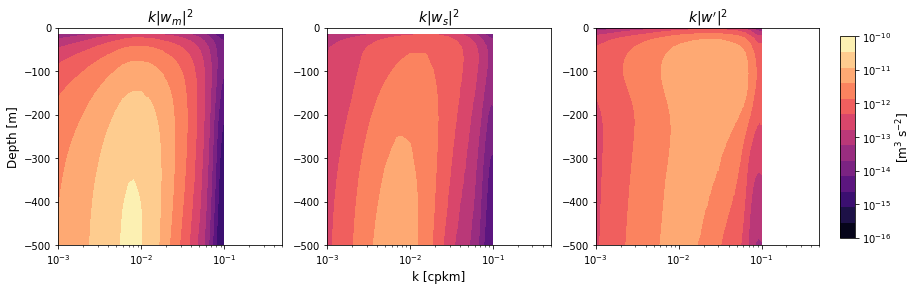

In [106]:
nk = 101
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14,4))
im = ax1.contourf(wmk_clim.freq_XC[nk:]*1e3, wmk_clim.Zp1, wmk_clim[:,nk:]*wmk_clim.freq_XC[nk:],
                 cmap='magma', levels=np.logspace(-16,-10,14), norm=LogNorm())
ax2.contourf(wsk_clim.freq_XC[nk:]*1e3, wsk_clim.Zp1, wsk_clim[:,nk:]*wsk_clim.freq_XC[nk:],
            cmap='magma', levels=np.logspace(-16,-10,14), norm=LogNorm())
ax3.contourf(wpk_clim.freq_XC[nk:]*1e3, wpk_clim.Zp1, wpk_clim[:,nk:]*wpk_clim.freq_XC[nk:],
            cmap='magma', levels=np.logspace(-16,-10,14), norm=LogNorm())
ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')
ax1.set_ylim([-5e2,0])
ax2.set_ylim([-5e2,0])
ax3.set_ylim([-5e2,0])
ax1.set_xlim([1e-3,5e-1])
ax2.set_xlim([1e-3,5e-1])
ax3.set_xlim([1e-3,5e-1])
ax1.set_title(r"$k|w_m|^2$", fontsize=14)
ax2.set_title(r"$k|w_s|^2$", fontsize=14)
ax3.set_title(r"$k|w'|^2$", fontsize=14)
ax1.set_ylabel(r"Depth [m]", fontsize=12)
ax2.set_xlabel(r"k [cpkm]", fontsize=12)
fig.subplots_adjust(right=0.88)
cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax, ticks=[1e-16,1e-15,1e-14,1e-13,1e-12,1e-11,1e-10])
cbar.set_label(r"[m$^{3}$ s$^{-2}$]", fontsize=12)
plt.savefig(op.join(bdir,'Figures/wk2-decomp_clim_05km.pdf'))

In [117]:
wmkFek15D = xrft.cross_spectrum(w_meso.sel(YC=slice(7e5,13e5))[::15], 
                               Feintp.sel(YC=slice(7e5,13e5))[::15], dim=['XC'], density=False)
wskFek15D = xrft.cross_spectrum(w_sbms.sel(YC=slice(7e5,13e5))[::15], 
                               Feintp.sel(YC=slice(7e5,13e5))[::15], dim=['XC'], density=False)
wpkFek15D = xrft.cross_spectrum(wp.sel(YC=slice(7e5,13e5))[::15], 
                               Feintp.sel(YC=slice(7e5,13e5))[::15], dim=['XC'], density=False)
wmkFek15D.coords['month'] = ('time',np.tile(np.repeat(range(12),2),dy))
wskFek15D.coords['month'] = ('time',np.tile(np.repeat(range(12),2),dy))
wpkFek15D.coords['month'] = ('time',np.tile(np.repeat(range(12),2),dy))
with ProgressBar():
    wmkFek_mon = wmkFek15D.groupby('month').mean(['time','YC']).compute()
    wskFek_mon = wskFek15D.groupby('month').mean(['time','YC']).compute()
    wpkFek_mon = wpkFek15D.groupby('month').mean(['time','YC']).compute()

wmkFek_mon

/home/takaya/xrft/xrft/xrft.py:272: FutureWarning: xarray.DataArray.__contains__ currently checks membership in DataArray.coords, but in xarray v0.11 will change to check membership in array values.
  elif d in da:
/home/takaya/xrft/xrft/xrft.py:272: FutureWarning: xarray.DataArray.__contains__ currently checks membership in DataArray.coords, but in xarray v0.11 will change to check membership in array values.
  elif d in da:
/home/takaya/xrft/xrft/xrft.py:272: FutureWarning: xarray.DataArray.__contains__ currently checks membership in DataArray.coords, but in xarray v0.11 will change to check membership in array values.
  elif d in da:


[########################################] | 100% Completed |  1min 17.6s
[########################################] | 100% Completed |  1min  8.5s
[########################################] | 100% Completed | 19.1s


<xarray.DataArray (month: 12, Zp1: 35, freq_XC: 200)>
array([[[ 0.000000e+00,  0.000000e+00, ...,  0.000000e+00,  0.000000e+00],
        [-5.778068e-15, -4.421464e-15, ..., -8.080881e-15, -4.421464e-15],
        ...,
        [-4.776427e-15, -3.919678e-14, ..., -1.413656e-14, -3.919678e-14],
        [-9.135967e-15, -3.137901e-14, ..., -3.514976e-14, -3.137901e-14]],

       [[ 0.000000e+00,  0.000000e+00, ...,  0.000000e+00,  0.000000e+00],
        [-7.723623e-15, -1.325265e-14, ..., -1.372664e-14, -1.325265e-14],
        ...,
        [-3.359924e-15, -2.372314e-14, ...,  5.242094e-14, -2.372314e-14],
        [ 6.133498e-15, -1.705838e-14, ...,  3.351823e-14, -1.705838e-14]],

       ...,

       [[ 0.000000e+00,  0.000000e+00, ...,  0.000000e+00,  0.000000e+00],
        [ 1.189622e-13,  9.769806e-14, ...,  4.381556e-15,  9.769806e-14],
        ...,
        [-9.738112e-15,  5.950433e-14, ..., -2.720160e-14,  5.950433e-14],
        [ 3.460838e-15,  1.882956e-14, ..., -2.087540e-14,  1.882

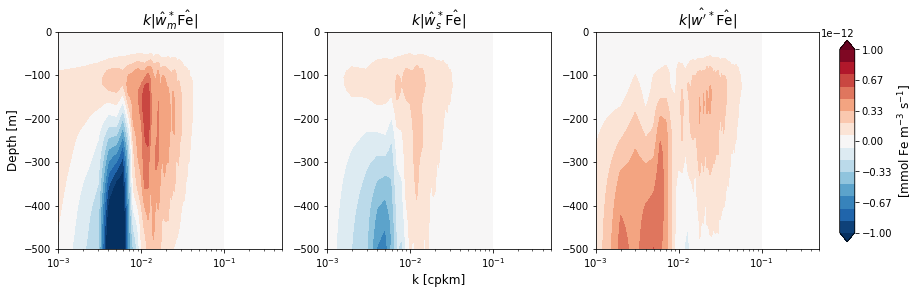

In [107]:
nk = 101
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14,4))
im = ax1.contourf(wmkFek_mon.freq_XC[nk:]*1e3, wmkFek_mon.Zp1, wmkFek_mon[-1,:,nk:]*wmkFek_mon.freq_XC[nk:],
                 cmap='RdBu_r', levels=np.linspace(-1e-12,1e-12,16), extend='both')
ax2.contourf(wskFek_mon.freq_XC[nk:]*1e3, wskFek_mon.Zp1, wskFek_mon[-1,:,nk:]*wskFek_mon.freq_XC[nk:],
            cmap='RdBu_r', levels=np.linspace(-1e-12,1e-12,16), extend='both')
ax3.contourf(wpkFek_mon.freq_XC[nk:]*1e3, wpkFek_mon.Zp1, wpkFek_mon[-1,:,nk:]*wpkFek_mon.freq_XC[nk:],
            cmap='RdBu_r', levels=np.linspace(-1e-12,1e-12,16), extend='both')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')
ax1.set_ylim([-5e2,0])
ax2.set_ylim([-5e2,0])
ax3.set_ylim([-5e2,0])
ax1.set_xlim([1e-3,5e-1])
ax2.set_xlim([1e-3,5e-1])
ax3.set_xlim([1e-3,5e-1])
ax1.set_title(r"$k$|$\hat{w}^*_m\hat{\tt Fe}$|", fontsize=14)
ax2.set_title(r"$k$|$\hat{w}^*_s\hat{\tt Fe}$|", fontsize=14)
ax3.set_title(r"$k$|$\hat{w'}^*\hat{\tt Fe}$|", fontsize=14)
ax1.set_ylabel(r"Depth [m]", fontsize=12)
ax2.set_xlabel(r"k [cpkm]", fontsize=12)
fig.subplots_adjust(right=0.88)
cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax, ticks=[-1e-12,-.33e-12,-.67e-12,0,.33e-12,.67e-12,1e-12])
cbar.set_label(r"[mmol Fe m$^{-3}$ s$^{-1}$]", fontsize=12)
plt.savefig(op.join(bdir,'Figures/wkFek-decomp_05km_Dec.pdf'))

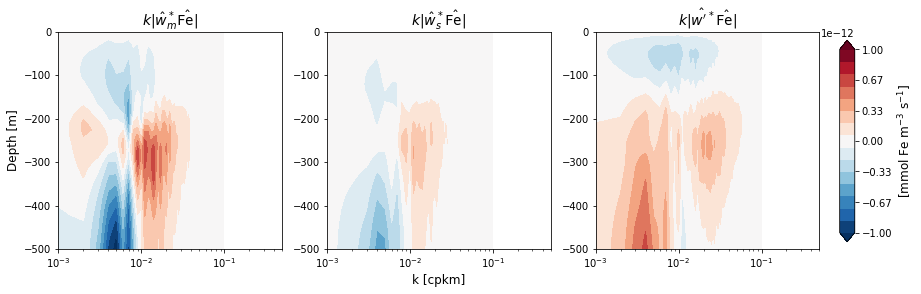

In [108]:
nk = 101
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14,4))
im = ax1.contourf(wmkFek_mon.freq_XC[nk:]*1e3, wmkFek_mon.Zp1, wmkFek_mon[8,:,nk:]*wmkFek_mon.freq_XC[nk:],
                 cmap='RdBu_r', levels=np.linspace(-1e-12,1e-12,16), extend='both')
ax2.contourf(wskFek_mon.freq_XC[nk:]*1e3, wskFek_mon.Zp1, wskFek_mon[8,:,nk:]*wskFek_mon.freq_XC[nk:],
            cmap='RdBu_r', levels=np.linspace(-1e-12,1e-12,16), extend='both')
ax3.contourf(wpkFek_mon.freq_XC[nk:]*1e3, wpkFek_mon.Zp1, wpkFek_mon[8,:,nk:]*wpkFek_mon.freq_XC[nk:],
            cmap='RdBu_r', levels=np.linspace(-1e-12,1e-12,16), extend='both')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')
ax1.set_ylim([-5e2,0])
ax2.set_ylim([-5e2,0])
ax3.set_ylim([-5e2,0])
ax1.set_xlim([1e-3,5e-1])
ax2.set_xlim([1e-3,5e-1])
ax3.set_xlim([1e-3,5e-1])
ax1.set_title(r"$k$|$\hat{w}^*_m\hat{\tt Fe}$|", fontsize=14)
ax2.set_title(r"$k$|$\hat{w}^*_s\hat{\tt Fe}$|", fontsize=14)
ax3.set_title(r"$k$|$\hat{w'}^*\hat{\tt Fe}$|", fontsize=14)
ax1.set_ylabel(r"Depth [m]", fontsize=12)
ax2.set_xlabel(r"k [cpkm]", fontsize=12)
fig.subplots_adjust(right=0.88)
cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax, ticks=[-1e-12,-.33e-12,-.67e-12,0,.33e-12,.67e-12,1e-12])
cbar.set_label(r"[mmol Fe m$^{-3}$ s$^{-1}$]", fontsize=12)
plt.savefig(op.join(bdir,'Figures/wkFek-decomp_05km_Sep.pdf'))

In [19]:
wmkFek

<xarray.DataArray (time: 2160, Zp1: 20, YC: 100, freq_XC: 200)>
dask.array<shape=(2160, 20, 100, 200), dtype=float64, chunksize=(1, 20, 100, 200)>
Coordinates:
  * time             (time) float64 3.359e+09 3.359e+09 3.359e+09 3.36e+09 ...
  * Zp1              (Zp1) float64 0.0 -30.3 -60.61 -90.91 -121.2 -151.5 ...
  * YC               (YC) float32 1002500.0 1007500.0 1012500.0 1017500.0 ...
  * freq_XC          (freq_XC) float64 -0.0001 -9.9e-05 -9.8e-05 -9.7e-05 ...
    freq_XC_spacing  float64 1e-06

In [118]:
nk25 = 39
nk100 = 9
wmkFek = xrft.cross_spectrum(w_meso.sel(YC=slice(7e5,13e5)), 
                            Feintp.sel(YC=slice(7e5,13e5)), dim=['XC'], density=True)
wskFek = xrft.cross_spectrum(w_sbms.sel(YC=slice(7e5,13e5)), 
                            Feintp.sel(YC=slice(7e5,13e5)), dim=['XC'], density=True)
wpkFek = xrft.cross_spectrum(wp.sel(YC=slice(7e5,13e5)), 
                            Feintp.sel(YC=slice(7e5,13e5)), dim=['XC'], density=True)
# wmFe_25 = 2*(wmkFek*wmkFek.freq_XC)[:,:,:,int(nk+nk25):].sum('freq_XC')
wmFe_100 = 2*(wmkFek)[:,:,:,int(nk+nk100):].sum('freq_XC')
# wsFe_25 = 2*(wskFek*wskFek.freq_XC)[:,:,:,int(nk+nk25):].sum('freq_XC')
wsFe_100 = 2*(wskFek)[:,:,:,int(nk+nk100):].sum('freq_XC')
# wpFe_25 = 2*(wpkFek*wpkFek.freq_XC)[:,:,:,int(nk+nk25):].sum('freq_XC')
wpFe_100 = 2*(wpkFek)[:,:,:,int(nk+nk100):].sum('freq_XC')
# wmFe_25.coords['days'] = ('time',np.tile(range(360),dy))
wmFe_100.coords['days'] = ('time',np.tile(range(360),dy))
# wsFe_25.coords['days'] = ('time',np.tile(range(360),dy))
wsFe_100.coords['days'] = ('time',np.tile(range(360),dy))
# wpFe_25.coords['days'] = ('time',np.tile(range(360),dy))
wpFe_100.coords['days'] = ('time',np.tile(range(360),dy))
with ProgressBar():
#     wmFe_25_days = wmFe_25.sel(YC=slice(11e5,14e5)).groupby('days').mean(['time','YC']).compute()
    wmFe_100_days = wmFe_100.sel(YC=slice(11e5,14e5)).groupby('days').mean(['time','YC']).compute()
#     wsFe_25_days = wsFe_25.sel(YC=slice(11e5,14e5)).groupby('days').mean(['time','YC']).compute()
    wsFe_100_days = wsFe_100.sel(YC=slice(11e5,14e5)).groupby('days').mean(['time','YC']).compute()
#     wpFe_25_days = wpFe_25.sel(YC=slice(11e5,14e5)).groupby('days').mean(['time','YC']).compute()
    wpFe_100_days = wpFe_100.sel(YC=slice(11e5,14e5)).groupby('days').mean(['time','YC']).compute()

wsFe_100_days

/home/takaya/xrft/xrft/xrft.py:272: FutureWarning: xarray.DataArray.__contains__ currently checks membership in DataArray.coords, but in xarray v0.11 will change to check membership in array values.
  elif d in da:
/home/takaya/xrft/xrft/xrft.py:272: FutureWarning: xarray.DataArray.__contains__ currently checks membership in DataArray.coords, but in xarray v0.11 will change to check membership in array values.
  elif d in da:
/home/takaya/xrft/xrft/xrft.py:272: FutureWarning: xarray.DataArray.__contains__ currently checks membership in DataArray.coords, but in xarray v0.11 will change to check membership in array values.
  elif d in da:


[##############                          ] | 36% Completed |  5min  5.5s

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[#############################           ] | 74% Completed | 15min 23.6s

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[########################################] | 100% Completed | 23min  0.2s
[########                                ] | 20% Completed |  3min 19.1s

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[######################                  ] | 55% Completed | 14min 21.3s

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[####################################    ] | 91% Completed | 25min 19.3s

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[######################                  ] | 55% Completed |  8min  1.9s

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[########################################] | 100% Completed | 18min  4.3s


<xarray.DataArray (days: 360, Zp1: 35)>
array([[ 0.000000e+00, -4.360177e-08,  6.011820e-08, ...,  1.753648e-06,
         1.773618e-06,  1.798992e-06],
       [ 0.000000e+00, -3.072538e-08,  5.894395e-08, ...,  2.284159e-06,
         2.199499e-06,  2.140075e-06],
       [ 0.000000e+00, -3.003356e-08,  5.229921e-08, ...,  1.951183e-06,
         1.844023e-06,  1.750837e-06],
       ...,
       [ 0.000000e+00, -3.879865e-08,  5.773228e-08, ...,  1.632448e-06,
         1.624753e-06,  1.617364e-06],
       [ 0.000000e+00, -9.289291e-09,  9.999153e-08, ...,  1.618270e-06,
         1.555879e-06,  1.485656e-06],
       [ 0.000000e+00, -4.314433e-08,  6.494590e-08, ...,  1.869892e-06,
         1.853936e-06,  1.816549e-06]])
Coordinates:
  * Zp1              (Zp1) float64 0.0 -15.08 -30.15 -45.23 -60.3 -75.38 ...
    freq_XC_spacing  float64 1e-06
  * days             (days) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 ...

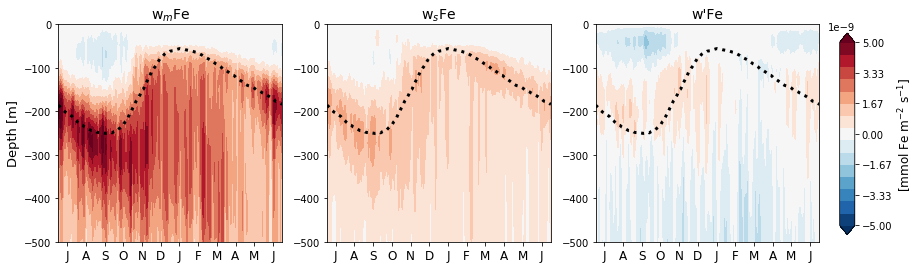

In [128]:
nys, nyn = (11e5,14e5)
dx = 5e3
month = ['J','F','M','A','M','J','J','A','S','O','N','D']
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14,4))
# fig.set_tight_layout(True)
im = ax1.contourf(range(0,360), wmFe_100_days.Zp1, wmFe_100_days.T.roll(days=-180)/dx, 
                 levels=np.linspace(-5e-9,5e-9,16), extend='both', cmap='RdBu_r')
# ax1.contour(range(0,360,15), wpbp_d.Zl, wpbp_d.T.roll(days=-12), colors='k', levels=np.linspace(2e-9,2e-8,8))
ax2.contourf(range(0,360), wsFe_100_days.Zp1, wsFe_100_days.T.roll(days=-180)/dx, 
            levels=np.linspace(-5e-9,5e-9,16), extend='both', cmap='RdBu_r')
# ax2.contour(range(0,360,15), wpbp_d.Zl, wpbp_d.T.roll(days=-12), colors='k', levels=np.linspace(2e-9,2e-8,8))
# ax3.pcolormesh(range(360), dfz_c.Zl, ((dfz_c-adz_c)/diff_M).T.roll(days=-180), 
#                vmax=1, vmin=-1., cmap='RdBu_r', norm=SymLogNorm(0.01), rasterized=True)
ax3.contourf(range(0,360), wpFe_100_days.Zp1, wpFe_100_days.T.roll(days=-180)/dx, 
            levels=np.linspace(-5e-9,5e-9,16), extend='both', cmap='RdBu_r')
ax1.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
ax2.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
ax3.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
ax1.set_ylim([-5e2,0])
ax2.set_ylim([-5e2,0])
ax3.set_ylim([-5e2,0])
ax1.set_xlim([0,359])
ax2.set_xlim([0,359])
ax3.set_xlim([0,359])
ax1.set_title(r"w$_m$Fe", fontsize=14)
ax2.set_title(r"w$_s$Fe", fontsize=14)
ax3.set_title(r"w'Fe", fontsize=14)
ax1.set_xticks(np.linspace(14,344,12))
ax1.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax2.set_xticks(np.linspace(14,344,12))
ax2.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax3.set_xticks(np.linspace(14,344,12))
ax3.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax1.set_ylabel(r"Depth [m]", fontsize=13)
# ax2.set_xlabel(r"Month", fontsize=13)
fig.subplots_adjust(right=0.88)
cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax, ticks=[-5e-9,-3.33e-9,-1.67e-9,0,1.67e-9,3.33e-9,5e-9])
cbar.set_label(r"[mmol Fe m$^{-2}$ s$^{-1}$]", fontsize=12)
plt.savefig(op.join(bdir,'Figures/wFe_below100km_dailyclimatology_05km.pdf'))

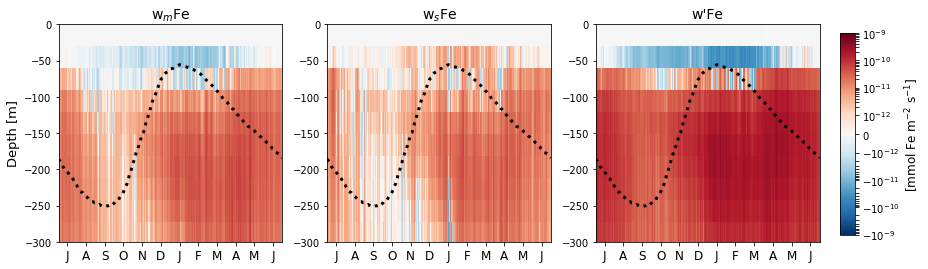

In [31]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14,4))
# fig.set_tight_layout(True)
im = ax1.pcolormesh(range(0,360), wmFe_25_days.Zp1, wmFe_25_days.T.roll(days=-12), 
                  norm=SymLogNorm(linthresh=1e-12, vmax=1e-9, vmin=-1e-9), cmap='RdBu_r')
# ax1.contour(range(0,360,15), wpbp_d.Zl, wpbp_d.T.roll(days=-12), colors='k', levels=np.linspace(2e-9,2e-8,8))
ax2.pcolormesh(range(0,360), wsFe_25_days.Zp1, wsFe_25_days.T.roll(days=-12), 
              norm=SymLogNorm(linthresh=1e-12, vmax=1e-9, vmin=-1e-9), cmap='RdBu_r')
# ax2.contour(range(0,360,15), wpbp_d.Zl, wpbp_d.T.roll(days=-12), colors='k', levels=np.linspace(2e-9,2e-8,8))
# ax3.pcolormesh(range(360), dfz_c.Zl, ((dfz_c-adz_c)/diff_M).T.roll(days=-180), 
#                vmax=1, vmin=-1., cmap='RdBu_r', norm=SymLogNorm(0.01), rasterized=True)
ax3.pcolormesh(range(0,360), wpFe_25_days.Zp1, wpFe_25_days.T.roll(days=-12), 
              norm=SymLogNorm(linthresh=1e-12, vmax=1e-9, vmin=-1e-9), cmap='RdBu_r')
ax1.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
ax2.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
ax3.plot(range(360), -MXLD.sel(YC=slice(nys,nyn)).mean(['YC']).roll(day=-180), 
        ls=':', lw=3, color='k')
ax1.set_ylim([-3e2,0])
ax2.set_ylim([-3e2,0])
ax3.set_ylim([-3e2,0])
ax1.set_xlim([0,359])
ax2.set_xlim([0,359])
ax3.set_xlim([0,359])
ax1.set_title(r"w$_m$Fe", fontsize=14)
ax2.set_title(r"w$_s$Fe", fontsize=14)
ax3.set_title(r"w'Fe", fontsize=14)
ax1.set_xticks(np.linspace(14,344,12))
ax1.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax2.set_xticks(np.linspace(14,344,12))
ax2.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax3.set_xticks(np.linspace(14,344,12))
ax3.set_xticklabels(np.roll(np.array(month),-6), fontsize=12)
ax1.set_ylabel(r"Depth [m]", fontsize=13)
# ax2.set_xlabel(r"Month", fontsize=13)
fig.subplots_adjust(right=0.88)
cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label(r"[mmol Fe m$^{-2}$ s$^{-1}$]", fontsize=12)
plt.savefig(op.join(pdir,'Figures/wFe_below025km_dailyclimatology_05km.pdf'))

In [25]:
5000-36*138

32

In [26]:
79*36+28

2872